In [1]:
pip install seaborn

In [2]:

import numpy as np
import pandas as pd
from datetime import datetime  # Correct import

# data visualization
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('ggplot')  # This should work now
from pylab import rcParams
from sklearn import metrics #model performance metrics
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns
print(sns.__version__)  # Check if it imports and prints a version

0.13.2


In [4]:
data_rose = pd.read_csv('C:/Users/risha/Downloads/Rose.csv')

In [5]:
df = data_rose.copy()

In [6]:
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [8]:
df.shape

(187, 2)

In [9]:
df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [10]:
Time_Stamp= pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='ME')

In [11]:
df['Time_Stamp'] = Time_Stamp
df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [12]:
df.set_index(keys='Time_Stamp', inplace=True)
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [13]:
df.isnull().sum()

Rose    2
dtype: int64

In [14]:
df[df.isnull().values]

Rose
Time_Stamp      
1994-07-31   NaN
1994-08-31   NaN

Text(0, 0.5, 'Wine Units Sold')

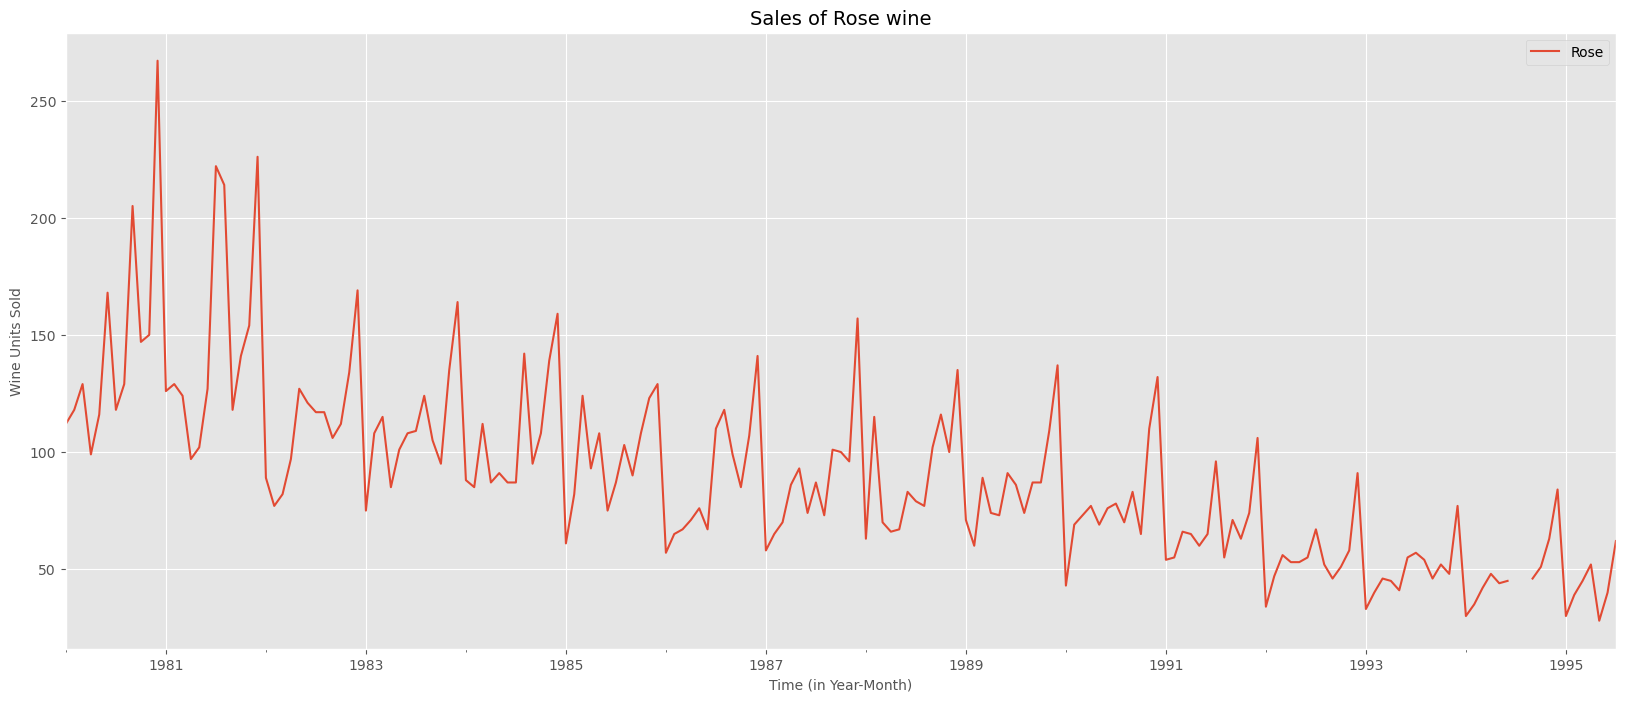

In [22]:
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);
plt.title('Sales of Rose wine', fontsize=14)
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

**Handling missing values**

In [28]:
df.converted = df.Rose
temp = df.converted.resample('D').mean()
df.Rose = round(temp.interpolate(methods='linear'),2)
df.Rose['1994']

Time_Stamp
1994-01-31    30.00
1994-02-28    35.00
1994-03-31    42.00
1994-04-30    48.00
1994-05-31    44.00
1994-06-30    45.00
1994-07-31    45.34
1994-08-31    45.67
1994-09-30    46.00
1994-10-31    51.00
1994-11-30    63.00
1994-12-31    84.00
Name: Rose, dtype: float64

In [29]:
df.isnull().sum()

Rose    0
dtype: int64

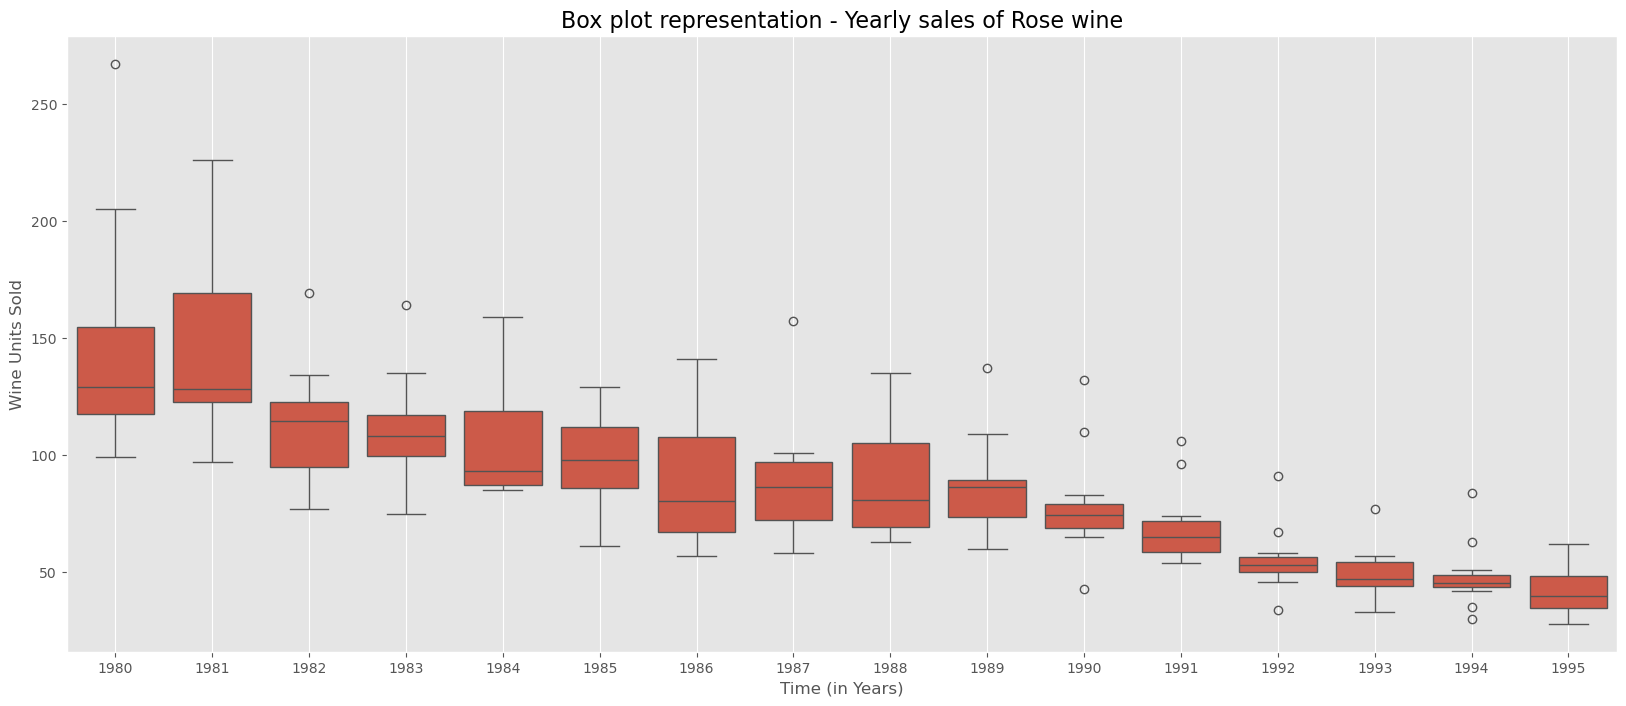

In [30]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.title('Box plot representation - Yearly sales of Rose wine', fontsize=16)
plt.xlabel('Time (in Years)')
plt.ylabel('Wine Units Sold')
plt.grid();

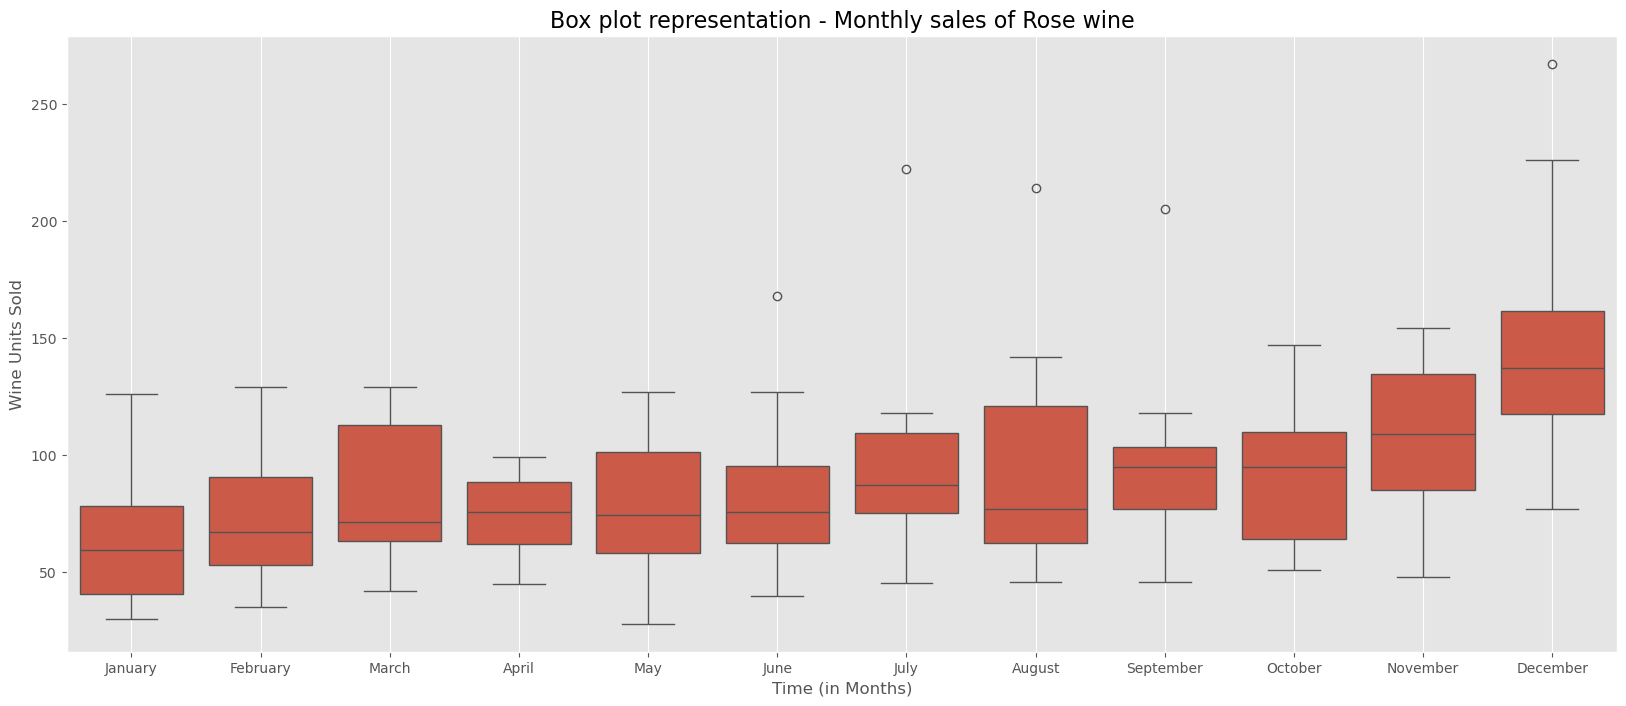

In [31]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.title('Box plot representation - Monthly sales of Rose wine', fontsize=16)
plt.xlabel('Time (in Months)')
plt.ylabel('Wine Units Sold')
plt.grid();

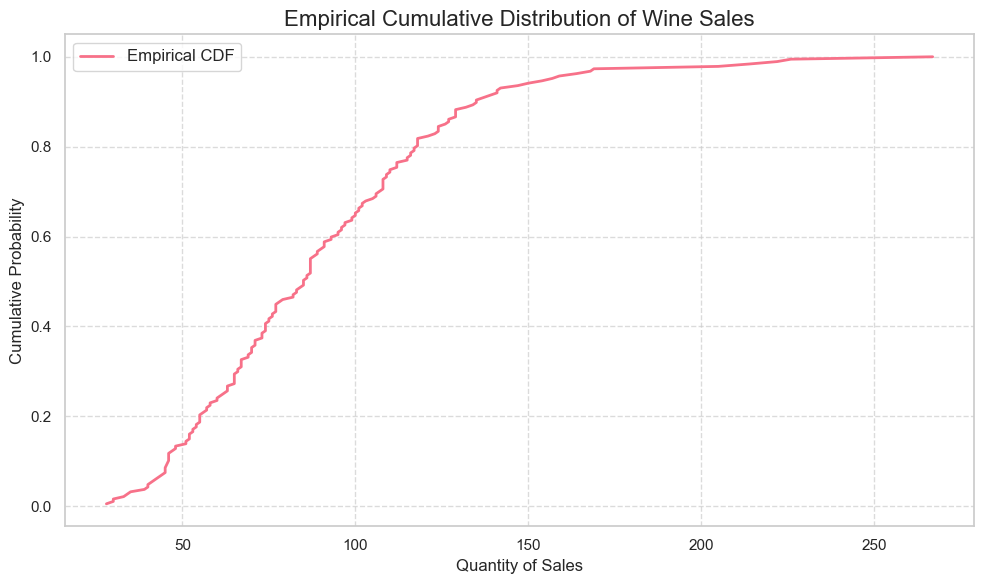

In [33]:


# Set a visually appealing style
sns.set_style("whitegrid")

# Define a color palette
colors = sns.color_palette("husl", 1)  # Use a single color from the 'husl' palette

# Create the figure and subplot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create the ECDF
cdf = ECDF(df['Rose'])

# Plot the ECDF with customizations
plt.plot(cdf.x, cdf.y, label="Empirical CDF", color=colors[0], linewidth=2)  # Use defined color and line width

# Add title and labels with adjusted font sizes
plt.title('Empirical Cumulative Distribution of Wine Sales', fontsize=16)
plt.xlabel('Quantity of Sales', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)

# Add grid lines for better clarity
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=12)

# Improve layout and display the plot
plt.tight_layout()
plt.show()

In [34]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp  April  August  December  February  January    July   June  March  \
Time_Stamp                                                                     
1980         99.0  129.00     267.0     118.0    112.0  118.00  168.0  129.0   
1981         97.0  214.00     226.0     129.0    126.0  222.00  127.0  124.0   
1982         97.0  117.00     169.0      77.0     89.0  117.00  121.0   82.0   
1983         85.0  124.00     164.0     108.0     75.0  109.00  108.0  115.0   
1984         87.0  142.00     159.0      85.0     88.0   87.00   87.0  112.0   
1985         93.0  103.00     129.0      82.0     61.0   87.00   75.0  124.0   
1986         71.0  118.00     141.0      65.0     57.0  110.00   67.0   67.0   
1987         86.0   73.00     157.0      65.0     58.0   87.00   74.0   70.0   
1988         66.0   77.00     135.0     115.0     63.0   79.00   83.0   70.0   
1989         74.0   74.00     137.0      60.0     71.0   86.00   91.0   89.0   
1990         77.0   70.00     132.0      69.0     43.0   78.00   76.0   73.0   
1991         65.0   55.00     106.0      55.0     54.0   96.00   65.0   66.0   
1992         53.0   52.00      91.0      47.0     34.0   67.00   55.0   56.0   
1993         45.0   54.00      77.0      40.0     33.0   57.00   55.0   46.0   
1994         48.0   45.67      84.0      35.0     30.0   45.34   45.0   42.0   
1995         52.0     NaN       NaN      39.0     30.0   62.00   40.0   45.0   

Time_Stamp    May  November  October  September  
Time_Stamp                                       
1980        116.0     150.0    147.0      205.0  
1981        102.0     154.0    141.0      118.0  
1982        127.0     134.0    112.0      106.0  
1983        101.0     135.0     95.0      105.0  
1984         91.0     139.0    108.0       95.0  
1985        108.0     123.0    108.0       90.0  
1986         76.0     107.0     85.0       99.0  
1987         93.0      96.0    100.0      101.0  
1988         67.0     100.0    116.0      102.0  
1989         73.0     109.0     87.0       87.0  
1990         69.0     110.0     65.0       83.0  
1991         60.0      74.0     63.0       71.0  
1992         53.0      58.0     51.0       46.0  
1993         41.0      48.0     52.0       46.0  
1994         44.0      63.0     51.0       46.0  
1995         28.0       NaN      NaN        NaN

Text(0, 0.5, 'Wine Units Sold')

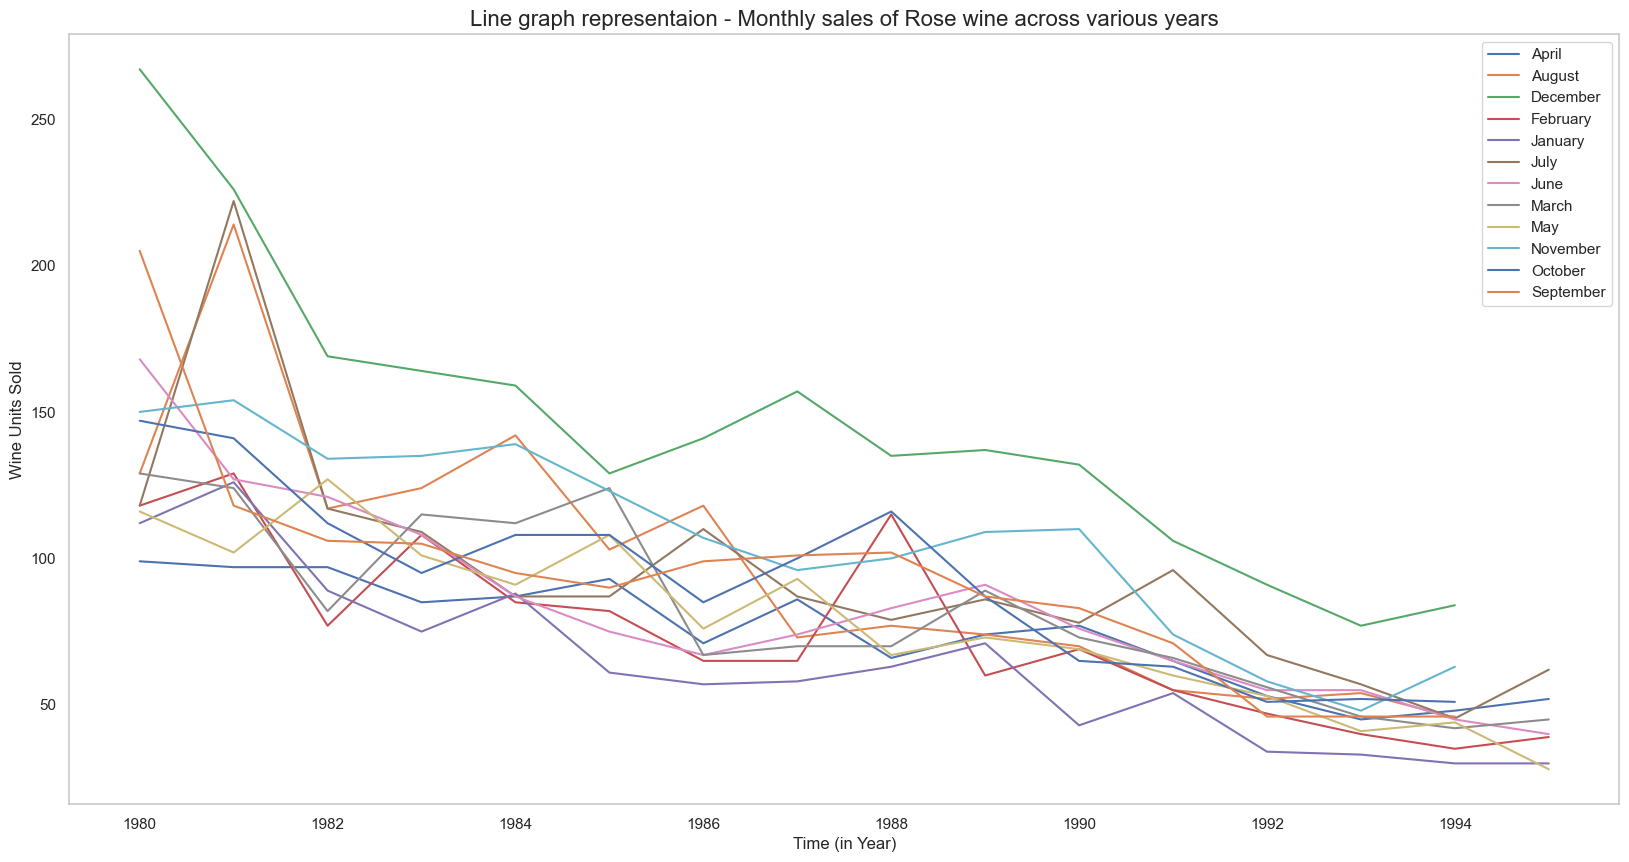

In [37]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid();
plt.title('Line graph representaion - Monthly sales of Rose wine across various years', fontsize=16)
plt.legend(loc='best');
plt.xlabel('Time (in Year)')
plt.ylabel('Wine Units Sold')

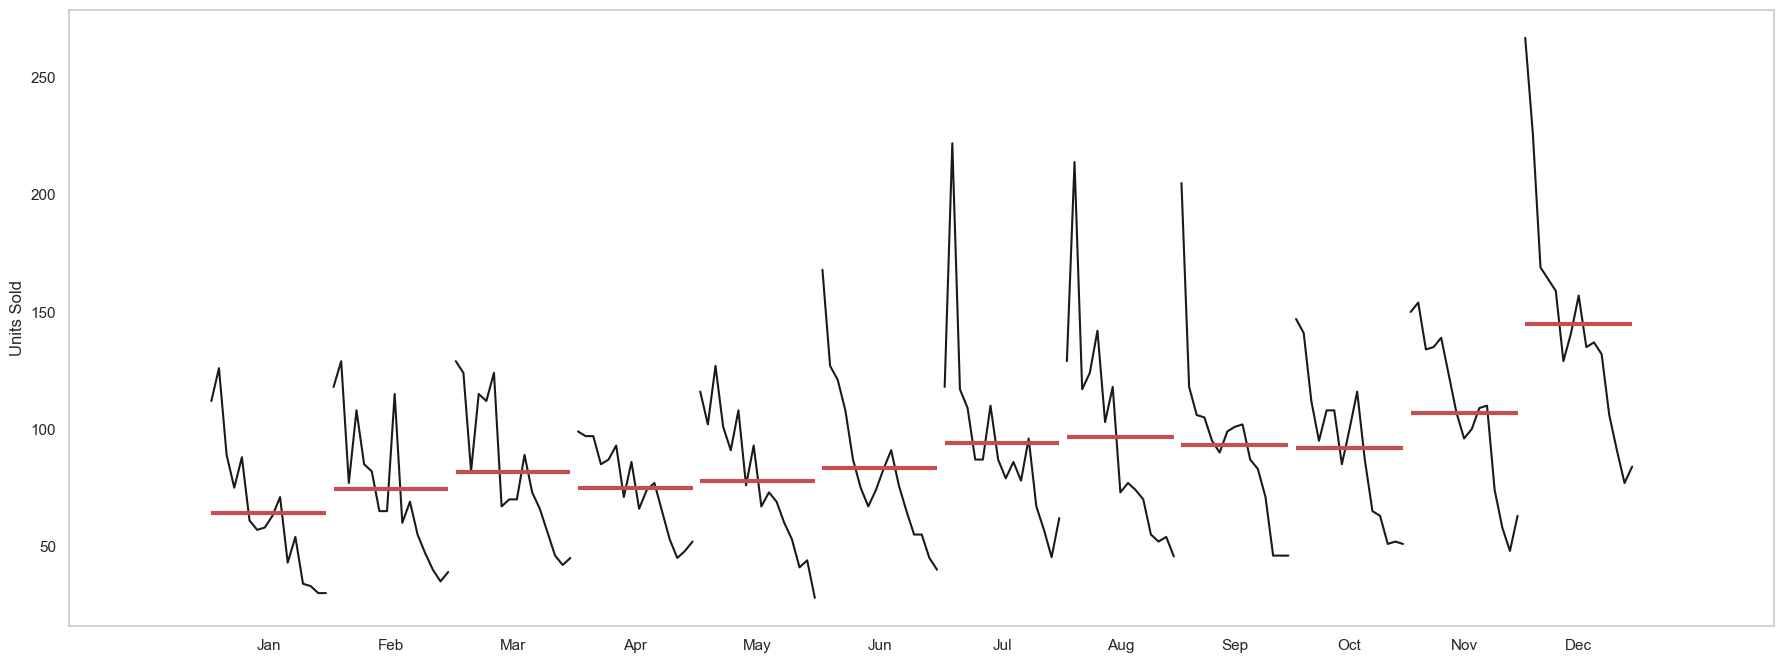

In [38]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Units Sold',ax=ax)
plt.grid();

In [44]:
df.groupby(by=df.index)["Rose"].mean()

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
              ...  
1995-03-31     45.0
1995-04-30     52.0
1995-05-31     28.0
1995-06-30     40.0
1995-07-31     62.0
Name: Rose, Length: 187, dtype: float64

In [45]:
df.groupby(by=df.index)["Rose"].sum().pct_change()

Time_Stamp
1980-01-31         NaN
1980-02-29    0.053571
1980-03-31    0.093220
1980-04-30   -0.232558
1980-05-31    0.171717
                ...   
1995-03-31    0.153846
1995-04-30    0.155556
1995-05-31   -0.461538
1995-06-30    0.428571
1995-07-31    0.550000
Name: Rose, Length: 187, dtype: float64

Text(0, 0.5, '% Change')

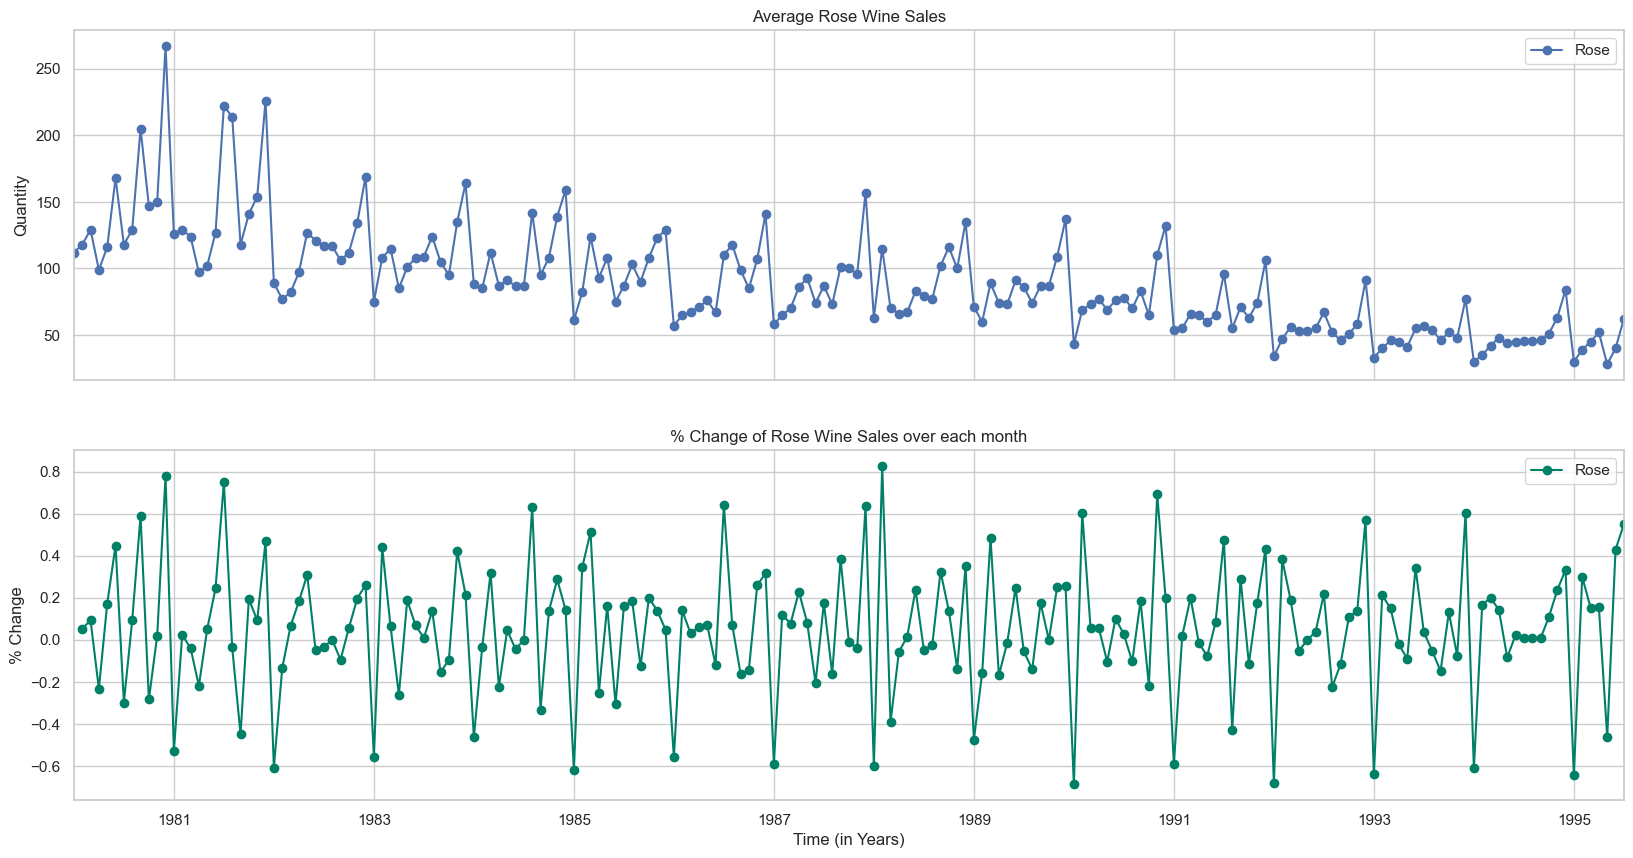

In [46]:
# group by date and get average RetailSales, and percent change
average    = df.groupby(by=df.index)["Rose"].mean()
pct_change = df.groupby(by=df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
ax1.set_ylabel('Quantity')
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="% Change of Rose Wine Sales over each month",grid=True)
plt.xlabel('Time (in Years)')
ax2.set_ylabel('% Change')

<Figure size 2000x800 with 0 Axes>

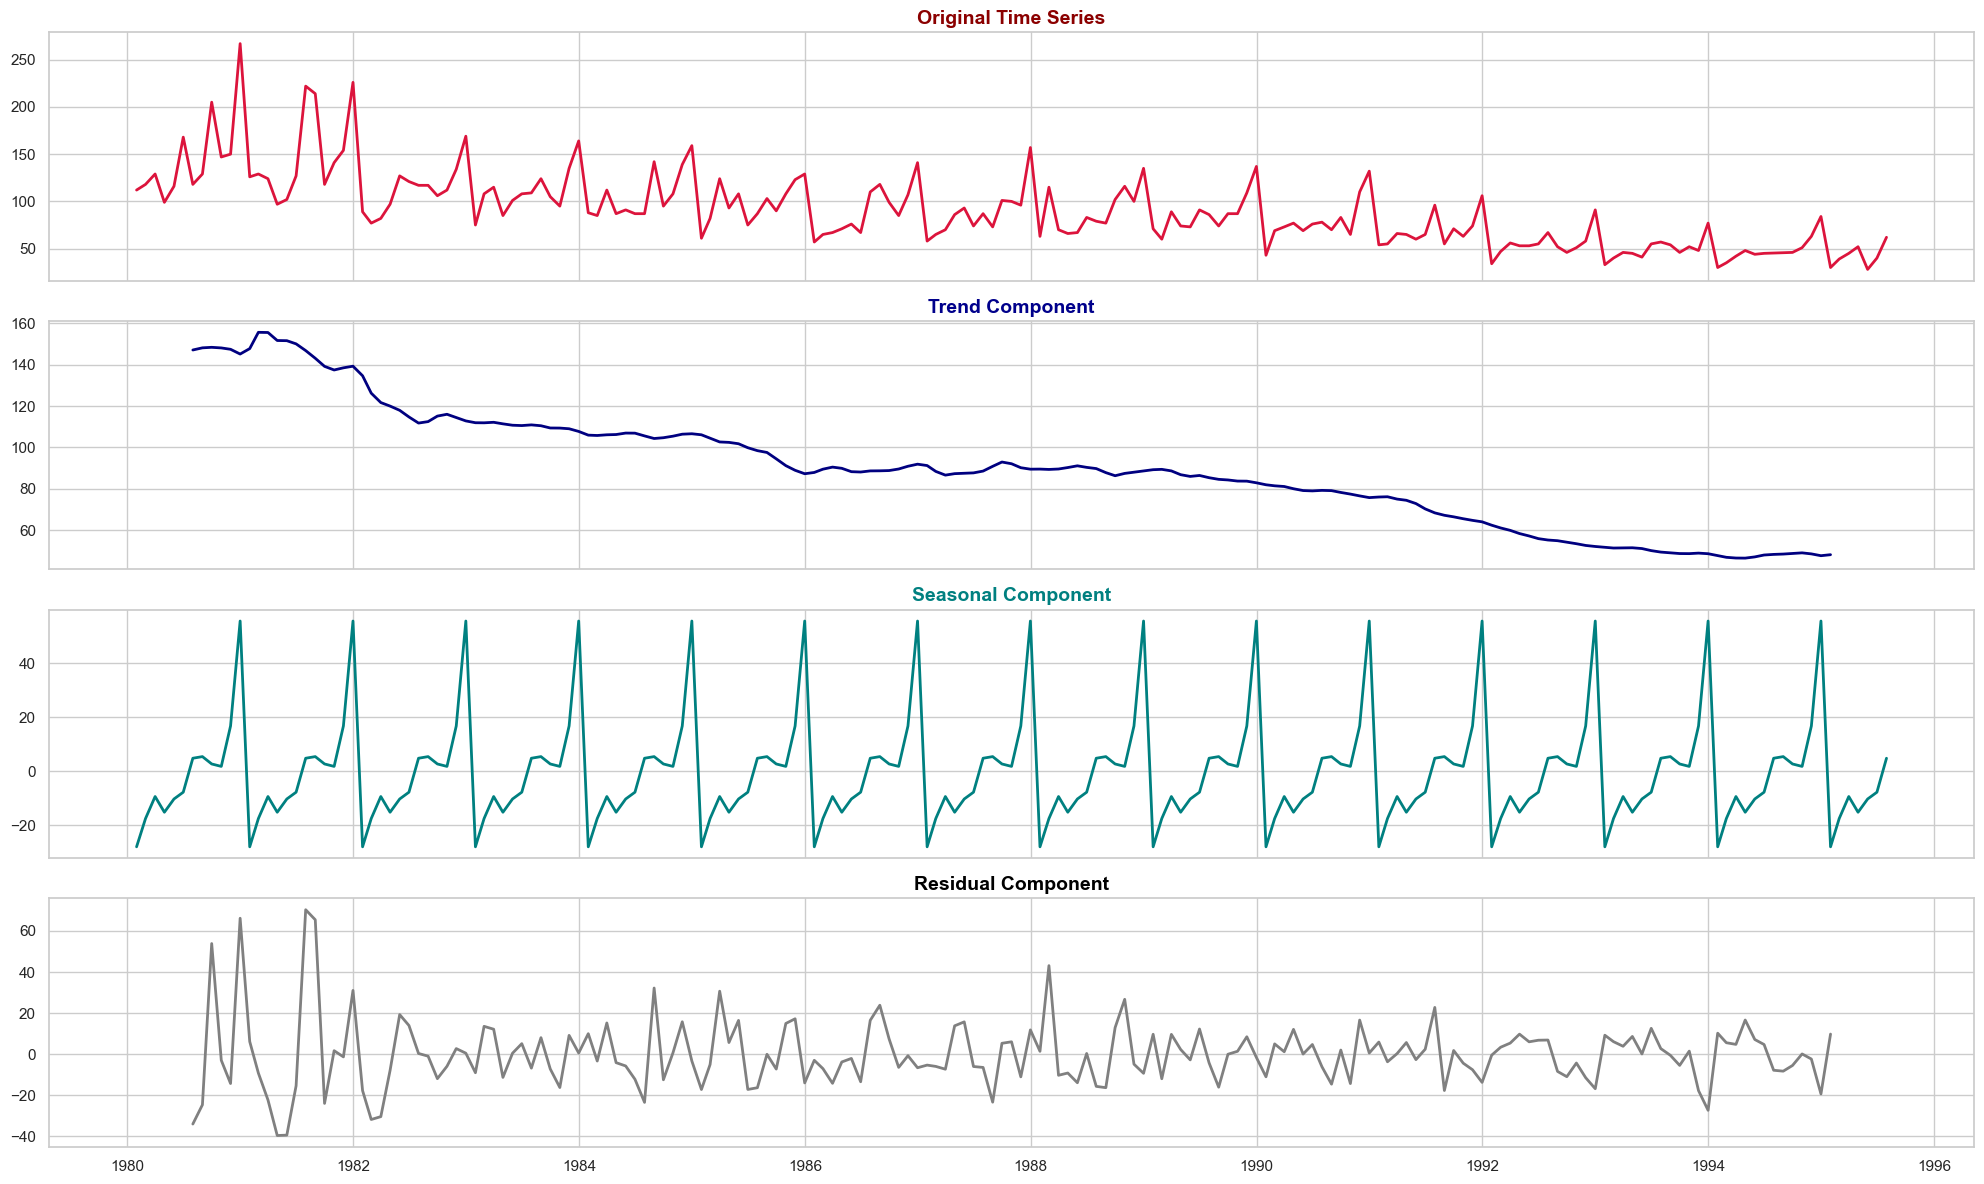

In [48]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Set figure size and style
plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")  # Clean background

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Rose'], model='additive')

# Plot decomposition with enhanced colors
fig, axes = plt.subplots(4, 1, figsize=(20, 12), sharex=True)

# Original Time Series
axes[0].plot(df['Rose'], color='crimson', linewidth=2)
axes[0].set_title('Original Time Series', fontsize=14, fontweight='bold', color='darkred')

# Trend Component
axes[1].plot(decomposition.trend, color='navy', linewidth=2)
axes[1].set_title('Trend Component', fontsize=14, fontweight='bold', color='darkblue')

# Seasonal Component
axes[2].plot(decomposition.seasonal, color='teal', linewidth=2)
axes[2].set_title('Seasonal Component', fontsize=14, fontweight='bold', color='teal')

# Residual Component
axes[3].plot(decomposition.resid, color='gray', linewidth=2)
axes[3].set_title('Residual Component', fontsize=14, fontweight='bold', color='black')

# Improve layout and show plot
plt.tight_layout()
plt.show()


In [49]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908702
1980-02-29   -17.435680
1980-03-31    -9.285889
1980-04-30   -15.098389
1980-05-31   -10.196603
1980-06-30    -7.678746
1980-07-31     4.897298
1980-08-31     5.499853
1980-09-30     2.774631
1980-10-31     1.871853
1980-11-30    16.846853
1980-12-31    55.713520
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980631
1980-08-31   -24.624853
1980-09-30    53.850369
1980-10-31    -2.955187
1980-11-30   -14.263520
1980-12-31    66.16

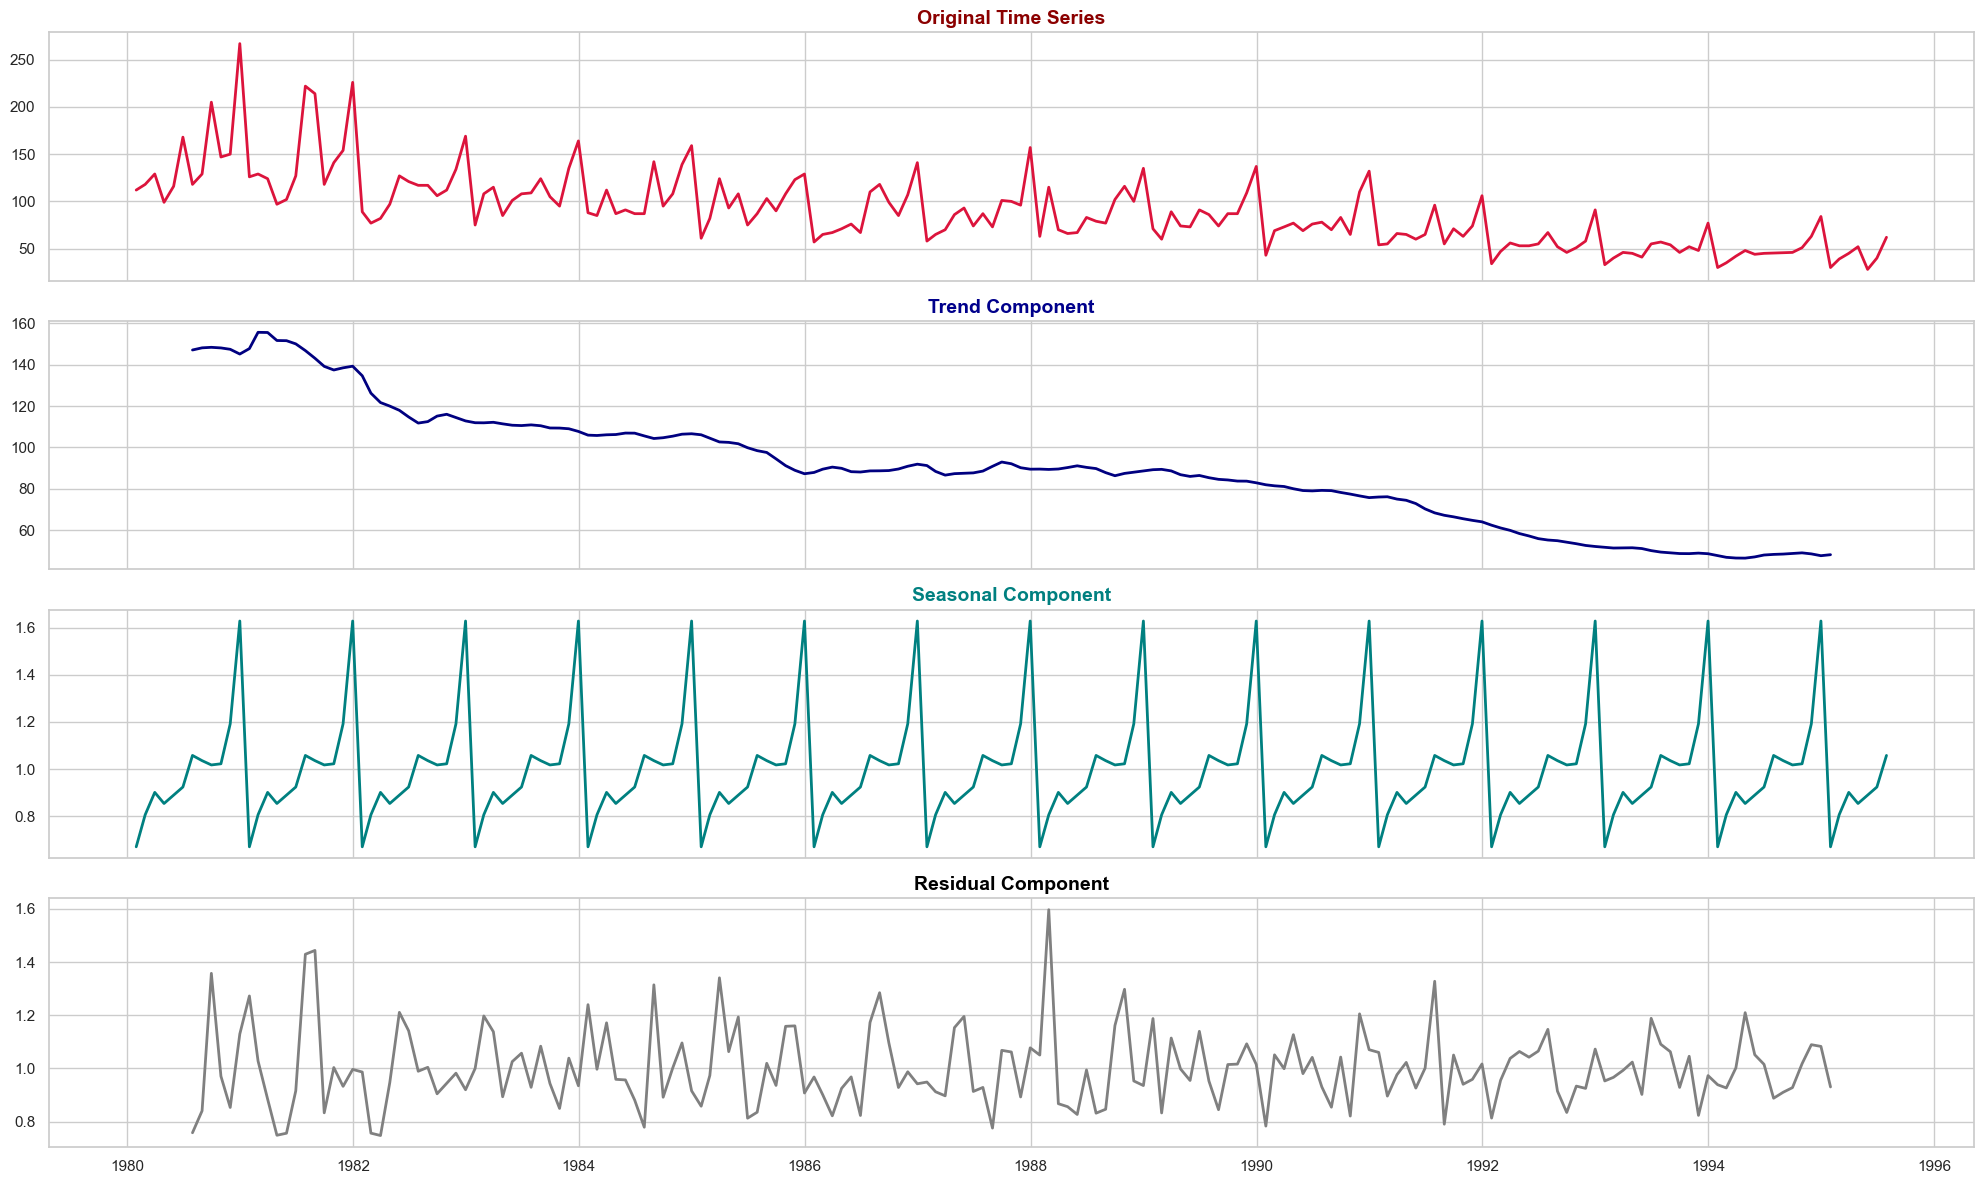

In [50]:

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Rose'], model='multiplicative')

# Set figure size and style
sns.set_style("whitegrid")  
fig, axes = plt.subplots(4, 1, figsize=(20, 12), sharex=True)

# Plot Original Time Series
axes[0].plot(df['Rose'], color='crimson', linewidth=2)
axes[0].set_title('Original Time Series', fontsize=14, fontweight='bold', color='darkred')

# Plot Trend Component
axes[1].plot(decomposition.trend, color='navy', linewidth=2)
axes[1].set_title('Trend Component', fontsize=14, fontweight='bold', color='darkblue')

# Plot Seasonal Component
axes[2].plot(decomposition.seasonal, color='teal', linewidth=2)
axes[2].set_title('Seasonal Component', fontsize=14, fontweight='bold', color='teal')

# Plot Residual Component
axes[3].plot(decomposition.resid, color='gray', linewidth=2)
axes[3].set_title('Residual Component', fontsize=14, fontweight='bold', color='black')

# Improve layout and show plot
plt.tight_layout()
plt.show()


In [51]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058046
1980-08-31    1.035885
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758253
1980-08-31    0.840717
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: resid, dtype:

In [52]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [53]:
from IPython.display import display

In [54]:
print('First few rows of Training Data')
display(train.head(10))
print('Last few rows of Training Data')
display(train.tail(10))

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
1980-06-30  168.0
1980-07-31  118.0
1980-08-31  129.0
1980-09-30  205.0
1980-10-31  147.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-03-31   73.0
1990-04-30   77.0
1990-05-31   69.0
1990-06-30   76.0
1990-07-31   78.0
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [55]:
print('First few rows of Test Data')
display(test.head(10))
print('Last few rows of Test Data')
display(test.tail(10))

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0
1991-06-30  65.0
1991-07-31  96.0
1991-08-31  55.0
1991-09-30  71.0
1991-10-31  63.0

Last few rows of Test Data


Rose
Time_Stamp      
1994-10-31  51.0
1994-11-30  63.0
1994-12-31  84.0
1995-01-31  30.0
1995-02-28  39.0
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [56]:
print('-------------------------------------')
print('Number of observations in Train data   :  ',train.shape)
print('Number of observations in Test data    :  ',test.shape)
print('Total Observations                     :  ',test.shape[0]+train.shape[0])
print('-------------------------------------')

-------------------------------------
Number of observations in Train data   :   (132, 1)
Number of observations in Test data    :   (55, 1)
Total Observations                     :   187
-------------------------------------


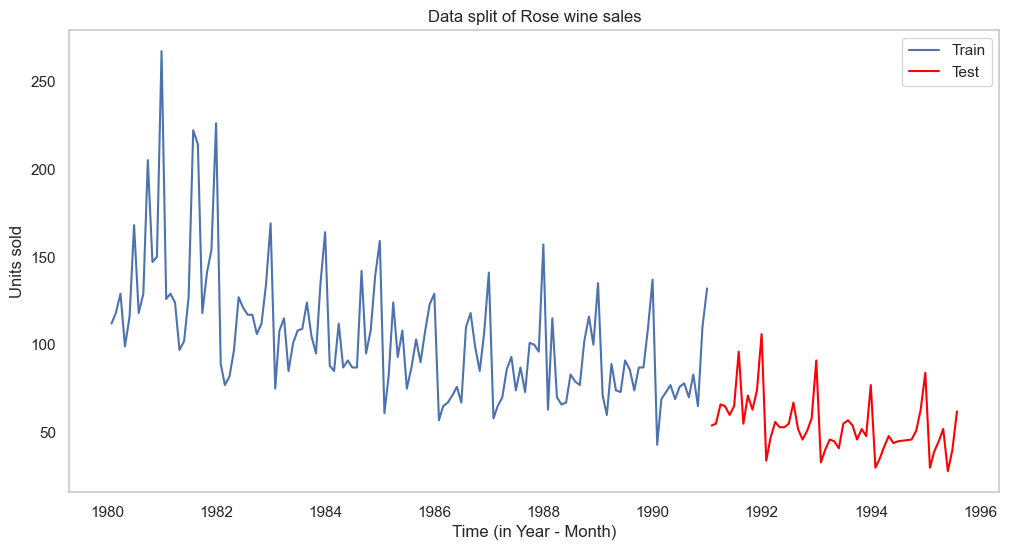

In [57]:
plt.figure(figsize = (12, 6))
plt.plot(train['Rose'], label = 'Train')
plt.plot(test['Rose'], label = 'Test', color='Red')
plt.legend(loc='best')
plt.xlabel('Time (in Year - Month)')
plt.ylabel('Units sold')
plt.title('Data split of Rose wine sales', fontsize = 12)
plt.show;
plt.grid();

In [58]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [59]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [60]:
LinearRegression_train['Time'] = train_time
LinearRegression_test['Time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  Time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  Time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  Time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  Time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['Time']],LinearRegression_train['Rose'].values)

LinearRegression()

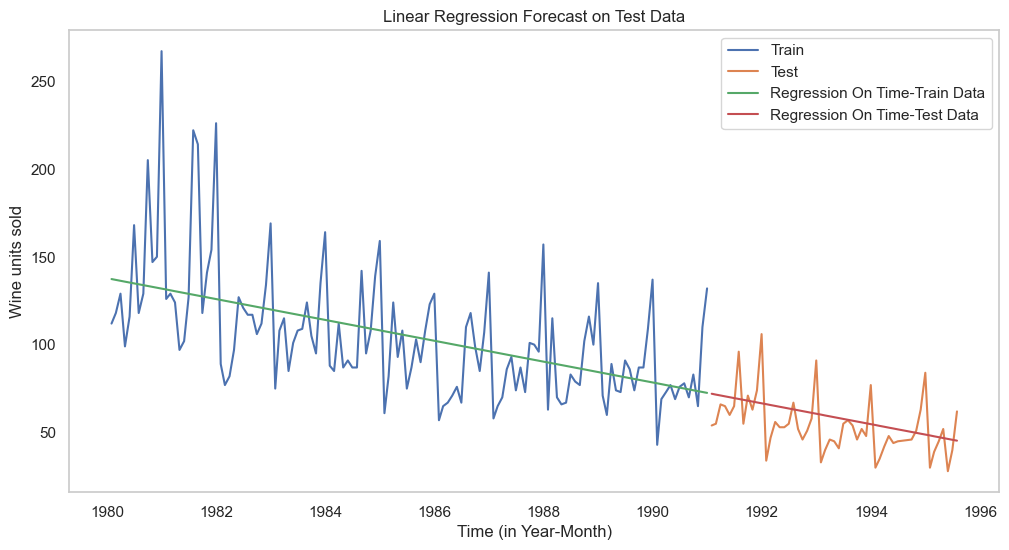

In [62]:
test_predictions_model1 = lr.predict(LinearRegression_test[['Time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

train_predictions_model1 = lr.predict(LinearRegression_train[['Time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

plt.figure(figsize=(12,6))
plt.title('Linear Regression Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time-Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time-Test Data')
plt.legend(loc='best')
plt.grid();

In [63]:
# Test Data - RMSE

rmse_LR_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_LR_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [64]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_LR_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  15.268887

In [65]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [66]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

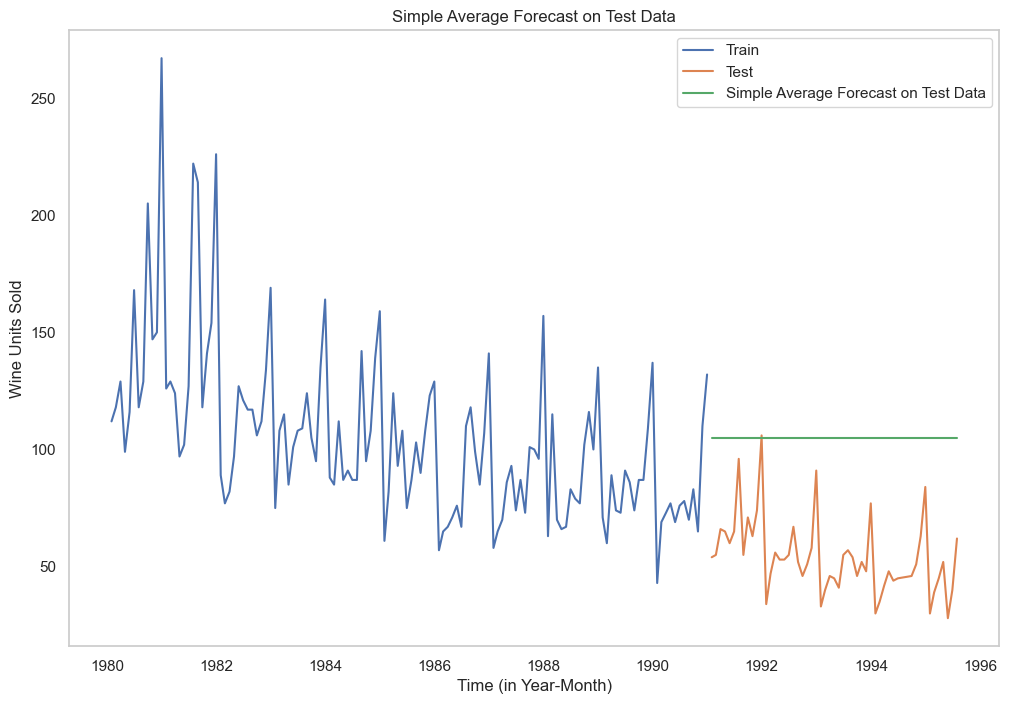

In [67]:
plt.figure(figsize=(12,8))
plt.title('Simple Average Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

In [68]:
## Test Data - RMSE 

rmse_simple_average_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_simple_average_test))

For Simple Average forecast on the Test Data,  RMSE is 53.460


In [69]:
resultsDf3 = pd.DataFrame({'Test RMSE': [rmse_simple_average_test]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf3])
resultsDf

Test RMSE
Linear Regression  15.268887
Simple Average     53.460367

In [70]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [72]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(9)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0      114.50         NaN         NaN
1980-05-31  116.0       107.5      115.50         NaN         NaN
1980-06-30  168.0       142.0      128.00  123.666667         NaN
1980-07-31  118.0       143.0      125.25  124.666667         NaN
1980-08-31  129.0       123.5      132.75  126.500000         NaN
1980-09-30  205.0       167.0      155.00  139.166667  132.666667

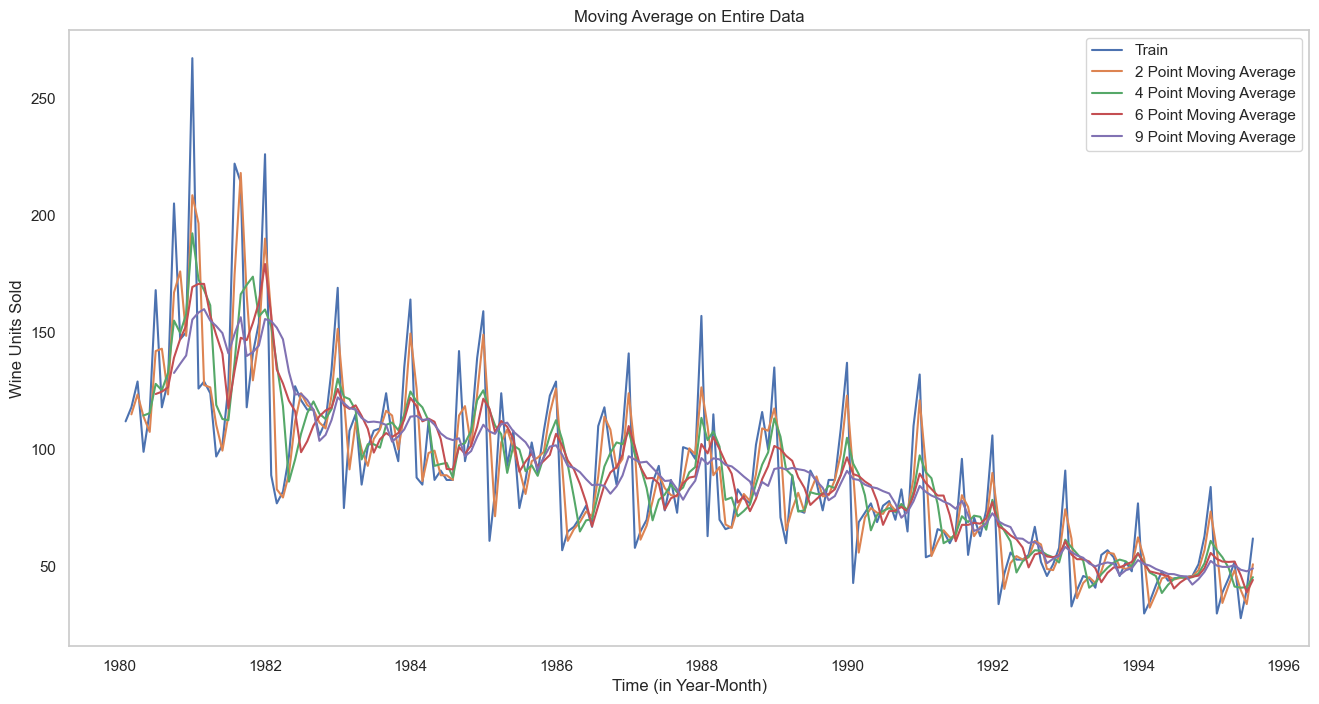

In [73]:
#Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title('Moving Average on Entire Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

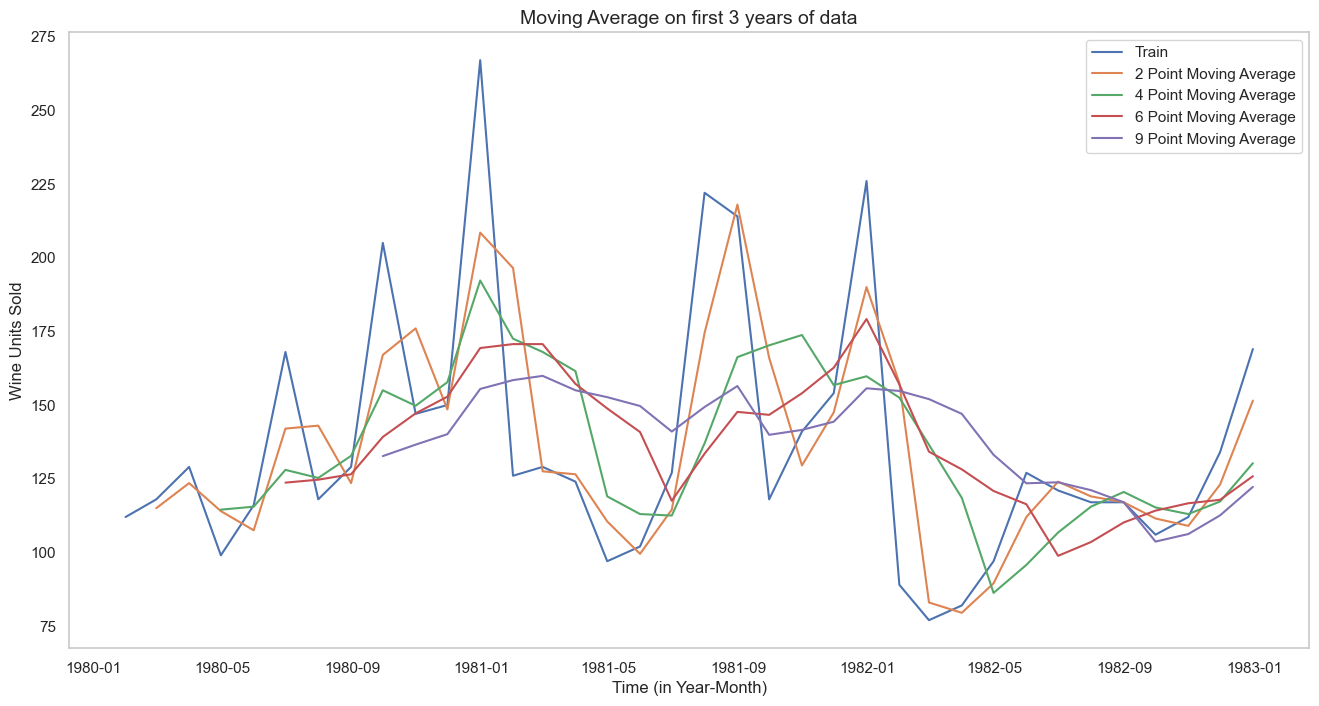

In [74]:
#Plotting on the first 3 years of data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'].iloc[:-151], label='Train')
plt.plot(MovingAverage['Trailing_2'].iloc[:-151], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'].iloc[:-151], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'].iloc[:-151],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'].iloc[:-151],label = '9 Point Moving Average')
plt.title('Moving Average on first 3 years of data',fontsize=14)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

In [75]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Trailing Moving Average Forecast on Rose Wine Sales')

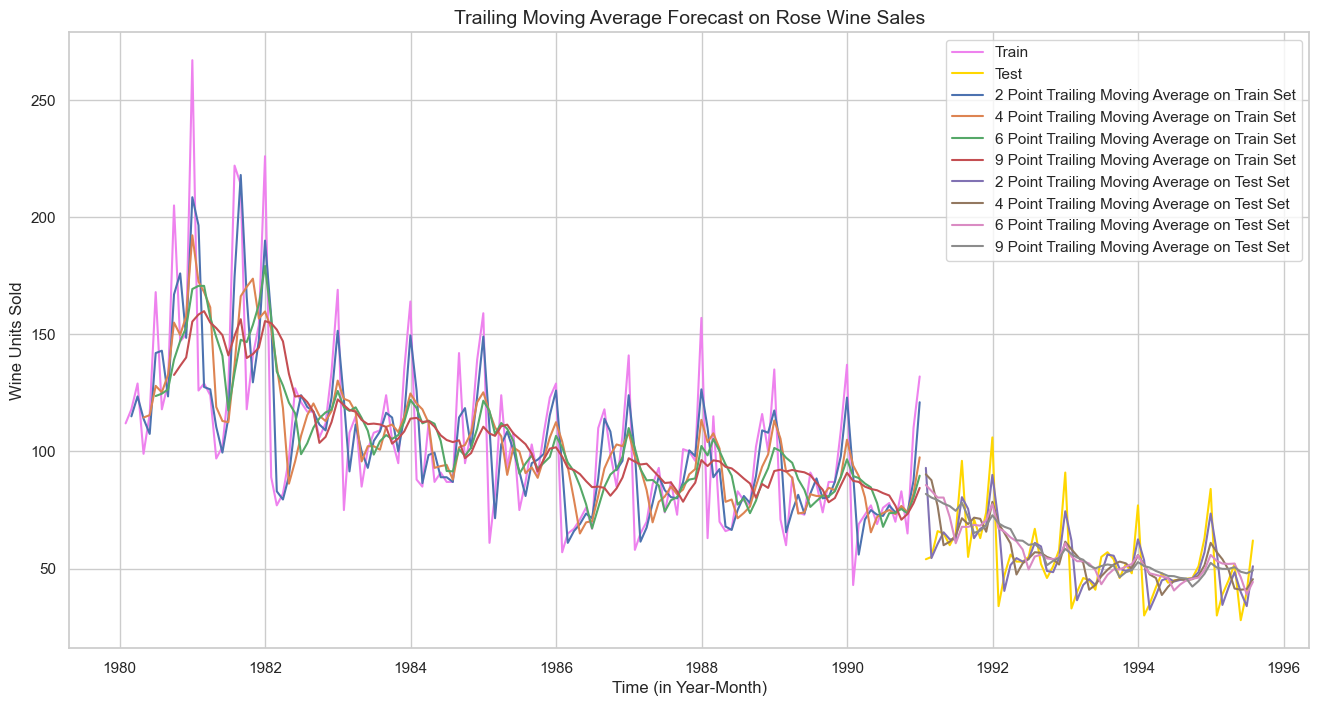

In [77]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

plt.title("Trailing Moving Average Forecast on Rose Wine Sales", fontsize=14)

Text(0.5, 1.0, 'Trailing Moving Average Forecast on Rose Wine Sales')

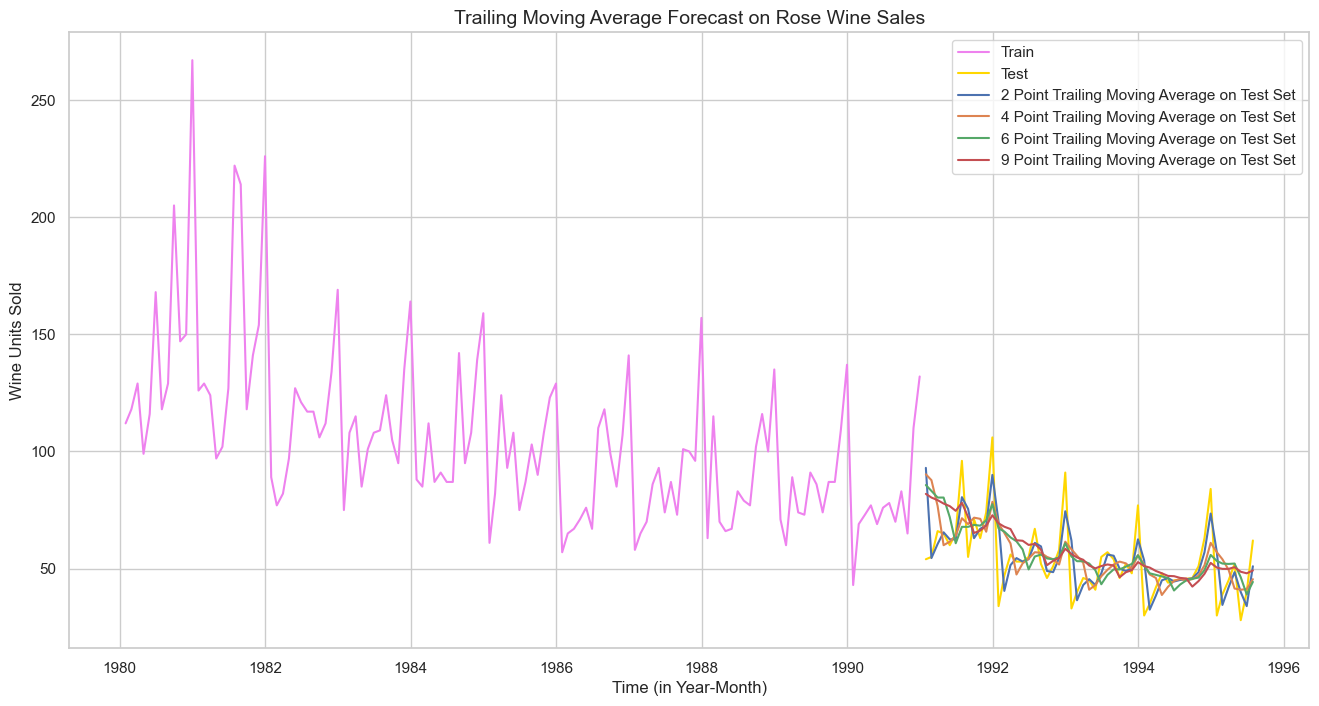

In [78]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

plt.title("Trailing Moving Average Forecast on Rose Wine Sales", fontsize=14)

Text(0.5, 1.0, 'Trailing Moving Average Forecast on Rose Wine Sales')

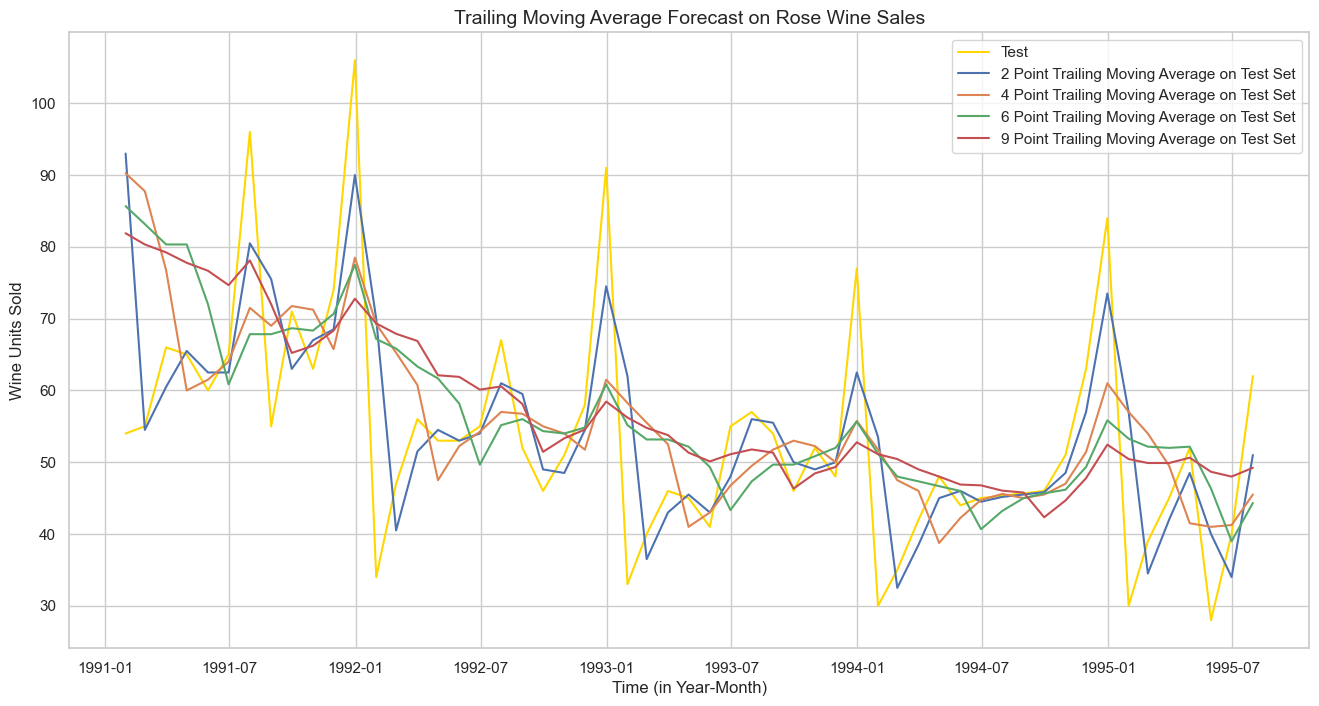

In [79]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

plt.title("Trailing Moving Average Forecast on Rose Wine Sales", fontsize=14)

In [80]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_MA_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_MA_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_MA_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_MA_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [81]:
resultsDf4 = pd.DataFrame({'Test RMSE': [rmse_MA_test_2,rmse_MA_test_4
                                          ,rmse_MA_test_6,rmse_MA_test_9]
                            }
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

resultsDf = pd.concat([resultsDf, resultsDf4])
resultsDf

Test RMSE
Linear Regression  15.268887
Simple Average     53.460367
2 point TMA        11.529278
4 point TMA        14.451376
6 point TMA        14.566262
9 point TMA        14.727596

In [82]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [83]:
SES_train = train.copy()
SES_test = test.copy()

In [84]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [85]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [86]:
model_SES_autofit.params

{'smoothing_level': 0.12362012817157356,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.983765
1991-02-28  55.0  87.983765
1991-03-31  66.0  87.983765
1991-04-30  65.0  87.983765
1991-05-31  60.0  87.983765

Text(0, 0.5, 'Wine Units Sold')

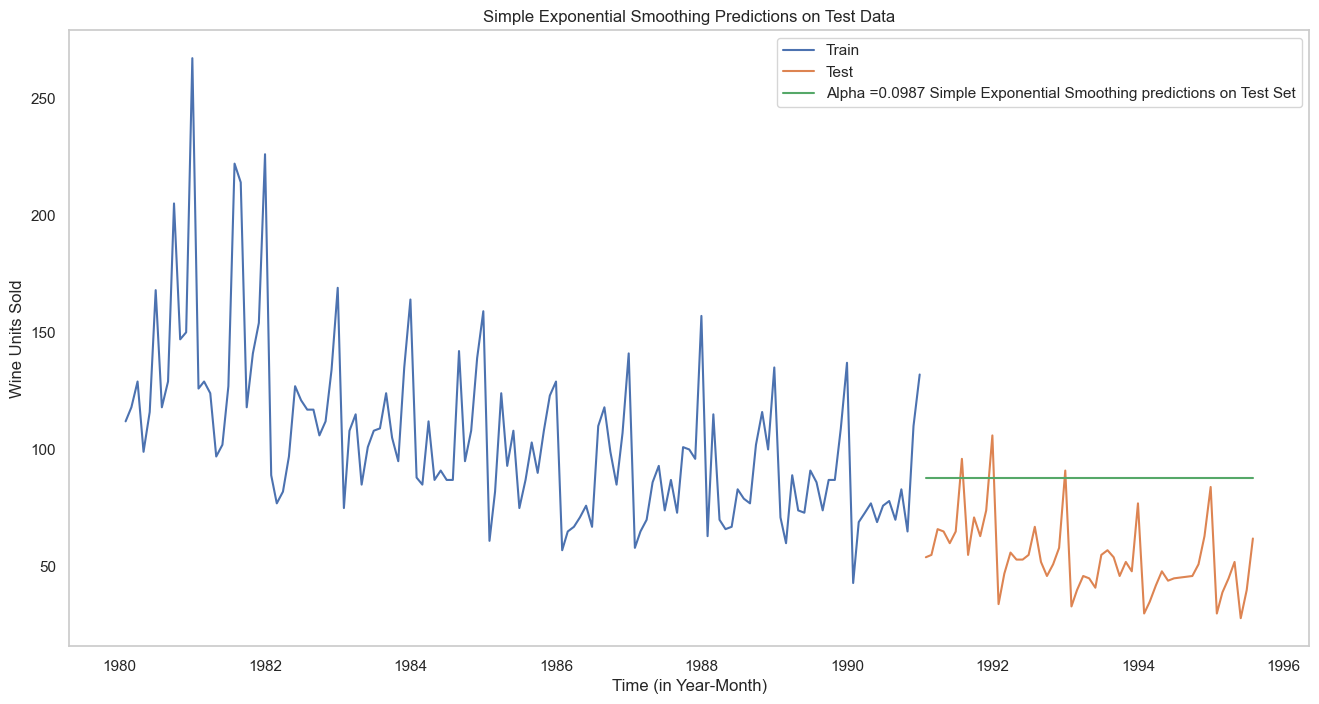

In [88]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [90]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 37.592


In [91]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                        15.268887
Simple Average                           53.460367
2 point TMA                              11.529278
4 point TMA                              14.451376
6 point TMA                              14.566262
9 point TMA                              14.727596
Alpha=0.0987,SimpleExponentialSmoothing  37.592006

In [92]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [94]:
resultsDf_6 = pd.DataFrame(columns=['Alpha Values', 'Train RMSE', 'Test RMSE'])

for i in np.arange(0.1, 1, 0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i, optimized=False, use_brute=True)
    
    SES_train[f'predict_{i}'] = model_SES_alpha_i.fittedvalues
    SES_test[f'predict_{i}'] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'], SES_train[f'predict_{i}'], squared=False)
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'], SES_test[f'predict_{i}'], squared=False)
    
    new_row = pd.DataFrame({'Alpha Values': [i], 'Train RMSE': [rmse_model5_train_i], 'Test RMSE': [rmse_model5_test_i]})
    resultsDf_6 = pd.concat([resultsDf_6, new_row], ignore_index=True)


In [95]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.10   31.815610  36.827827
1           0.15   31.809845  38.721920
2           0.20   31.979391  41.361671
3           0.25   32.211871  44.360591
4           0.30   32.470164  47.504617
5           0.35   32.744341  50.665469
6           0.40   33.035130  53.767204
7           0.45   33.346578  56.766932
8           0.50   33.682839  59.641585
9           0.55   34.047042  62.378789
10          0.60   34.441171  64.971088
11          0.65   34.866356  67.412703
12          0.70   35.323261  69.697963
13          0.75   35.812435  71.820654
14          0.80   36.334596  73.773794
15          0.85   36.890835  75.549538
16          0.90   37.482782  77.139078
17          0.95   38.112735  78.532498

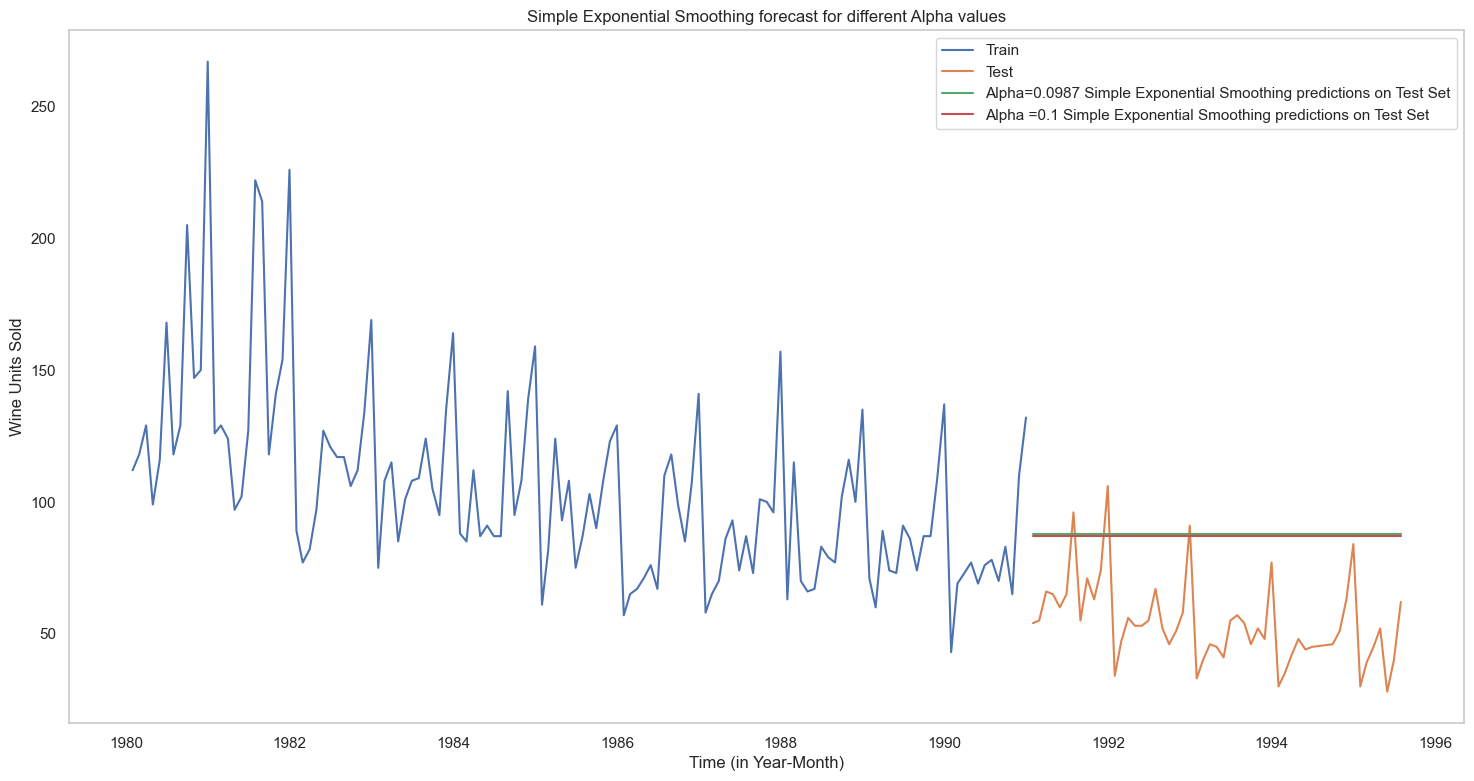

In [96]:
## Plotting on both the Training and Test data
model_SES_alpha_i = model_SES.fit(smoothing_level=0.1,optimized=False,use_brute=True)
SES_train['predict',0.1] = model_SES_alpha_i.fittedvalues
SES_test['predict',0.1] = model_SES_alpha_i.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Simple Exponential Smoothing forecast for different Alpha values')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

In [97]:
DES_train = train.copy()
DES_test = test.copy()

In [98]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

In [99]:
model_DES.params

{'smoothing_level': 1.4901247095597348e-08,
 'smoothing_trend': 7.3896641488640725e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81551313502814,
 'initial_trend': -0.4943777717865305,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [100]:
# Forecasting using this model for the test set
DES_test['predict'] =  model_DES.forecast(len(test))
DES_test['predict']

Time_Stamp
1991-01-31    72.063269
1991-02-28    71.568892
1991-03-31    71.074514
1991-04-30    70.580136
1991-05-31    70.085758
1991-06-30    69.591381
1991-07-31    69.097003
1991-08-31    68.602625
1991-09-30    68.108247
1991-10-31    67.613870
1991-11-30    67.119492
1991-12-31    66.625114
1992-01-31    66.130736
1992-02-29    65.636358
1992-03-31    65.141981
1992-04-30    64.647603
1992-05-31    64.153225
1992-06-30    63.658847
1992-07-31    63.164470
1992-08-31    62.670092
1992-09-30    62.175714
1992-10-31    61.681336
1992-11-30    61.186959
1992-12-31    60.692581
1993-01-31    60.198203
1993-02-28    59.703825
1993-03-31    59.209447
1993-04-30    58.715070
1993-05-31    58.220692
1993-06-30    57.726314
1993-07-31    57.231936
1993-08-31    56.737559
1993-09-30    56.243181
1993-10-31    55.748803
1993-11-30    55.254425
1993-12-31    54.760047
1994-01-31    54.265670
1994-02-28    53.771292
1994-03-31    53.276914
1994-04-30    52.782536
1994-05-31    52.288159
1994-

Text(0, 0.5, 'Wine Units Sold')

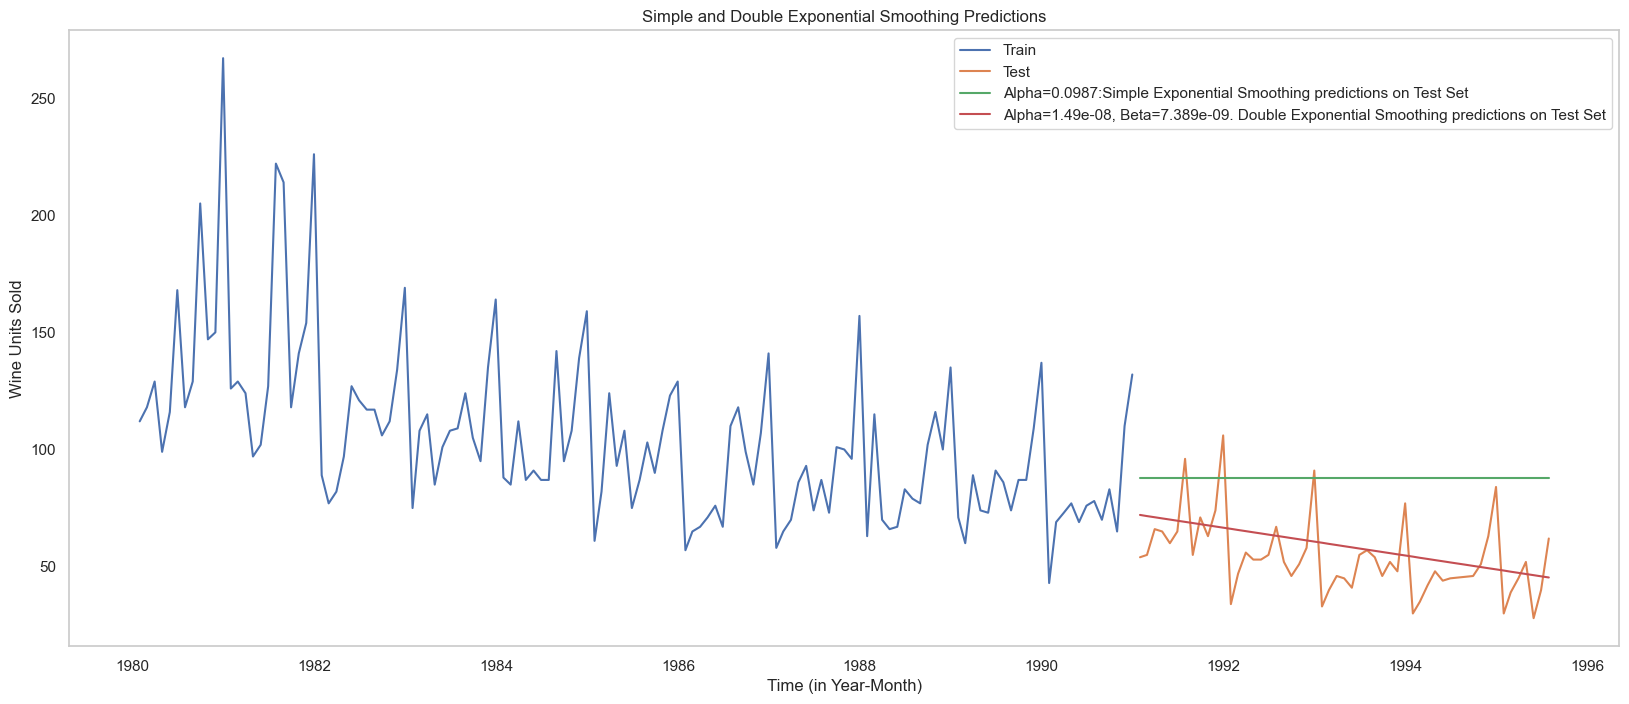

In [101]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train, label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.0987:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict'], label='Alpha=1.49e-08, Beta=7.389e-09. Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [102]:
rmse_DES_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For DES forecast on the Rose Testing Data:  RMSE is %3.3f" %(rmse_DES_test))

For DES forecast on the Rose Testing Data:  RMSE is 15.269


In [103]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_DES_test]},index=['Alpha=1.49e-08, Beta=7.389e-09, Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   15.268887
Simple Average                                      53.460367
2 point TMA                                         11.529278
4 point TMA                                         14.451376
6 point TMA                                         14.566262
9 point TMA                                         14.727596
Alpha=0.0987,SimpleExponentialSmoothing             37.592006
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889

In [104]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha, Beta, Train RMSE, Test RMSE]
Index: []

In [107]:
from statsmodels.tsa.holtwinters import Holt
import numpy as np
import pandas as pd
from sklearn import metrics

# Initialize results DataFrame
resultsDf_6 = pd.DataFrame(columns=['Alpha', 'Beta', 'Train RMSE', 'Test RMSE'])

model_DES = Holt(DES_train['Rose'])

for i in np.arange(0.05, 1.05, 0.05):
    for j in np.arange(0.05, 1.05, 0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend=j, optimized=False, use_brute=True)

        DES_train[f'predict_{i}_{j}'] = model_DES_alpha_i_j.fittedvalues
        DES_test[f'predict_{i}_{j}'] = model_DES_alpha_i_j.forecast(len(test))

        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'], DES_train[f'predict_{i}_{j}'], squared=False)
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'], DES_test[f'predict_{i}_{j}'], squared=False)

        new_row = pd.DataFrame({'Alpha': [i], 'Beta': [j], 'Train RMSE': [rmse_model6_train], 'Test RMSE': [rmse_model6_test]})
        resultsDf_6 = pd.concat([resultsDf_6, new_row], ignore_index=True)


In [108]:
resultsDf_6

Alpha  Beta  Train RMSE   Test RMSE
0     0.05  0.05   49.734056   31.526698
1     0.05  0.10   42.089518   34.791118
2     0.05  0.15   39.106563   23.716787
3     0.05  0.20   37.692373   37.795273
4     0.05  0.25   37.009649   33.598305
..     ...   ...         ...         ...
395   1.00  0.80   57.365879  853.965294
396   1.00  0.85   58.887365  848.483242
397   1.00  0.90   60.474309  834.710693
398   1.00  0.95   62.133606  812.112707
399   1.00  1.00   63.873454  780.079337

[400 rows x 4 columns]

In [109]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Test RMSE
6   0.05  0.35   36.233997  16.328994
5   0.05  0.30   36.616877  18.624520
2   0.05  0.15   39.106563  23.716787
0   0.05  0.05   49.734056  31.526698
7   0.05  0.40   35.783737  31.577953

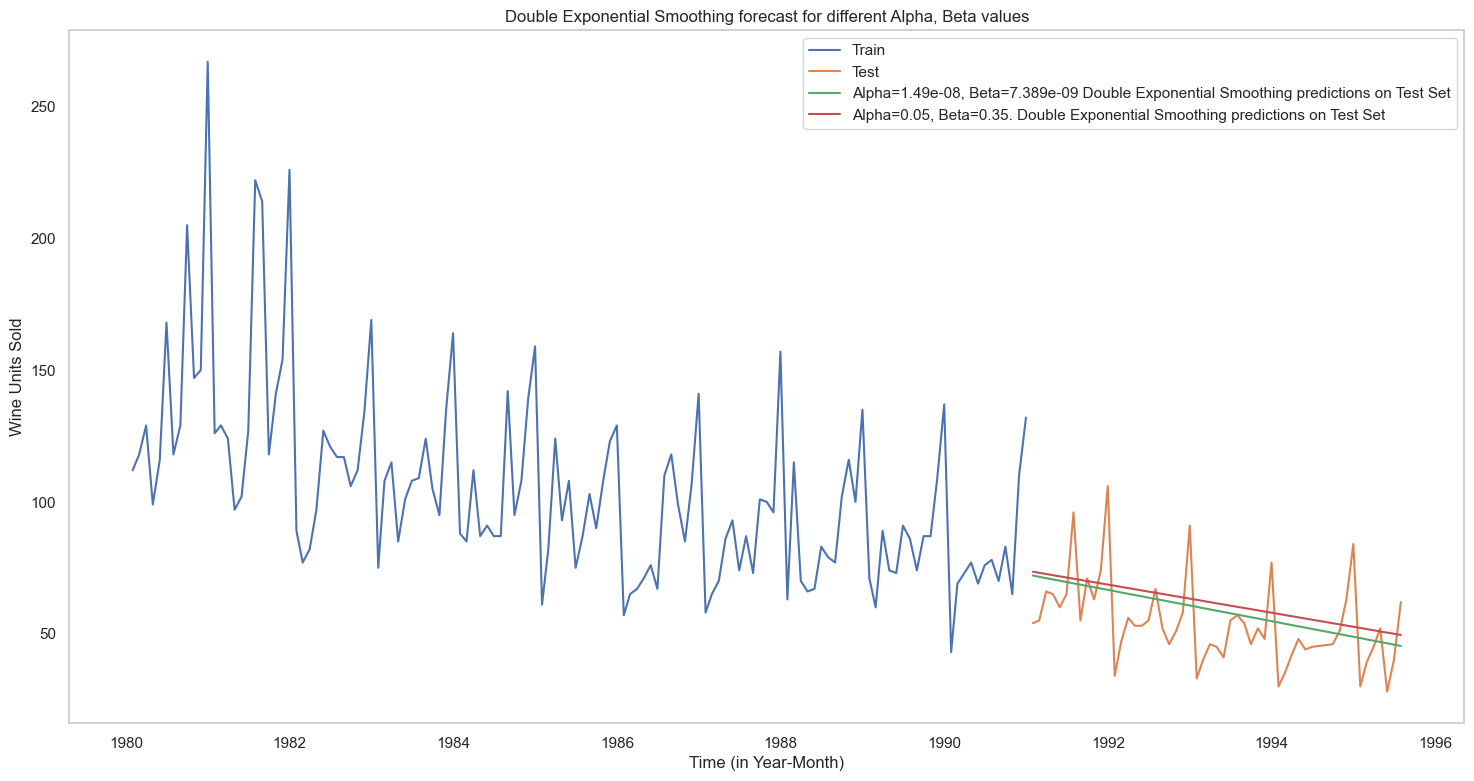

In [110]:
## Plotting on both the Training and Test data
model_DES_alpha_i_j = model_DES.fit(smoothing_level=0.05,smoothing_trend=0.35,optimized=False,use_brute=True)
DES_train['predict',0.05,0.35] = model_DES_alpha_i_j.fittedvalues
DES_test['predict',0.05,0.35] = model_DES_alpha_i_j.forecast(len(test))
        
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=1.49e-08, Beta=7.389e-09 Double Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict',0.05,0.35], label='Alpha=0.05, Beta=0.35. Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Double Exponential Smoothing forecast for different Alpha, Beta values')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

In [111]:
TES_train = train.copy()
TES_test = test.copy()

In [112]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [113]:
model_TES_autofit = model_TES.fit()

In [114]:
model_TES_autofit.params

{'smoothing_level': 0.07130285749243212,
 'smoothing_trend': 0.04550837652110988,
 'smoothing_seasonal': 8.385716703273524e-05,
 'damping_trend': nan,
 'initial_level': 163.60092654560762,
 'initial_trend': -0.9804841883026134,
 'initial_seasons': array([0.68714163, 0.77936108, 0.85184662, 0.74446365, 0.8372947 ,
        0.91182237, 1.00282327, 1.06745268, 1.01025249, 0.98957378,
        1.1535151 , 1.59037115]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [115]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     56.332862
1991-02-28  55.0     63.693063
1991-03-31  66.0     69.394575
1991-04-30  65.0     60.454513
1991-05-31  60.0     67.772390

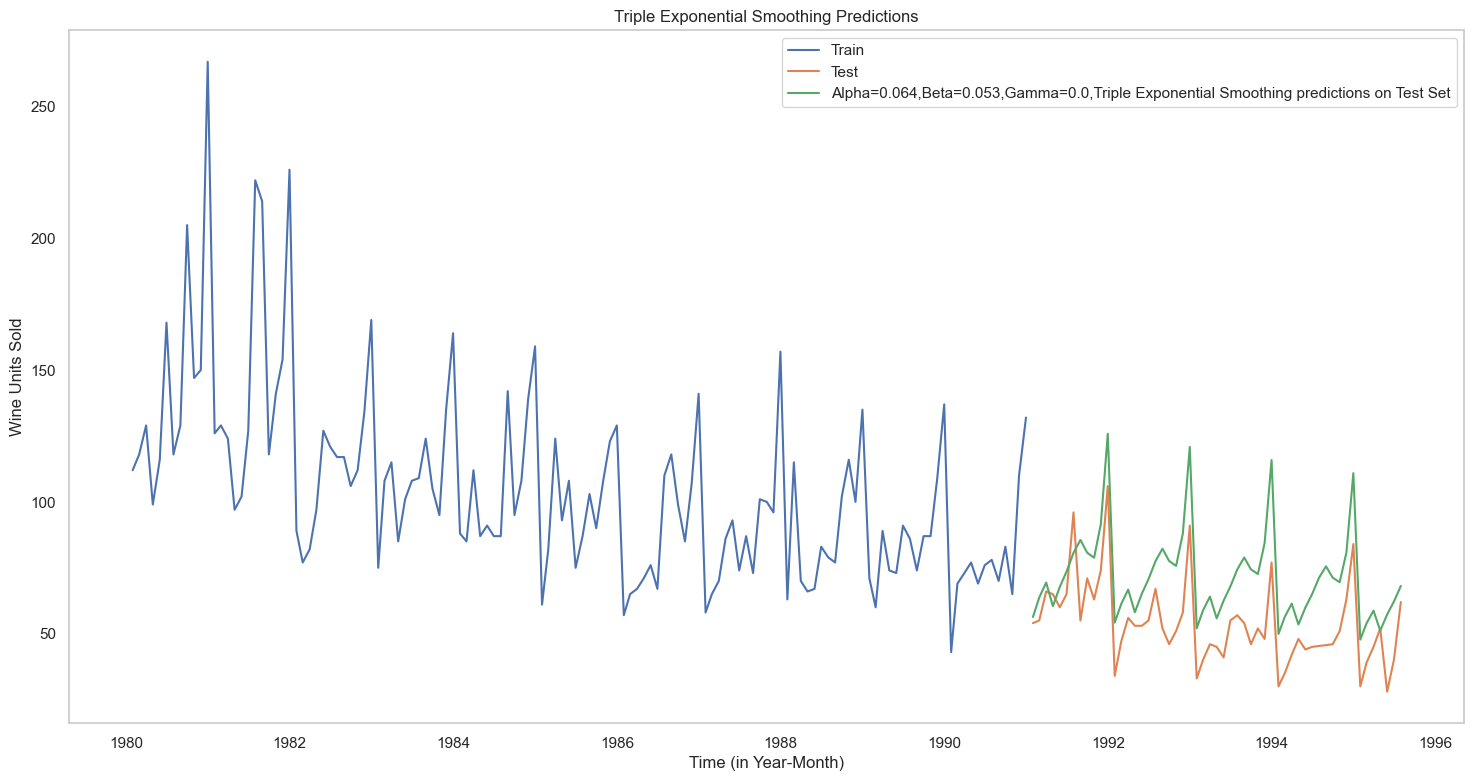

In [116]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

In [117]:
## Test Data

rmse_tes_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_tes_test))

For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.190


In [118]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_tes_test]}
                           ,index=['Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   15.268887
Simple Average                                      53.460367
2 point TMA                                         11.529278
4 point TMA                                         14.451376
6 point TMA                                         14.566262
9 point TMA                                         14.727596
Alpha=0.0987,SimpleExponentialSmoothing             37.592006
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  20.189519

In [119]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha, Beta, Gamma, Train RMSE, Test RMSE]
Index: []

In [121]:


# Assuming you have TES_train, TES_test, model_TES, test, and resultsDf_8_2 defined

results_list = []  # Create an empty list to store results

for i in np.arange(0.1, 1.05, 0.05):
    for j in np.arange(0.1, 1.05, 0.05):
        for k in np.arange(0.1, 1.05, 0.05):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, optimized=False, use_brute=True)
            TES_train['predict', i, j, k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict', i, j, k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'], TES_train['predict', i, j, k], squared=False)
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'], TES_test['predict', i, j, k], squared=False)

            results_list.append({'Alpha': i, 'Beta': j, 'Gamma': k, 'Train RMSE': rmse_model8_train, 'Test RMSE': rmse_model8_test})

resultsDf_8_2 = pd.DataFrame(results_list)  # Create DataFrame from the list

In [123]:
resultsDf_8_2

Alpha  Beta  Gamma    Train RMSE     Test RMSE
0       0.1   0.1   0.10     19.535124     11.827037
1       0.1   0.1   0.15     19.784754     11.666445
2       0.1   0.1   0.20     20.068055     11.617539
3       0.1   0.1   0.25     20.378996     11.649174
4       0.1   0.1   0.30     20.714821     11.746500
...     ...   ...    ...           ...           ...
6854    1.0   1.0   0.80   2438.212926   2573.842650
6855    1.0   1.0   0.85  24668.257202   5275.319660
6856    1.0   1.0   0.90  28835.801101   3522.899082
6857    1.0   1.0   0.95   7232.599744  19328.687218
6858    1.0   1.0   1.00   1577.905281   3104.659356

[6859 rows x 5 columns]

In [124]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Test RMSE
38    0.1  0.20   0.10   19.770392   9.223385
19    0.1  0.15   0.10   19.647564   9.280630
20    0.1  0.15   0.15   19.879642   9.313311
39    0.1  0.20   0.15   19.993053   9.337492
21    0.1  0.15   0.20   20.148043   9.406805

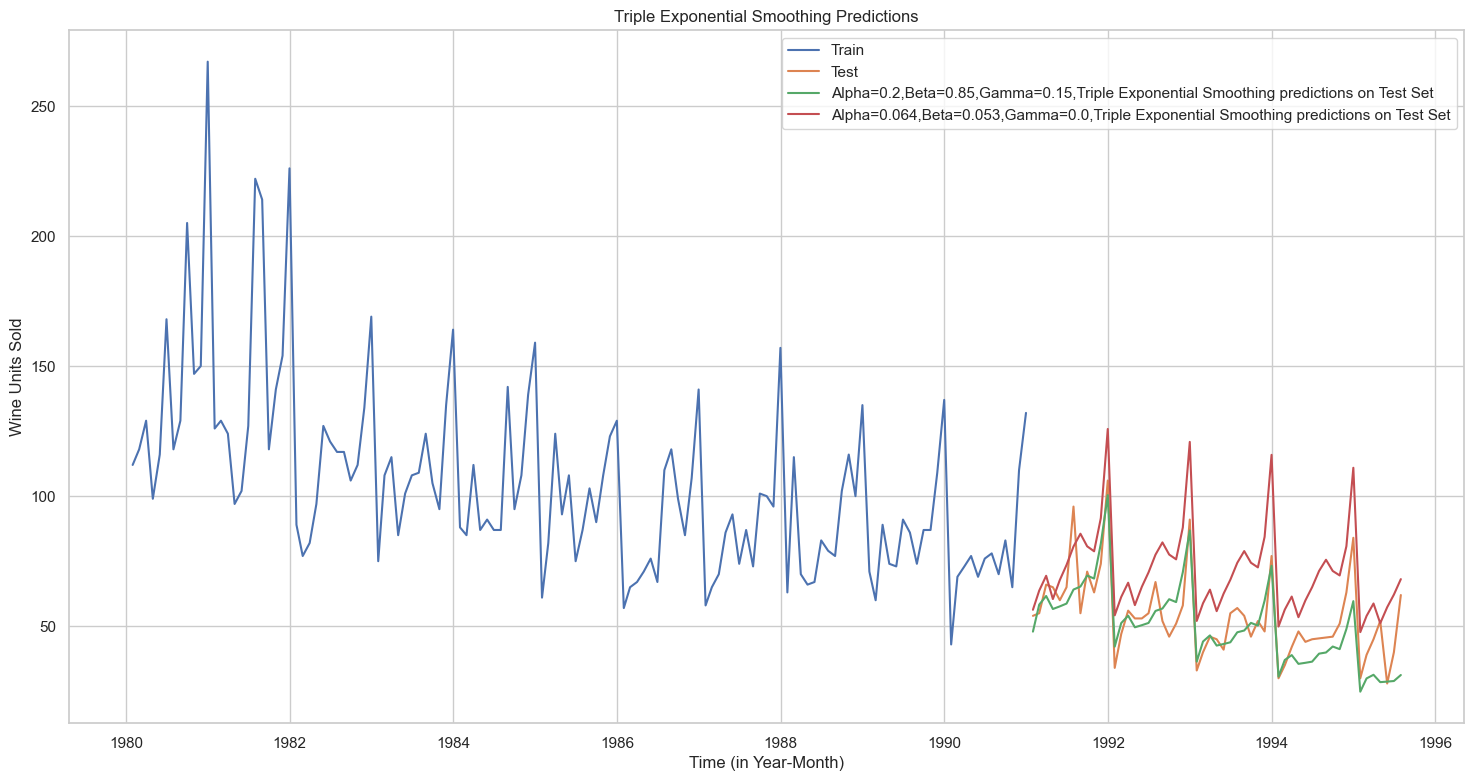

In [125]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.2,smoothing_trend=0.85,smoothing_seasonal=0.15,optimized=False,use_brute=True)
TES_train['predict',0.2,0.85,0.15] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',0.2,0.85,0.15] = model_TES_alpha_i_j_k.forecast(steps=len(test))
rmse_tes_test_lowest = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',0.2,0.85,0.15],squared=False)

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();
plt.grid();

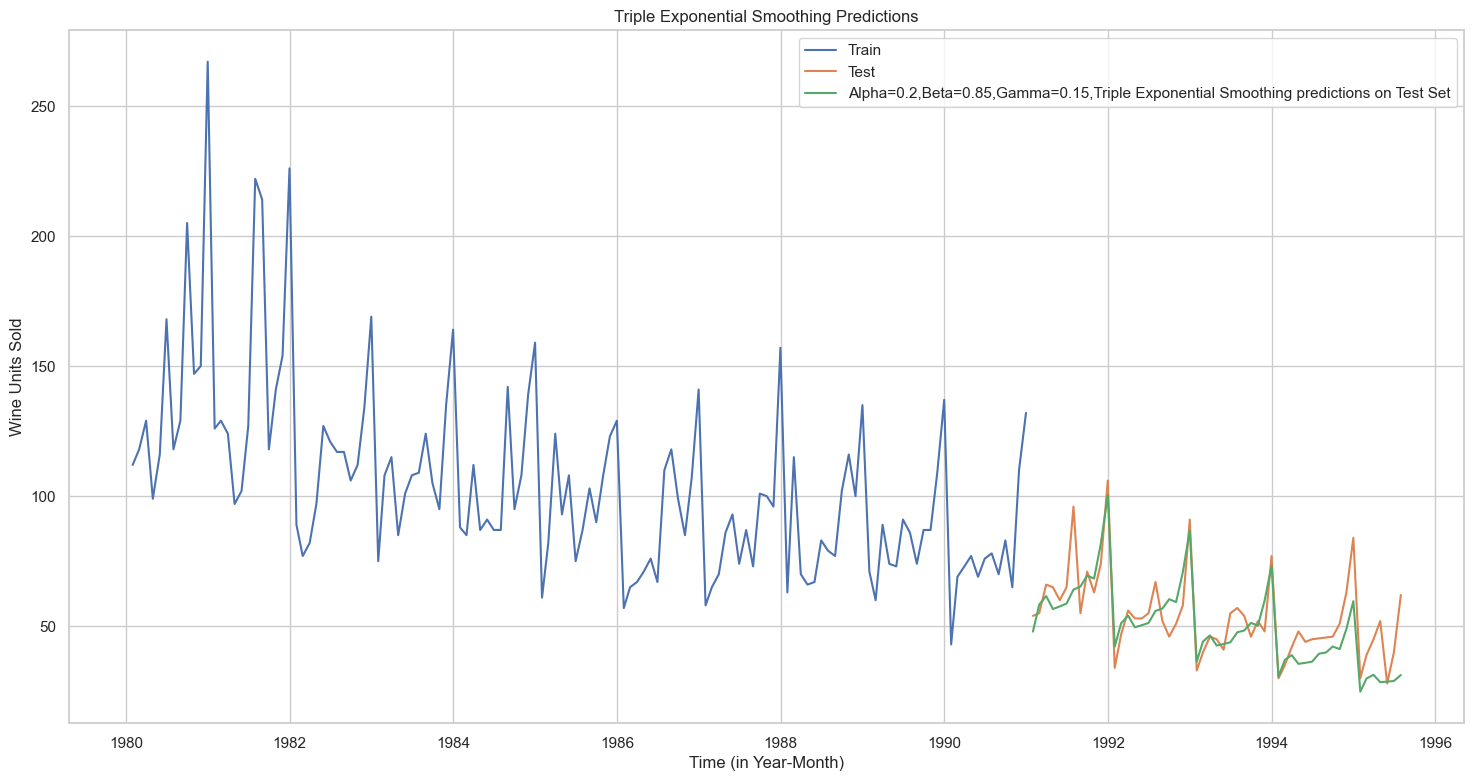

In [126]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.2,smoothing_trend=0.85,smoothing_seasonal=0.15,optimized=False,use_brute=True)
TES_train['predict',0.2,0.85,0.15] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',0.2,0.85,0.15] = model_TES_alpha_i_j_k.forecast(steps=len(test))
rmse_tes_test_lowest = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',0.2,0.85,0.15],squared=False)

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();
plt.grid();

In [127]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_tes_test_lowest]}
                           ,index=['Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test RMSE
Linear Regression                                   15.268887
Simple Average                                      53.460367
2 point TMA                                         11.529278
4 point TMA                                         14.451376
6 point TMA                                         14.566262
9 point TMA                                         14.727596
Alpha=0.0987,SimpleExponentialSmoothing             37.592006
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  20.189519
Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponenti...  10.279876

In [128]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponenti...  10.279876
2 point TMA                                         11.529278
4 point TMA                                         14.451376
6 point TMA                                         14.566262
9 point TMA                                         14.727596
Linear Regression                                   15.268887
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  20.189519
Alpha=0.0987,SimpleExponentialSmoothing             37.592006
Simple Average                                      53.460367

In [129]:
from statsmodels.tsa.stattools import adfuller

In [130]:
print('Results of Dicky-Fuller Test')
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test
DF test statistic is -2.240
DF test p-value is 0.467135052980583
Number of lags used 13


In [131]:
print('Results of Dicky-Fuller Test with differencing')
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test with differencing
DF test statistic is -8.162
DF test p-value is 3.015892676561221e-11
Number of lags used 12


Text(0.5, 0, 'Time (in Year-Month)')

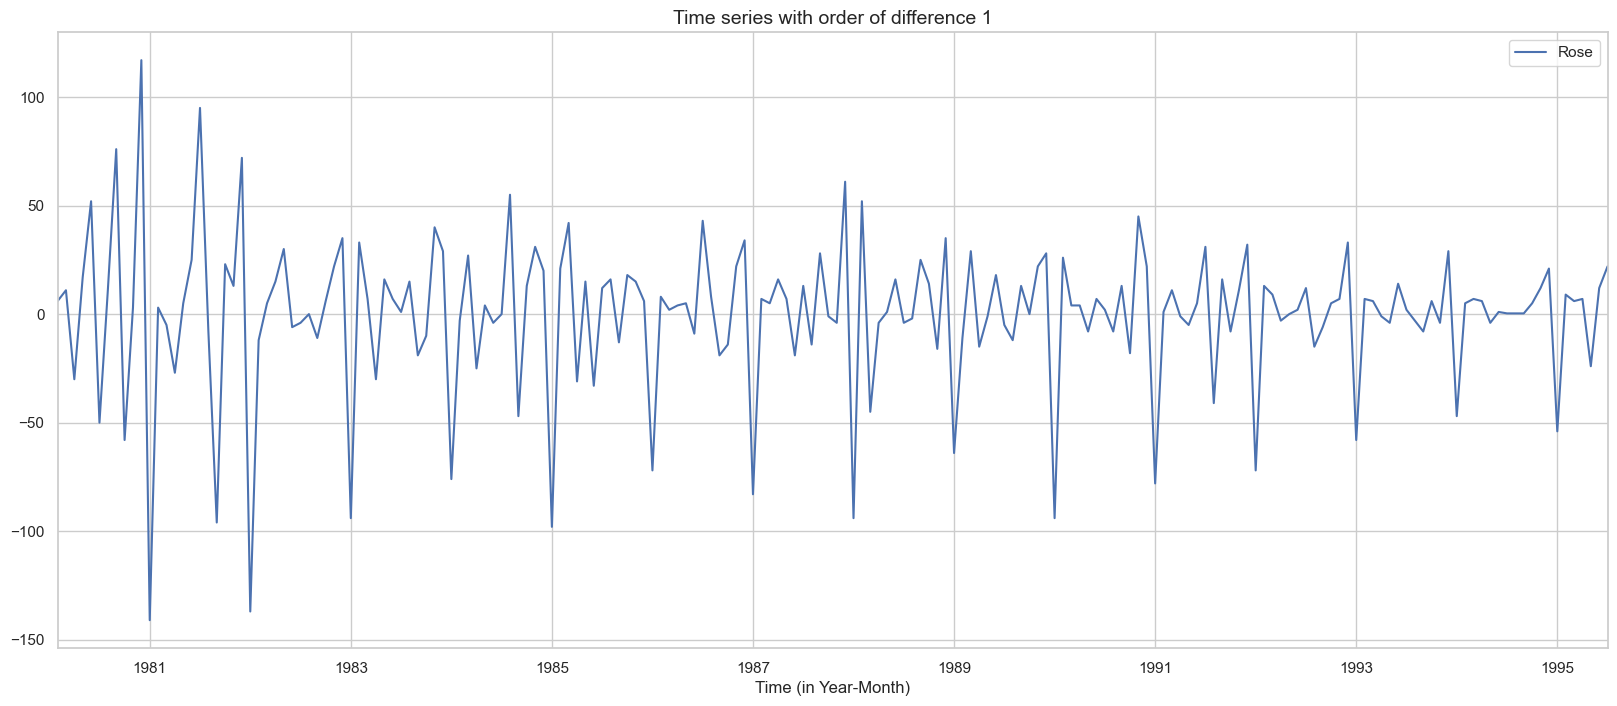

In [132]:
df.diff().dropna().plot(grid=True);
plt.title('Time series with order of difference 1', fontsize=14)
plt.xlabel('Time (in Year-Month)')

Text(0, 0.5, 'Correlation')

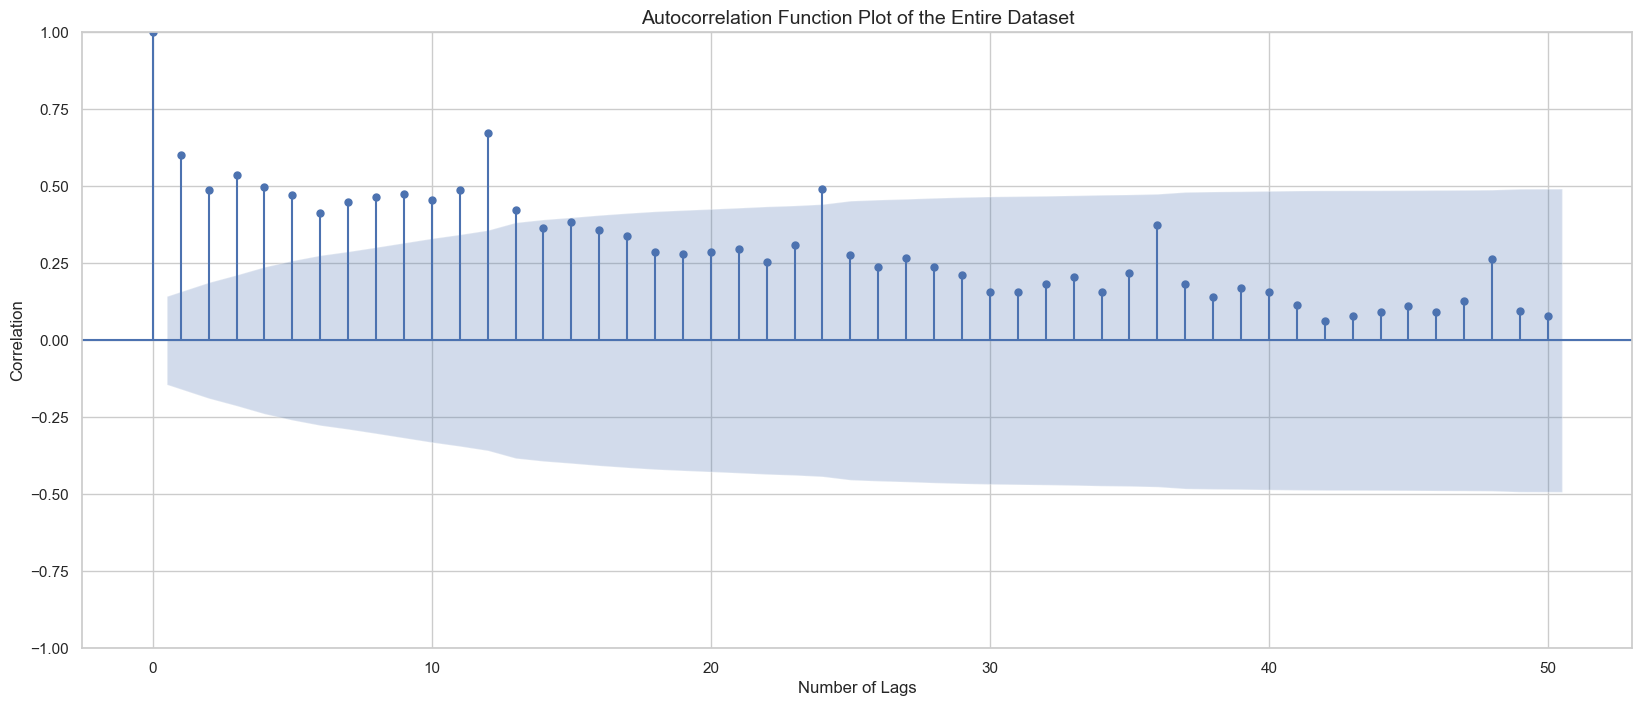

In [133]:
plot_acf(df,alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

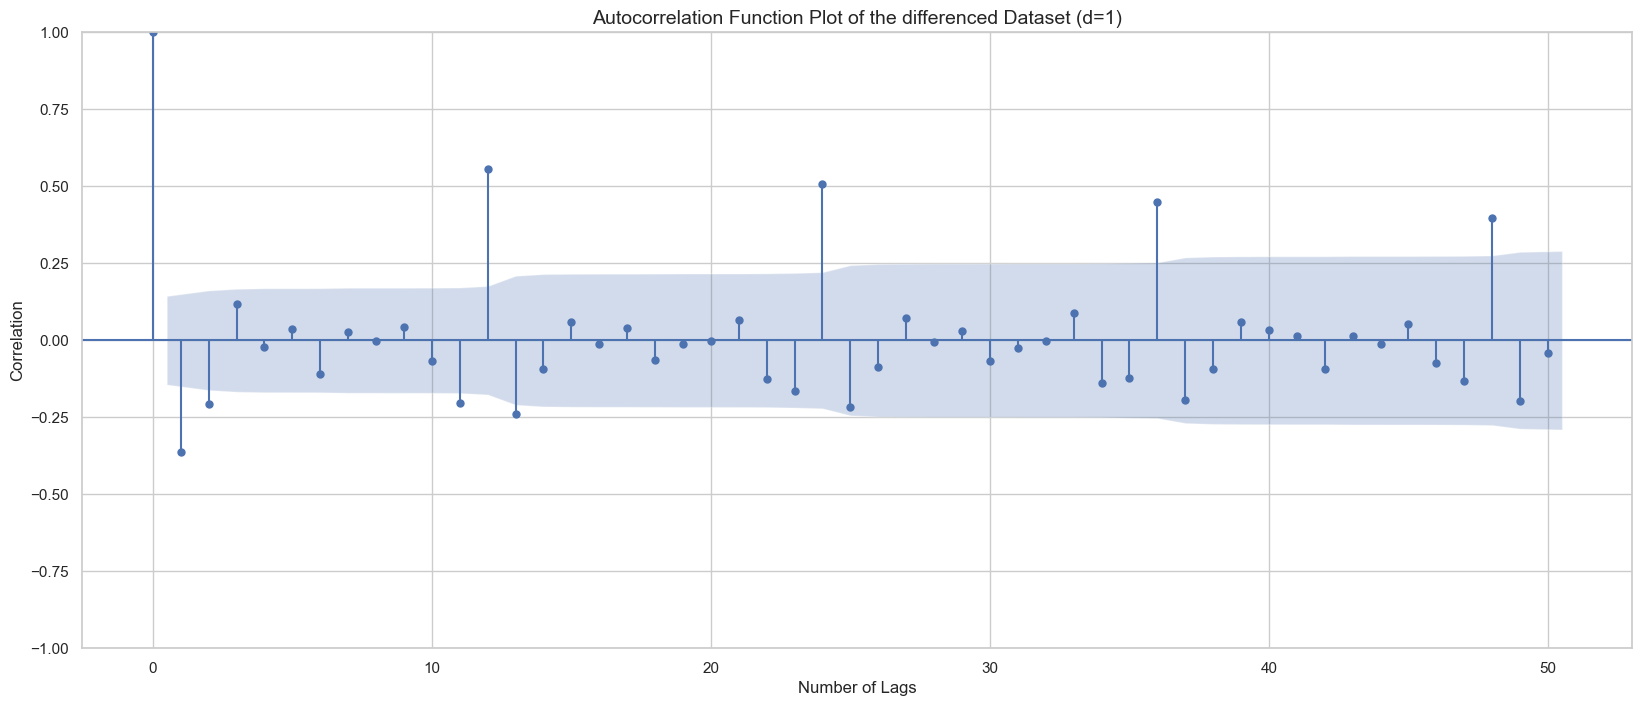

In [134]:
plot_acf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

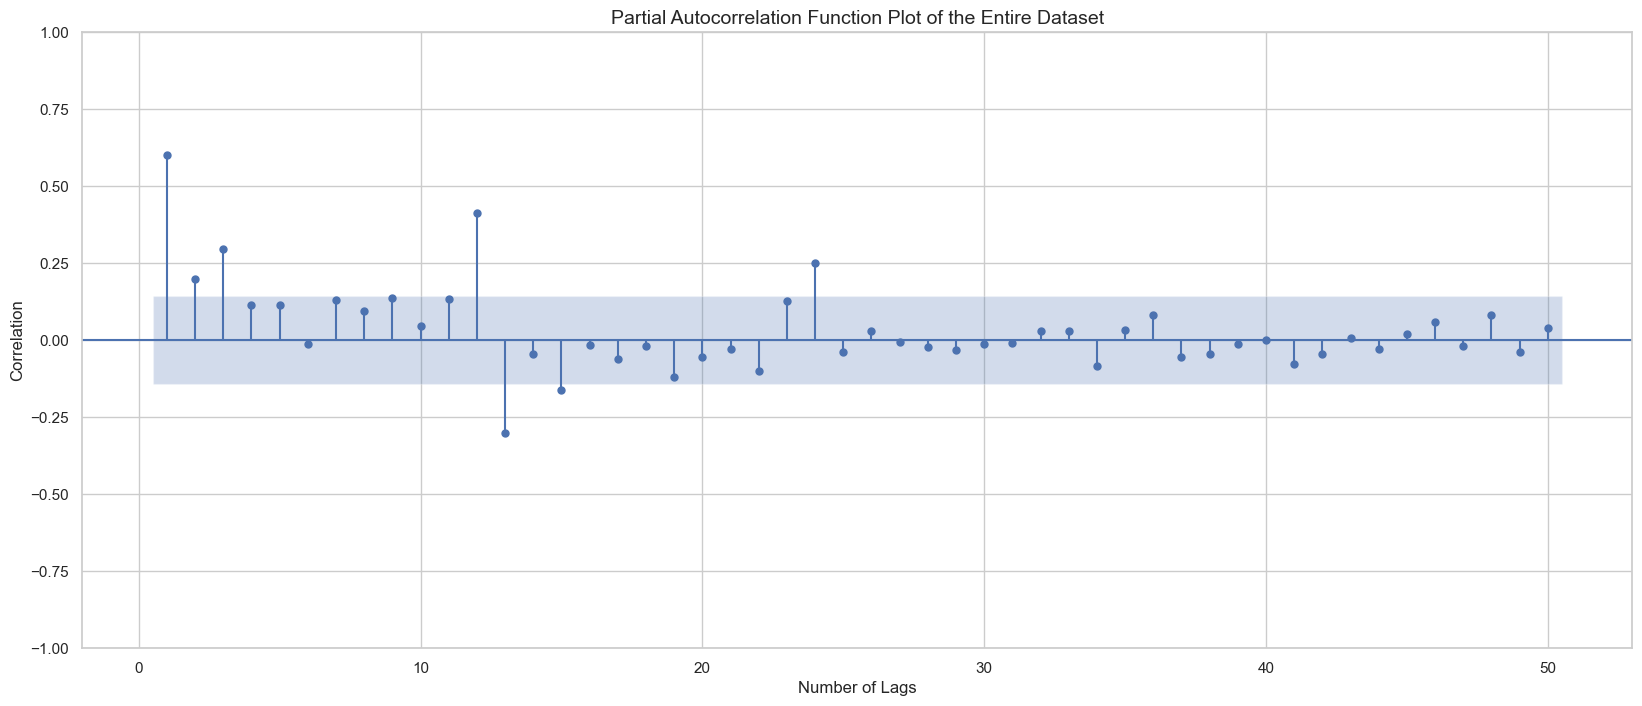

In [135]:
plot_pacf(df,zero=False,alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

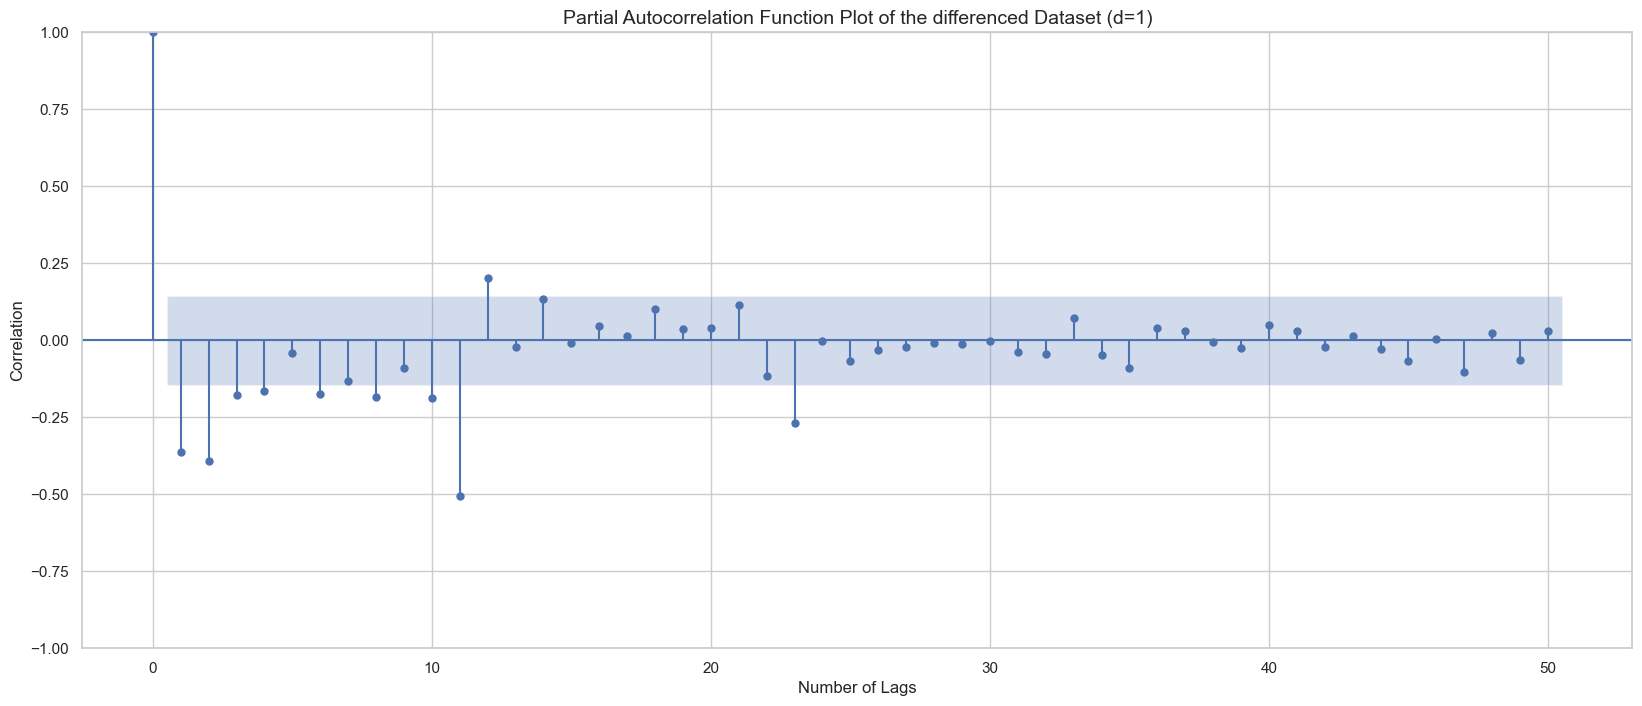

In [136]:
plot_pacf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

In [137]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

Text(0, 0.5, 'Wine units sold')

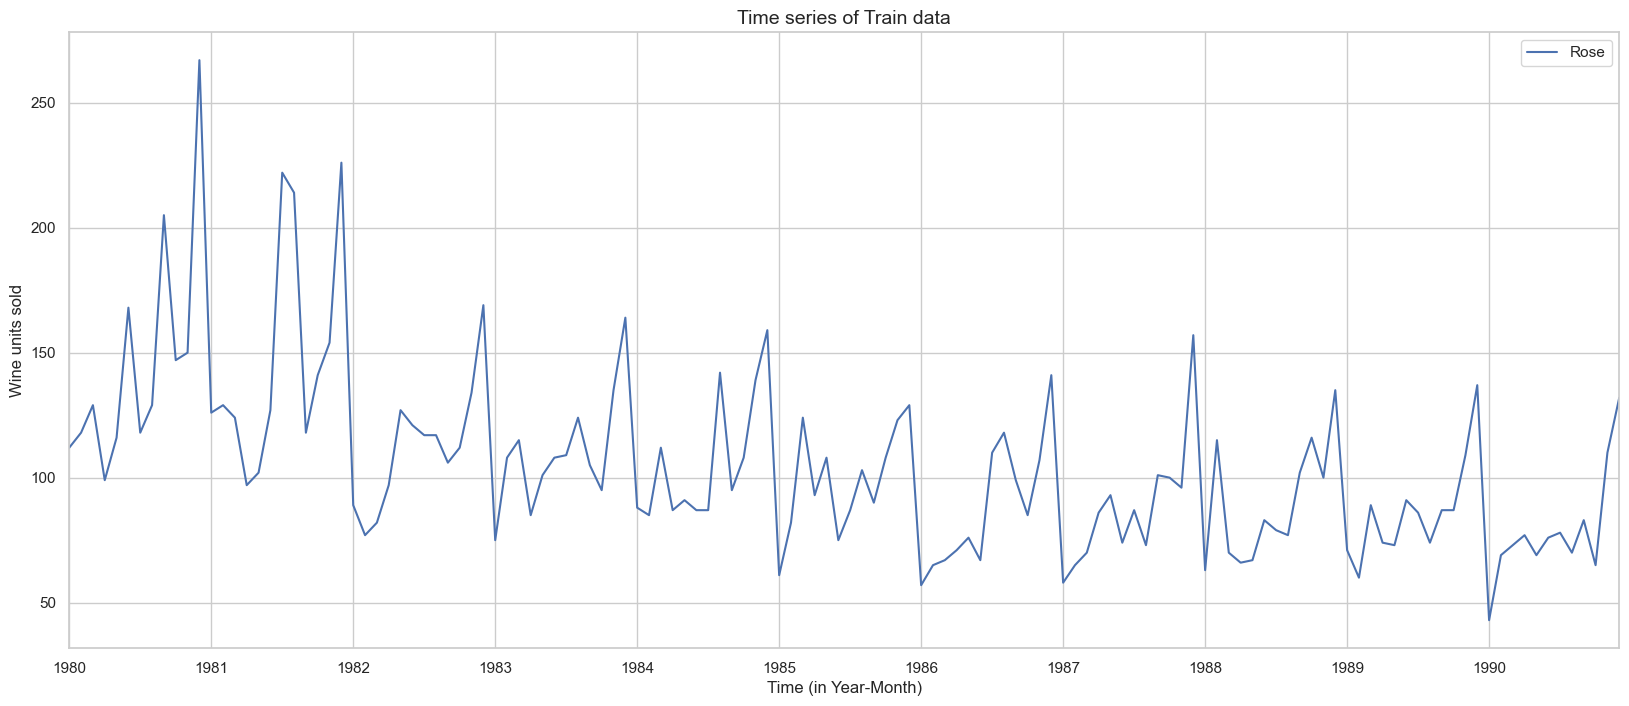

In [138]:
train.plot(grid=True);
plt.title('Time series of Train data', fontsize=14)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')

In [139]:
print('Results of Dicky-Fuller Test on Train data')
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test on Train data
DF test statistic is -1.686
DF test p-value is 0.7569093051047111
Number of lags used 13


In [140]:
print('Results of Dicky-Fuller Test on Train data with differencing')
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test on Train data with differencing
DF test statistic is -6.804
DF test p-value is 3.894831356782998e-08
Number of lags used 12


Text(0, 0.5, 'Wine units sold')

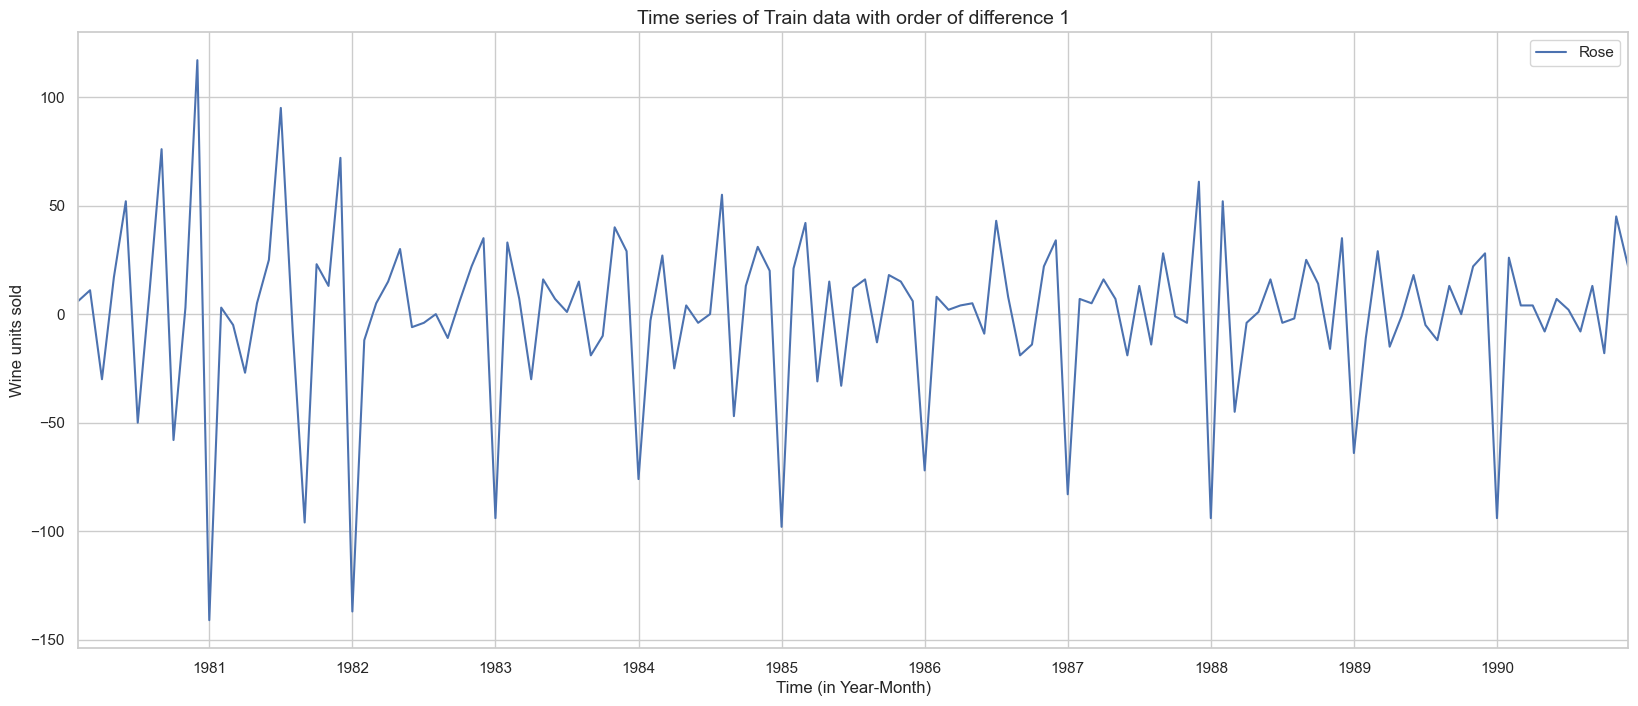

In [141]:
train.diff().dropna().plot(grid=True);
plt.title('Time series of Train data with order of difference 1', fontsize=14)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [143]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [144]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [146]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Initialize an empty DataFrame before the loop
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

for param in pdq:  # Loop through the pdq parameters
    ARIMA_model = ARIMA(train['Rose'].values, order=param).fit()  # Fit ARIMA model
    print(f'ARIMA{param} - AIC: {ARIMA_model.aic}')  # Print AIC value

    # Create a new row as a DataFrame and use pd.concat()
    new_row = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
    ARIMA_AIC = pd.concat([ARIMA_AIC, new_row], ignore_index=True)


ARIMA(0, 1, 0) - AIC: 1333.1546729124348
ARIMA(0, 1, 1) - AIC: 1282.3098319748333
ARIMA(0, 1, 2) - AIC: 1279.6715288535802
ARIMA(0, 1, 3) - AIC: 1280.5453761734655
ARIMA(0, 1, 4) - AIC: 1281.6766982143945
ARIMA(1, 1, 0) - AIC: 1317.3503105381546
ARIMA(1, 1, 1) - AIC: 1280.5742295380055
ARIMA(1, 1, 2) - AIC: 1279.8707234231933
ARIMA(1, 1, 3) - AIC: 1281.8707223309975
ARIMA(1, 1, 4) - AIC: 1279.6052660805917
ARIMA(2, 1, 0) - AIC: 1298.6110341604983
ARIMA(2, 1, 1) - AIC: 1281.5078621868515
ARIMA(2, 1, 2) - AIC: 1281.8707222264593
ARIMA(2, 1, 3) - AIC: 1274.695124758913
ARIMA(2, 1, 4) - AIC: 1278.770835904301
ARIMA(3, 1, 0) - AIC: 1297.4810917271698
ARIMA(3, 1, 1) - AIC: 1282.4192776271952
ARIMA(3, 1, 2) - AIC: 1283.720740597711
ARIMA(3, 1, 3) - AIC: 1278.659276175651
ARIMA(3, 1, 4) - AIC: 1287.7190768700912
ARIMA(4, 1, 0) - AIC: 1296.3266569004472
ARIMA(4, 1, 1) - AIC: 1283.7931715123077
ARIMA(4, 1, 2) - AIC: 1285.718248563479
ARIMA(4, 1, 3) - AIC: 1278.4514146222832
ARIMA(4, 1, 4) - AIC:

In [147]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
13  (2, 1, 3)  1274.695125
23  (4, 1, 3)  1278.451415
18  (3, 1, 3)  1278.659276
14  (2, 1, 4)  1278.770836
9   (1, 1, 4)  1279.605266

In [148]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 23 Feb 2025   AIC                           1274.695
Time:                        11:34:05   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.039      0.000      -1.842      -1.514
ar.L2         -0.7287      0.084     -8.701      0.000      -0.893      -0.565
ma.L1          1.0445      0.630      1.657      0.0

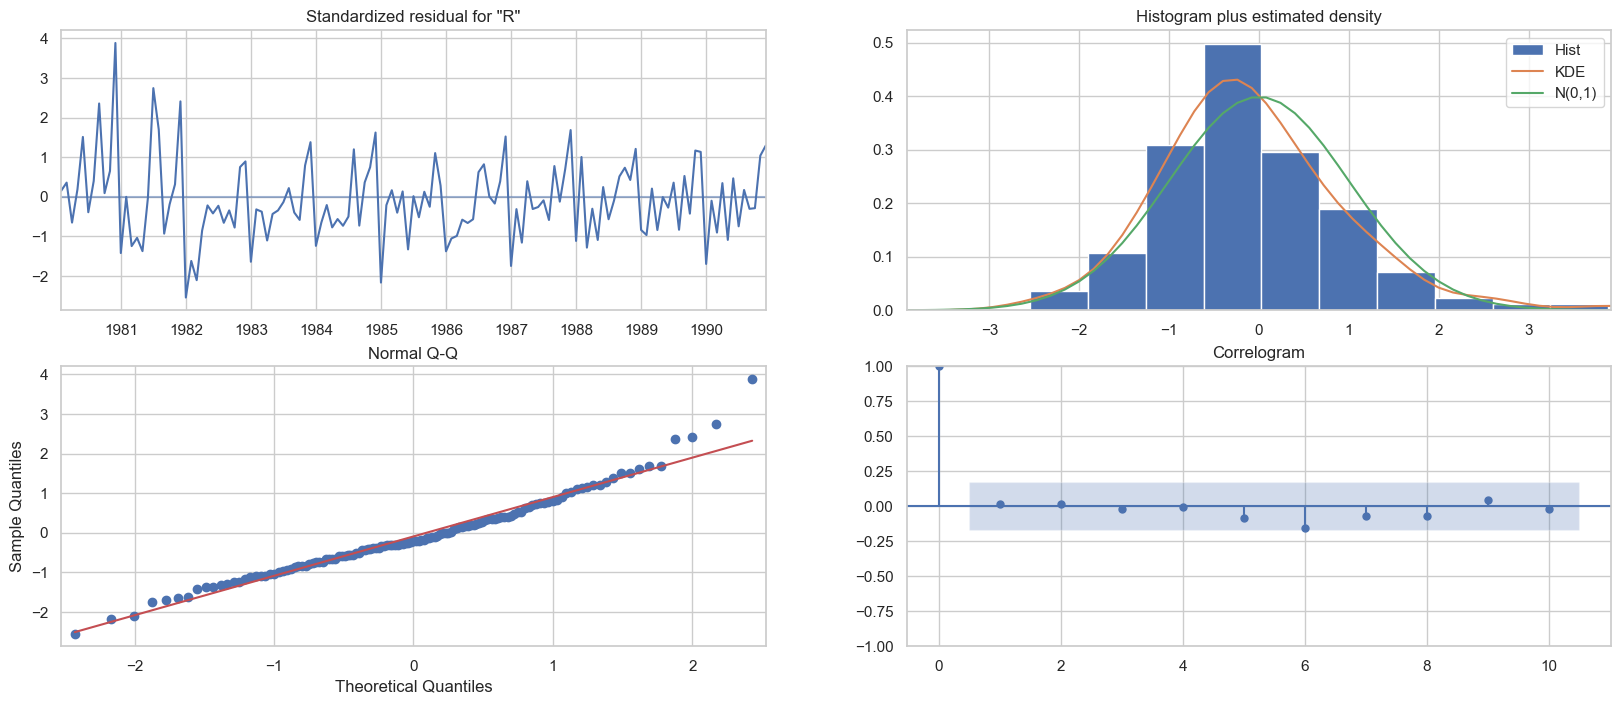

In [149]:
results_auto_ARIMA.plot_diagnostics();

In [150]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [151]:
predicted_auto_ARIMA

1991-01-31    85.583905
1991-02-28    90.543954
1991-03-31    81.953004
1991-04-30    92.753257
1991-05-31    80.891805
1991-06-30    92.923963
1991-07-31    81.378644
1991-08-31    91.982723
1991-09-30    82.603175
1991-10-31    90.613972
1991-11-30    84.007483
1991-12-31    89.255093
1992-01-31    85.264229
1992-02-29    88.136610
1992-03-31    86.225146
1992-04-30    87.339320
1992-05-31    86.862704
1992-06-30    86.850541
1992-07-31    87.218244
1992-08-31    86.610150
1992-09-30    87.362518
1992-10-31    86.543242
1992-11-30    87.369653
1992-12-31    86.580024
1993-01-31    87.302738
1993-02-28    86.665496
1993-03-31    87.208086
1993-04-30    86.762029
1993-05-31    87.115086
1993-06-30    86.847731
1993-07-31    87.039057
1993-08-31    86.912850
1993-09-30    86.985196
1993-10-31    86.955772
1993-11-30    86.952425
1993-12-31    86.979481
1994-01-31    86.936523
1994-02-28    86.988885
1994-03-31    86.932330
1994-04-30    86.989068
1994-05-31    86.935080
1994-06-30    86

Text(0, 0.5, 'Wine Units Sold')

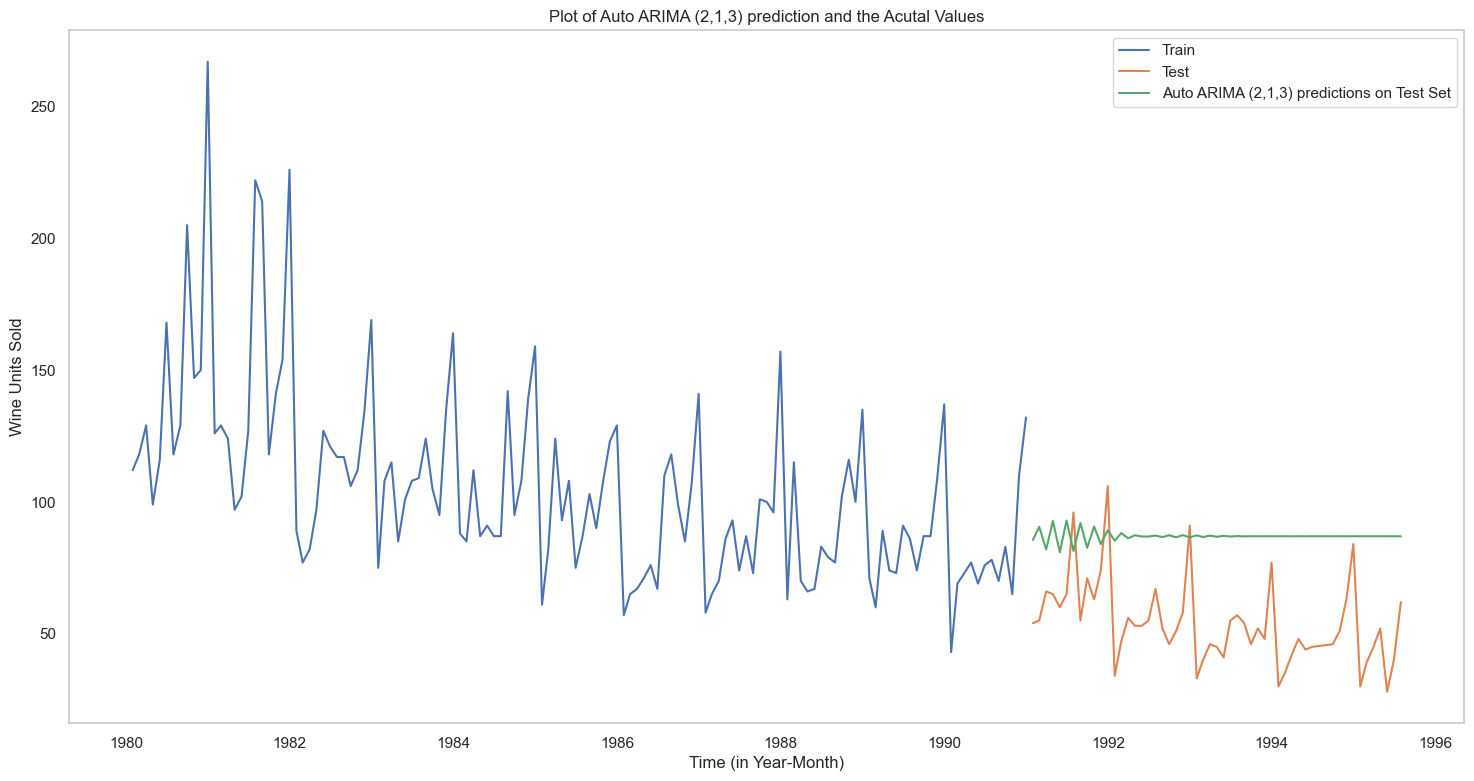

In [152]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_auto_ARIMA, label='Auto ARIMA (2,1,3) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto ARIMA (2,1,3) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [153]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [155]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.81014392531253 
MAPE: 75.83243282702776


In [156]:
resultsDf_2 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Auto ARIMA (2,1,3)'])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (2,1,3)  36.810144  75.832433

Text(0, 0.5, 'Correlation')

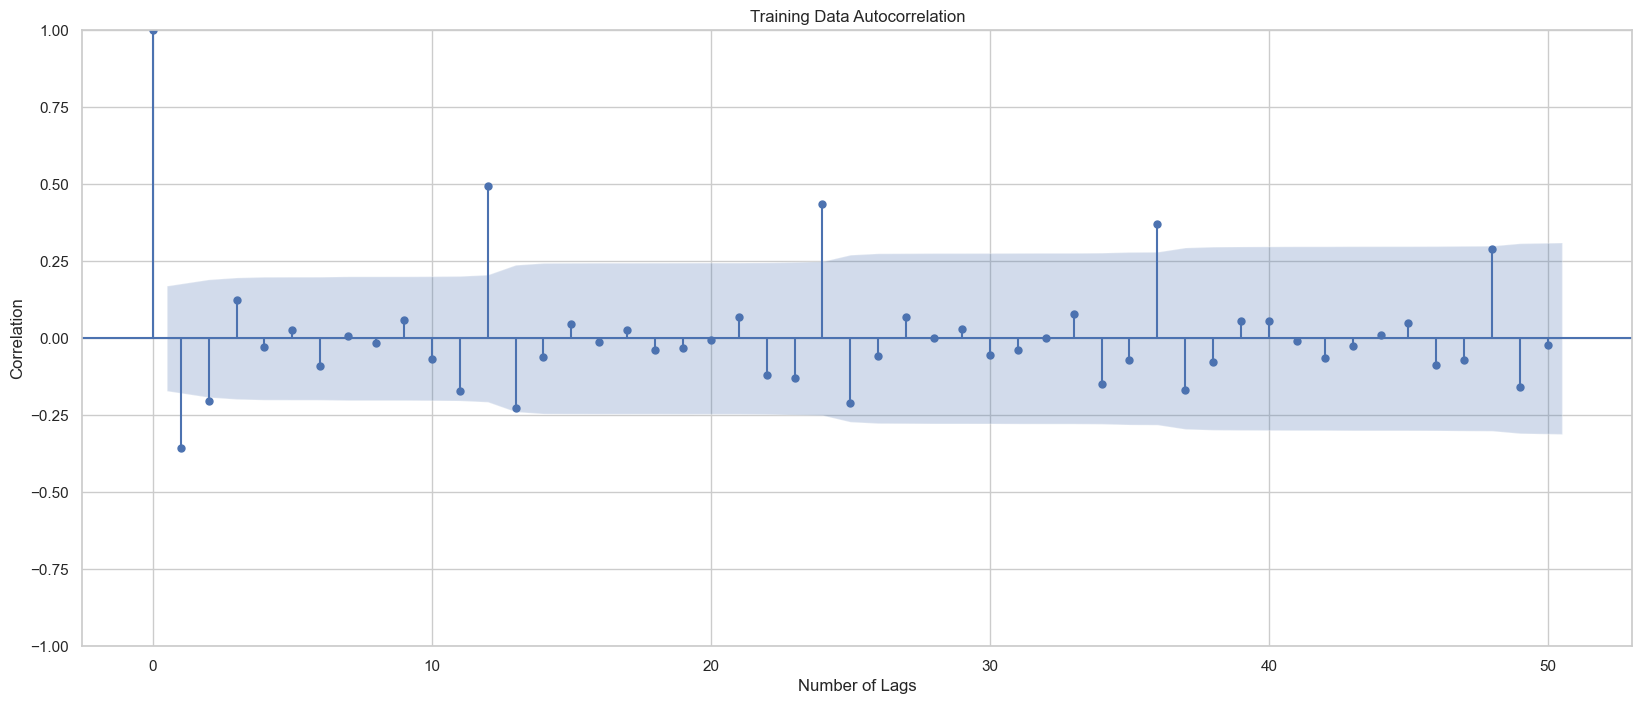

In [157]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop',lags=50);
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

In [158]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [159]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [161]:
import pandas as pd
import statsmodels.api as sm

# Initialize an empty DataFrame
SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                                 order=param,
                                                 seasonal_order=param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
        
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print(f'SARIMA{param}x{param_seasonal} - AIC: {results_SARIMA.aic}')

        # Create a DataFrame with the new row
        new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})

        # Use pd.concat() instead of append()
        SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: 1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC: 1145.423082720736
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC: 976.4375296380891
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC: 3532.0561947642996
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: 1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: 1116.0207869385747
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC: 969.691363575259
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC: 3825.193083273203
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC: 960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC: 962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC: 955.5735408945533
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC: 3719.8207308255965
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC: 850.7535403931089
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC: 851.7482702631787
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC: 850.53041361279
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC: 3048.281182256731
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC: 1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC: 1098.5554825918343
SARIMA(

In [162]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
107  (1, 1, 2)  (2, 0, 3, 12)   18.000000
219  (3, 1, 1)  (2, 0, 3, 12)   20.000000
43   (0, 1, 2)  (2, 0, 3, 12)  153.608750
222  (3, 1, 1)  (3, 0, 2, 12)  774.400286
238  (3, 1, 2)  (3, 0, 2, 12)  774.880938

In [163]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3,1,1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 23 Feb 2025   AIC                            774.400
Time:                                         12:10:31   BIC                            799.618
Sample:                                     01-31-1980   HQIC                           784.578
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

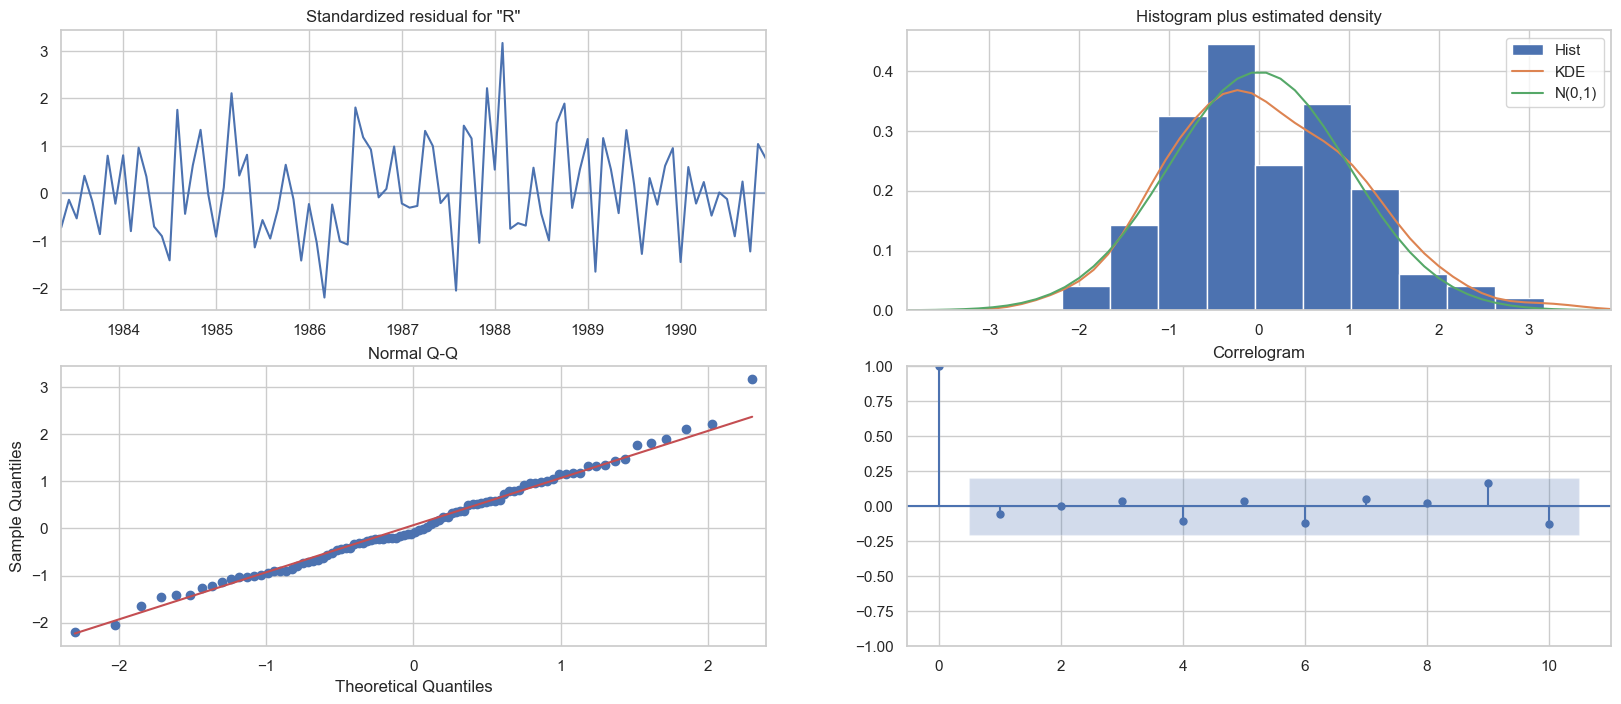

In [164]:
results_auto_SARIMA.plot_diagnostics();

In [165]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [166]:
predicted_auto_SARIMA.predicted_mean

1991-01-31     55.235784
1991-02-28     68.122657
1991-03-31     67.908790
1991-04-30     66.786255
1991-05-31     69.760434
1991-06-30     70.329010
1991-07-31     75.359550
1991-08-31     76.492086
1991-09-30     78.971398
1991-10-31     76.538687
1991-11-30     93.249078
1991-12-31    116.283250
1992-01-31     55.202494
1992-02-29     64.444099
1992-03-31     68.547779
1992-04-30     63.872375
1992-05-31     67.700152
1992-06-30     68.443619
1992-07-31     72.972117
1992-08-31     74.325391
1992-09-30     75.317933
1992-10-31     76.046876
1992-11-30     87.421337
1992-12-31    109.807281
1993-01-31     51.298307
1993-02-28     62.617097
1993-03-31     65.912092
1993-04-30     62.264376
1993-05-31     64.612147
1993-06-30     65.747576
1993-07-31     69.826316
1993-08-31     70.420008
1993-09-30     72.331798
1993-10-31     71.365737
1993-11-30     84.722294
1993-12-31    105.357890
1994-01-31     49.950004
1994-02-28     60.311784
1994-03-31     63.158226
1994-04-30     59.896924


Text(0, 0.5, 'Wine Units Sold')

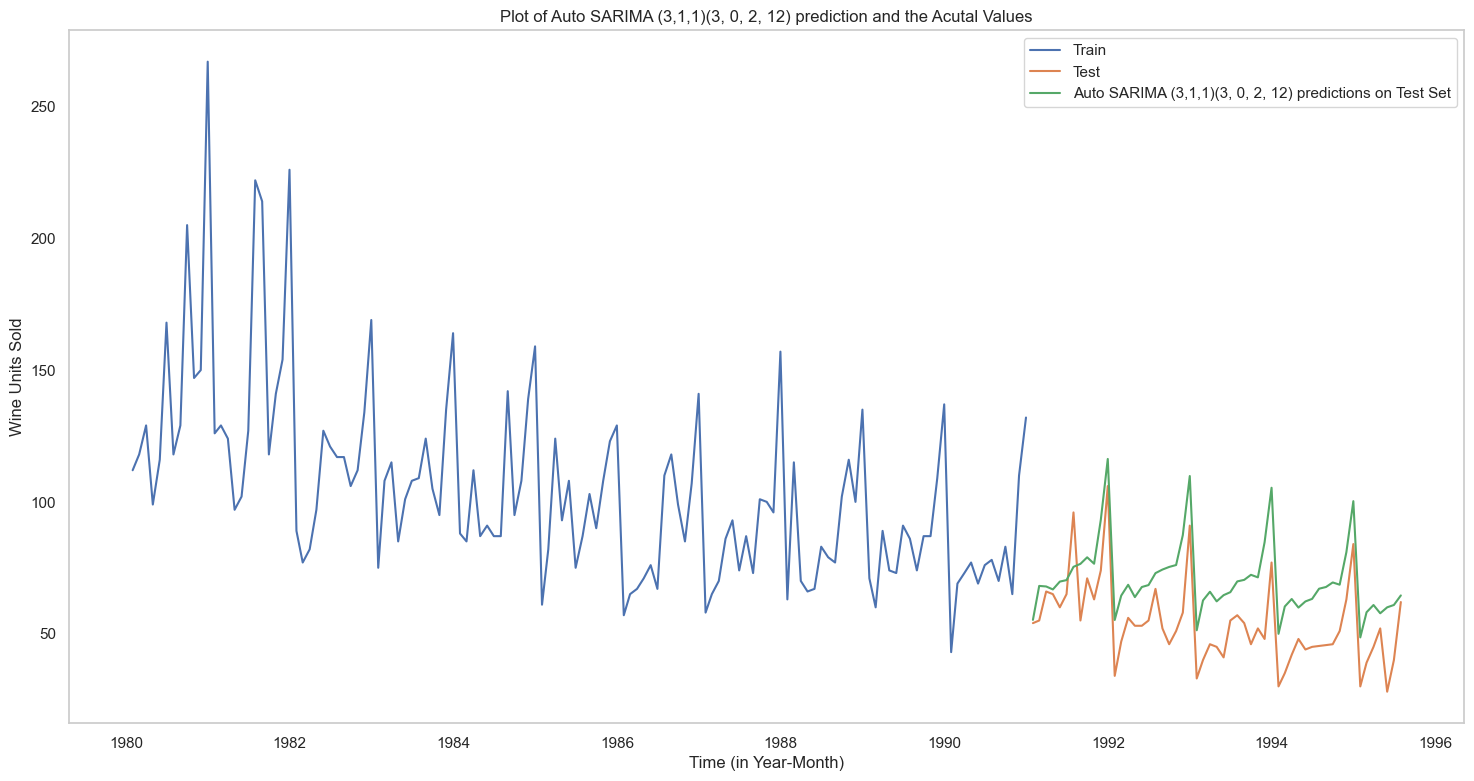

In [167]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_auto_SARIMA.predicted_mean, label='Auto SARIMA (3,1,1)(3, 0, 2, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto SARIMA (3,1,1)(3, 0, 2, 12) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [168]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  55.235784  13.907481      27.977623      82.493945
1991-02-28  68.122657  13.990914      40.700969      95.544344
1991-03-31  67.908790  14.011965      40.445844      95.371736
1991-04-30  66.786255  14.099288      39.152159      94.420352
1991-05-31  69.760434  14.108648      42.107992      97.412877

In [170]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.881822167011553 
MAPE: 36.375222668780545


In [171]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Auto SARIMA (3,1,1)(3,0,2,12)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (2,1,3)             36.810144  75.832433
Auto SARIMA (3,1,1)(3,0,2,12)  18.881822  36.375223

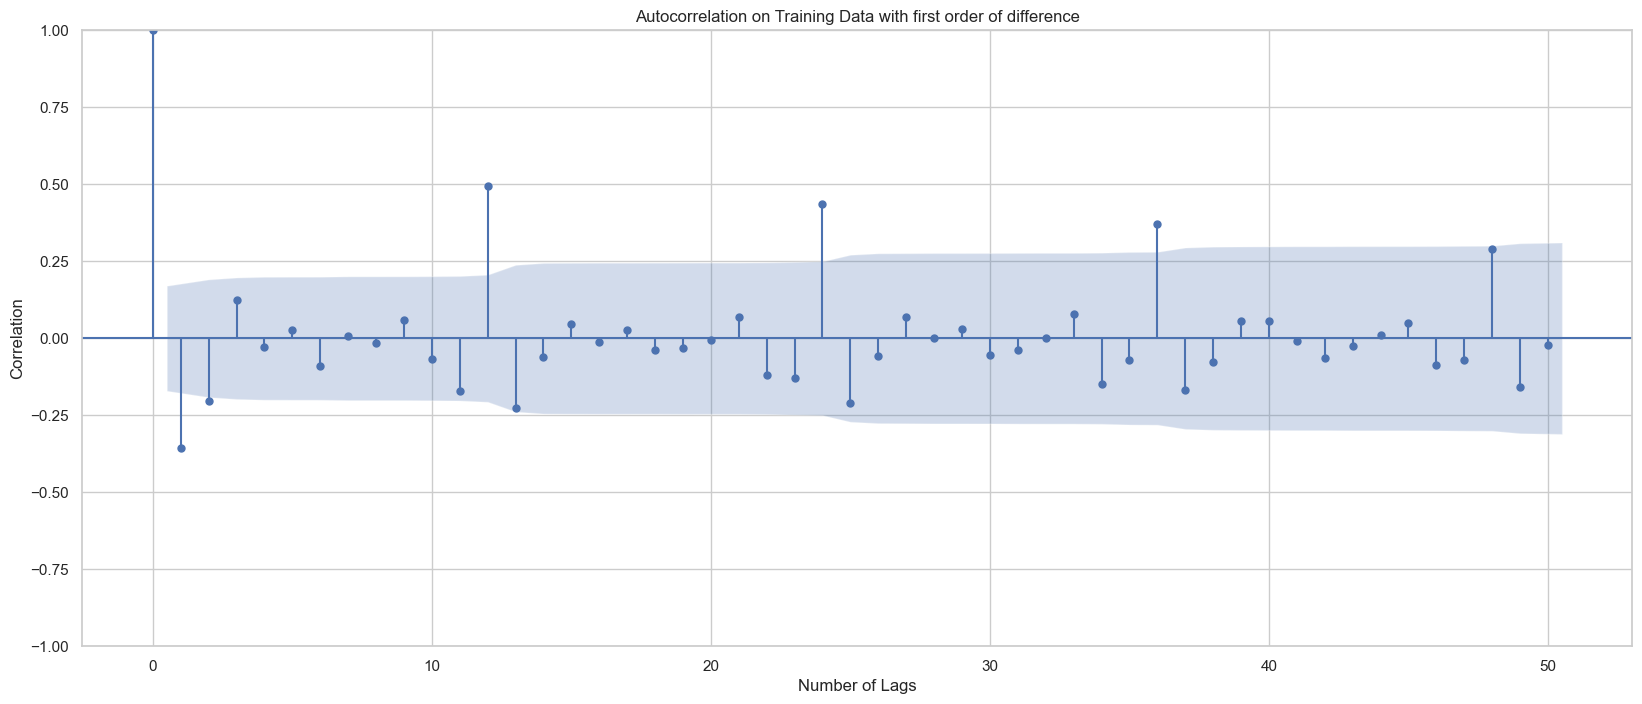

In [172]:
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

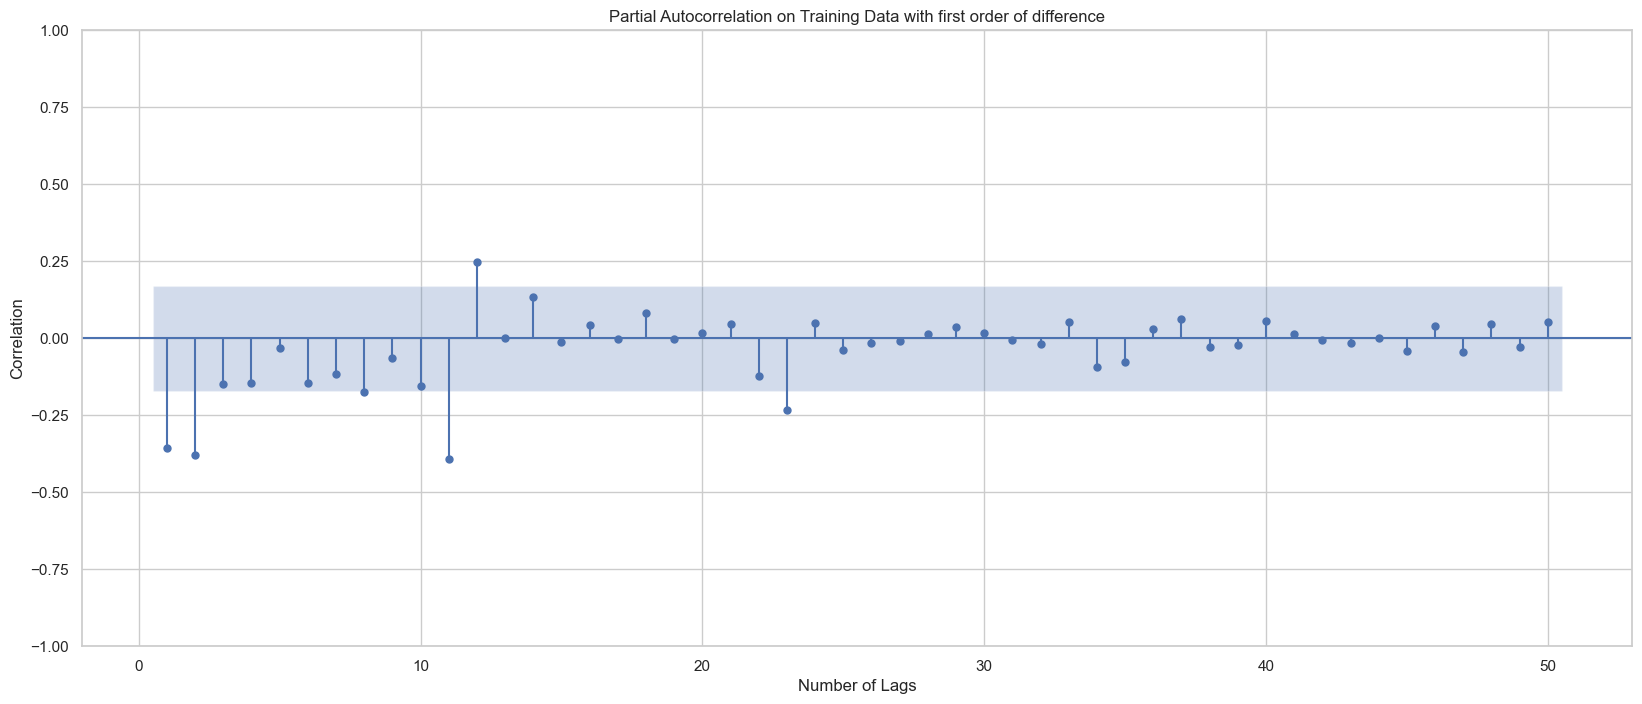

In [173]:
plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

In [174]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 23 Feb 2025   AIC                           1281.871
Time:                        12:20:21   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

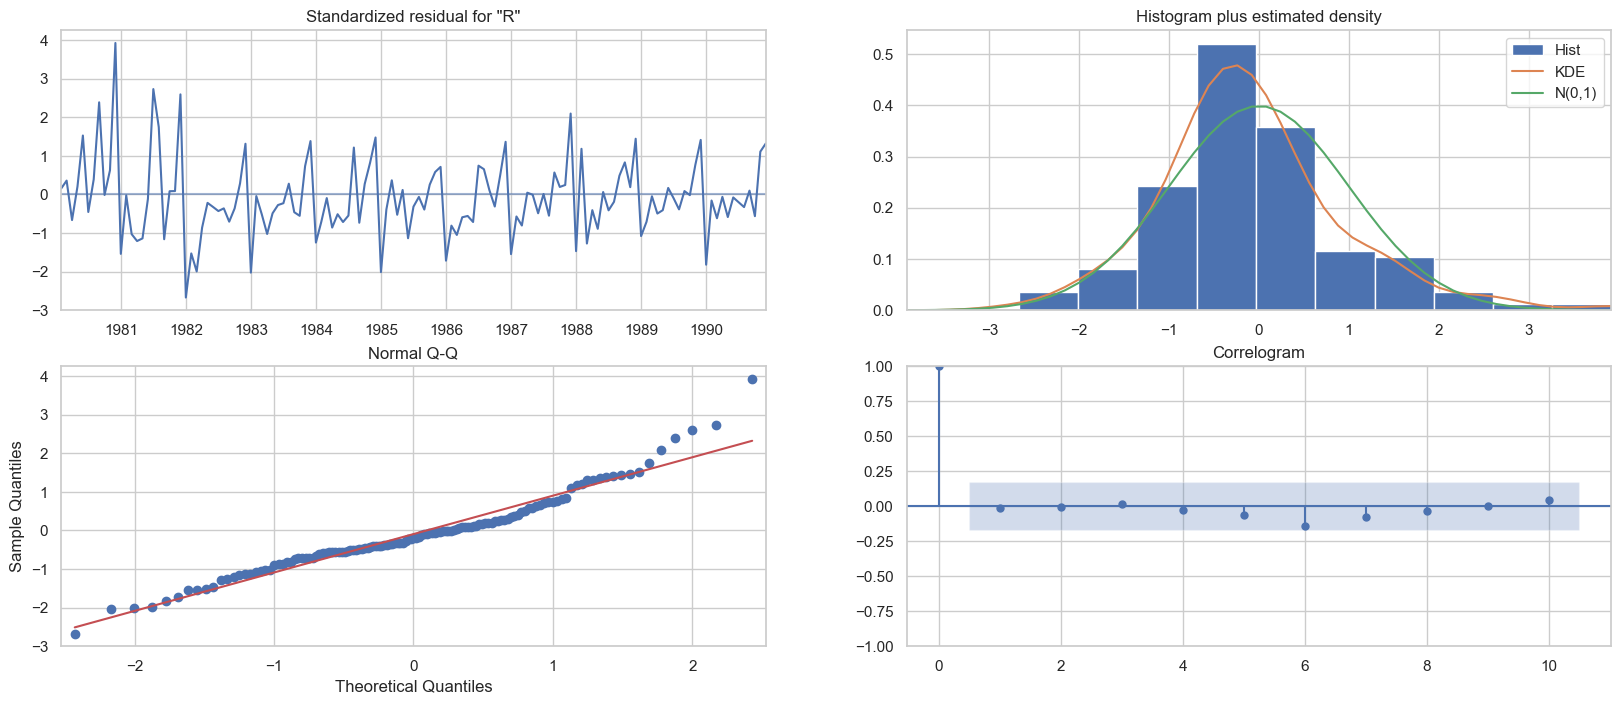

In [175]:
results_manual_ARIMA.plot_diagnostics();

In [176]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [177]:
predicted_manual_ARIMA

1991-01-31    91.159512
1991-02-28    85.314628
1991-03-31    87.962468
1991-04-30    86.759563
1991-05-31    87.306038
1991-06-30    87.057777
1991-07-31    87.170561
1991-08-31    87.119324
1991-09-30    87.142601
1991-10-31    87.132026
1991-11-30    87.136830
1991-12-31    87.134648
1992-01-31    87.135639
1992-02-29    87.135189
1992-03-31    87.135393
1992-04-30    87.135300
1992-05-31    87.135342
1992-06-30    87.135323
1992-07-31    87.135332
1992-08-31    87.135328
1992-09-30    87.135330
1992-10-31    87.135329
1992-11-30    87.135329
1992-12-31    87.135329
1993-01-31    87.135329
1993-02-28    87.135329
1993-03-31    87.135329
1993-04-30    87.135329
1993-05-31    87.135329
1993-06-30    87.135329
1993-07-31    87.135329
1993-08-31    87.135329
1993-09-30    87.135329
1993-10-31    87.135329
1993-11-30    87.135329
1993-12-31    87.135329
1994-01-31    87.135329
1994-02-28    87.135329
1994-03-31    87.135329
1994-04-30    87.135329
1994-05-31    87.135329
1994-06-30    87

Text(0, 0.5, 'Wine Units Sold')

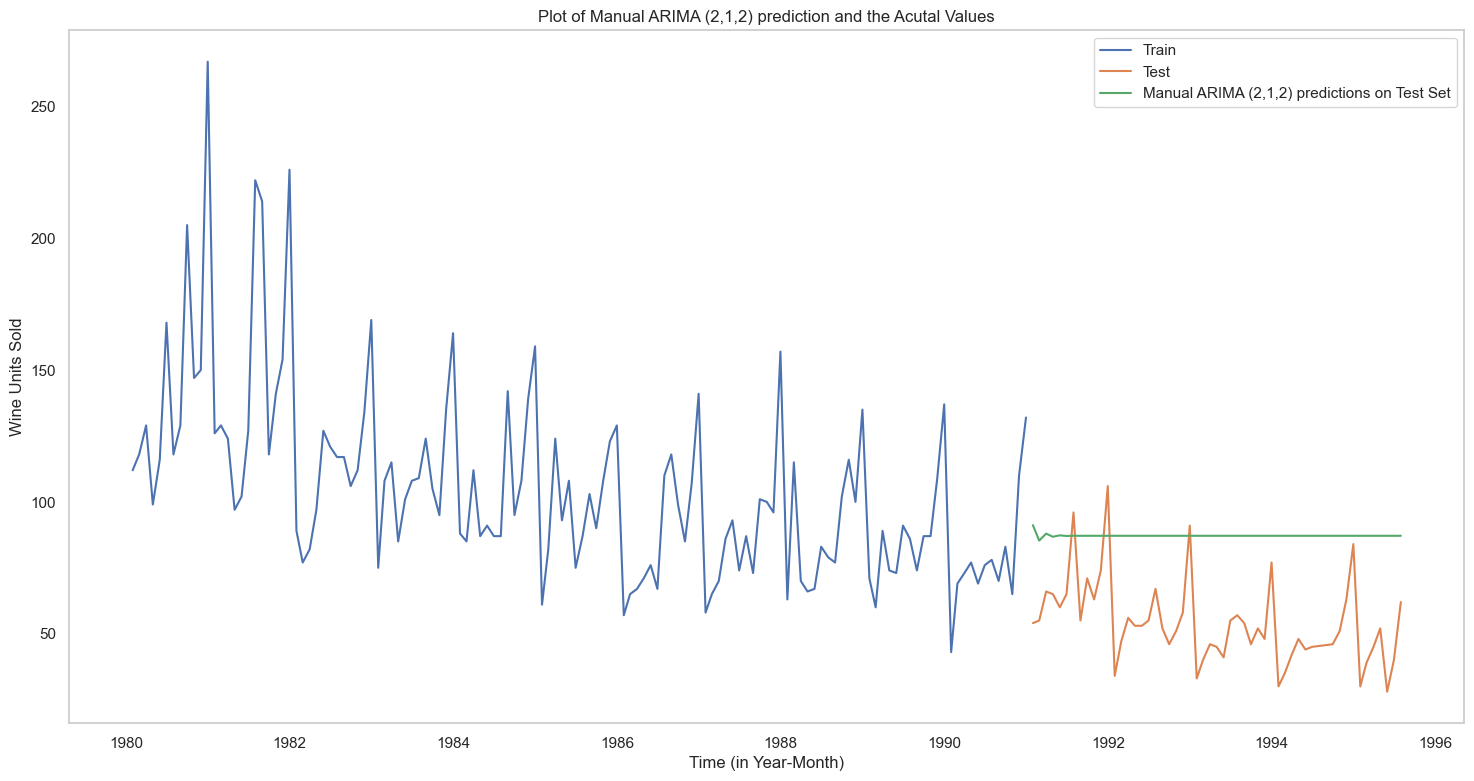

In [178]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,2) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (2,1,2) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [179]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.87099104122306 
MAPE: 76.05544563845179


In [180]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Manual ARIMA(2,1,2)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (2,1,3)             36.810144  75.832433
Auto SARIMA (3,1,1)(3,0,2,12)  18.881822  36.375223
Manual ARIMA(2,1,2)            36.870991  76.055446

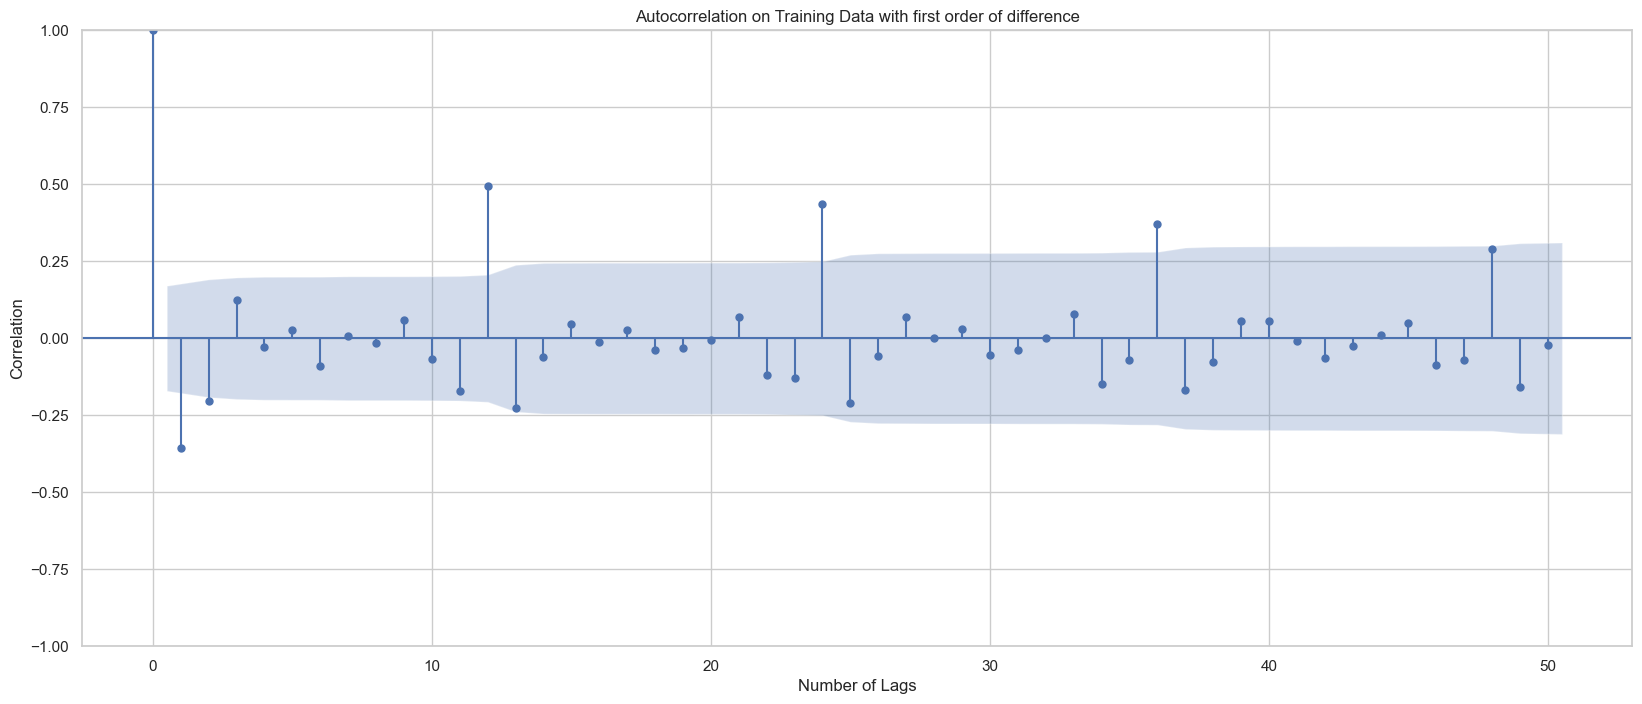

In [181]:
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

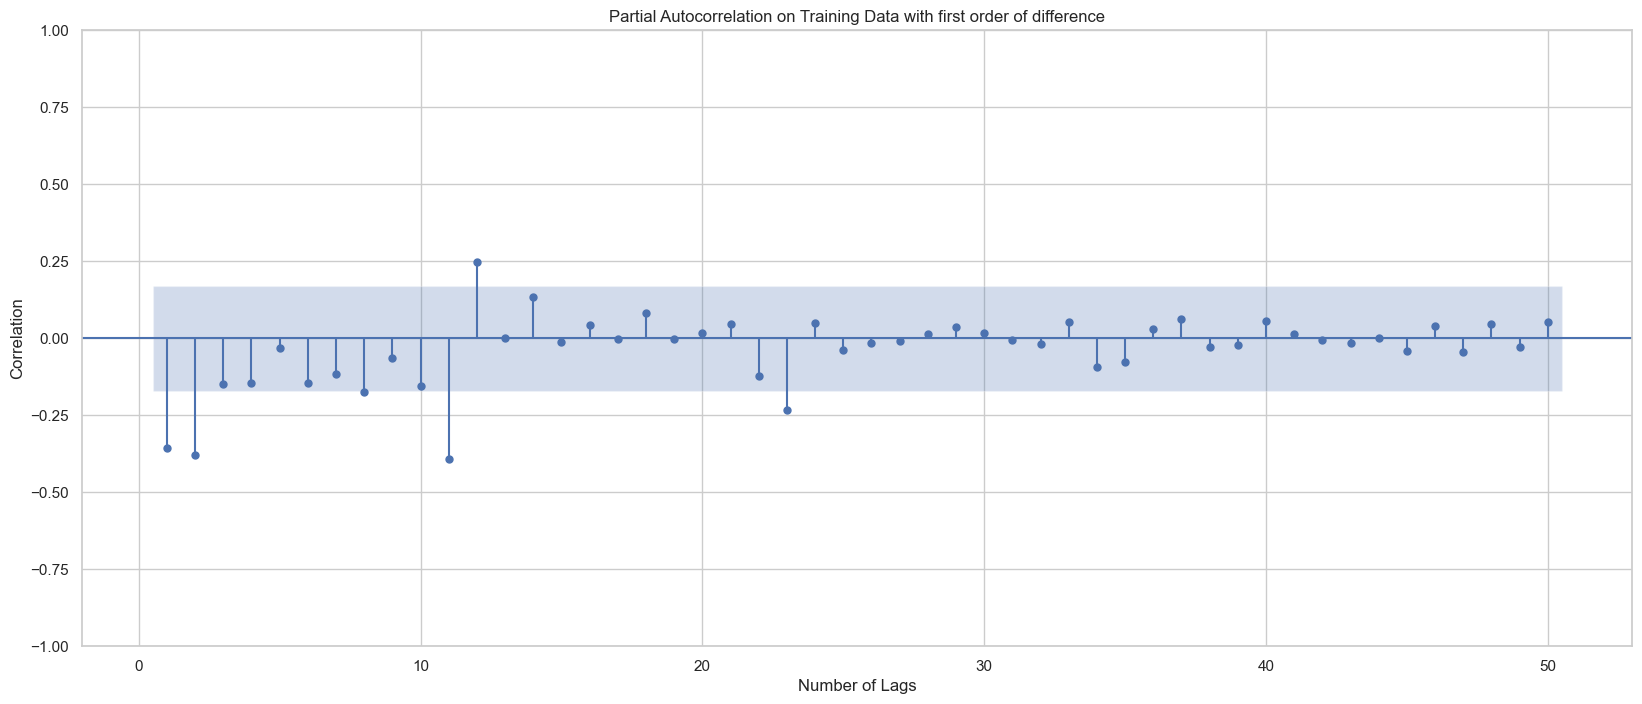

In [182]:
plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

Text(0, 0.5, 'Units Sold')

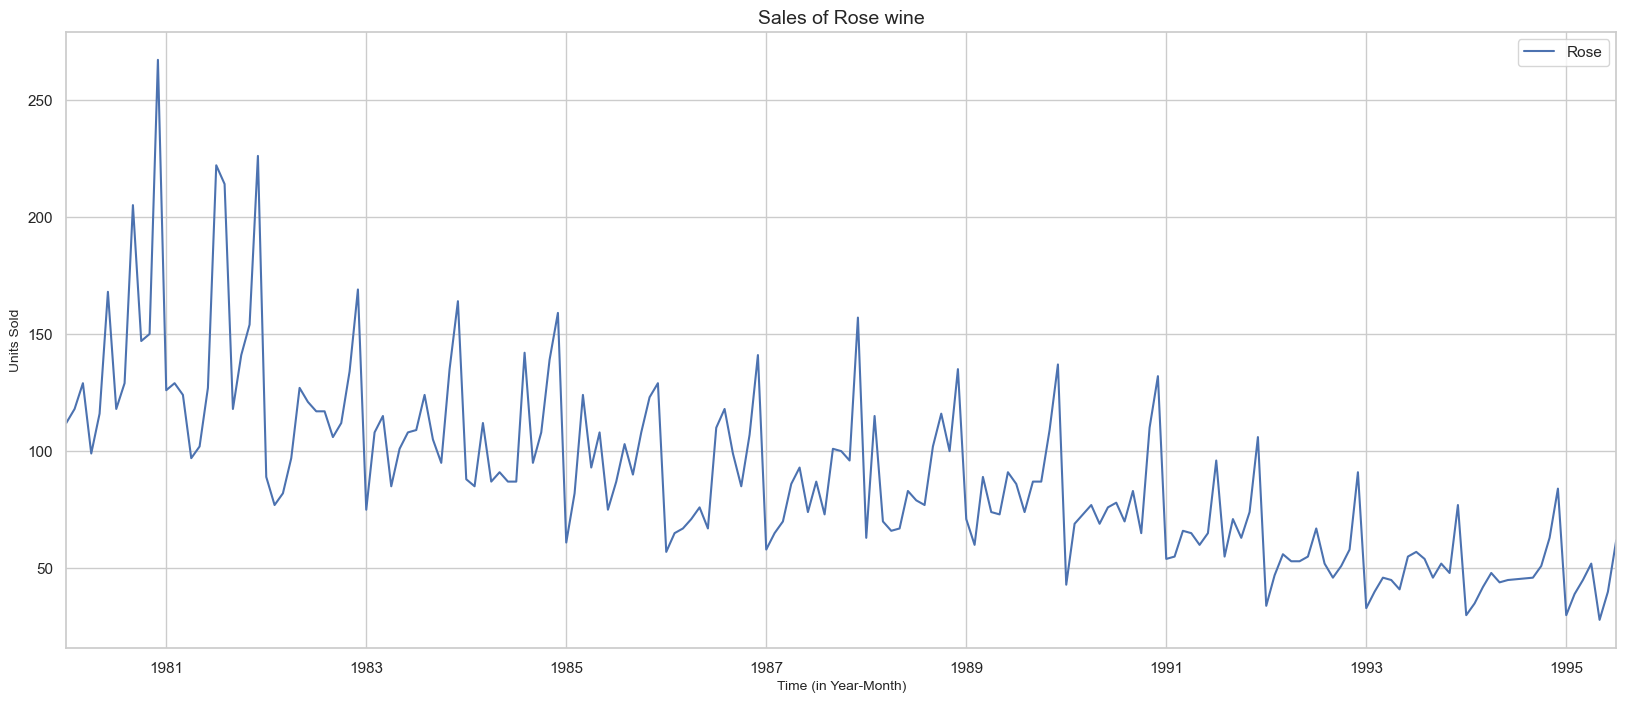

In [183]:
#Original Time Series
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);
plt.title('Sales of Rose wine', fontsize=14)
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Units Sold',fontsize=10)

Text(0, 0.5, 'Wine Units Sold')

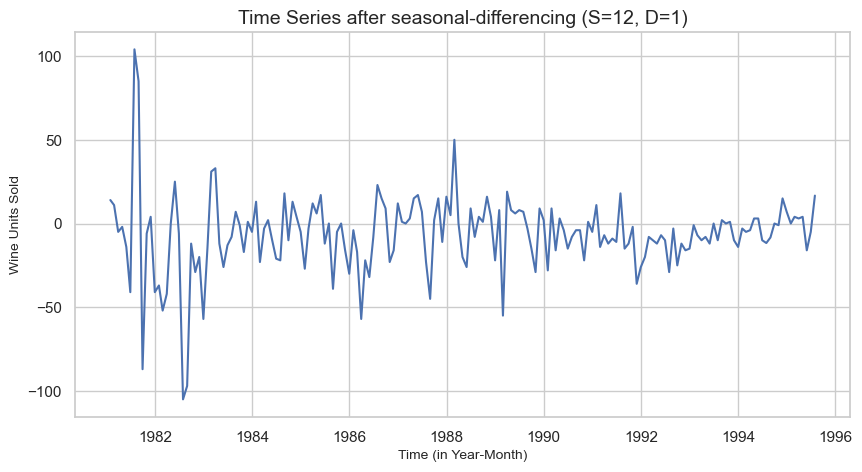

In [184]:
#Time series with seasonal differencing (S=12, D=1)
plt.figure(figsize=(10,5))
plt.plot(df['Rose'].diff(12).dropna())
plt.title ('Time Series after seasonal-differencing (S=12, D=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

Text(0, 0.5, 'Wine Units Sold')

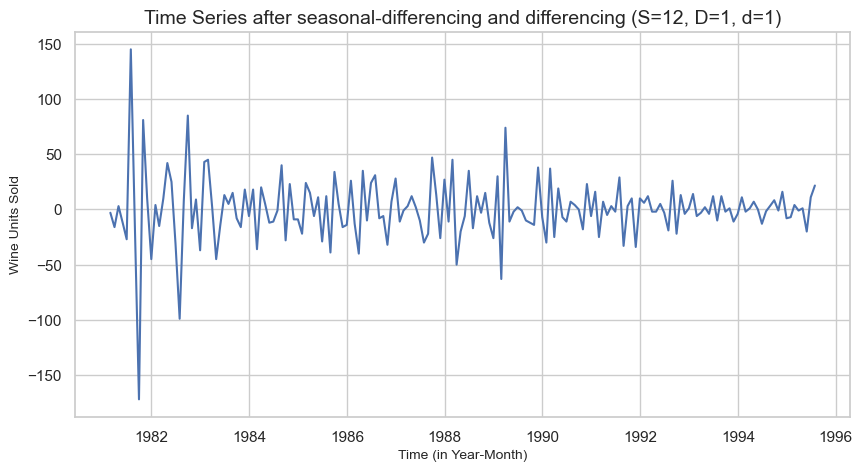

In [185]:
#Time series with seasonal differencing followed by normal differencing (S=12, D=1, d=1)
plt.figure(figsize=(10,5))
plt.plot((df['Rose'].diff(12).dropna()).diff().dropna())
plt.title ('Time Series after seasonal-differencing and differencing (S=12, D=1, d=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

In [186]:
#Testing stationarity
dftest = adfuller((df['Rose'].diff(12).dropna()).diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.551
DF test p-value is 0.0012457307793128738
Number of lags used 11


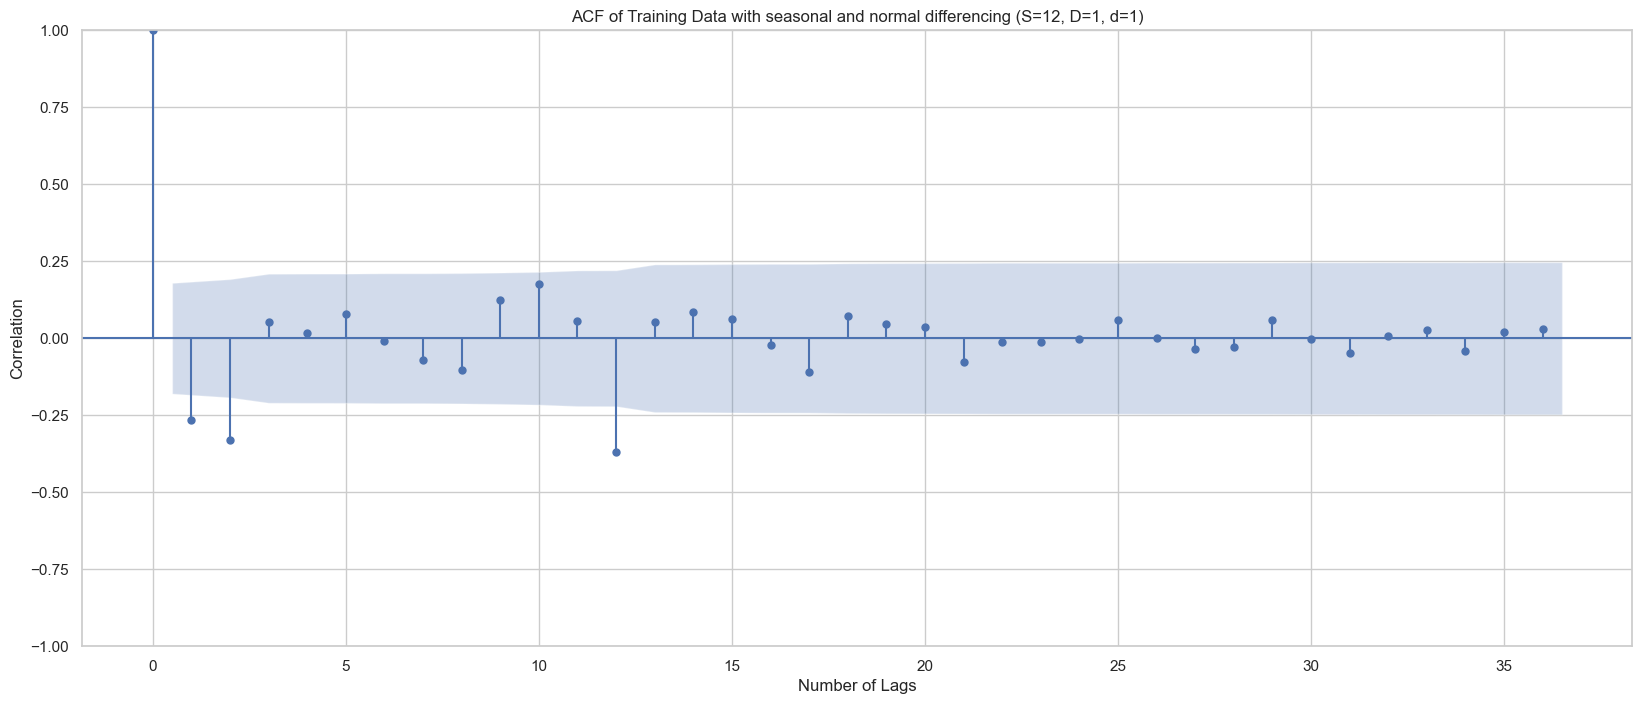

In [187]:
plot_acf((train['Rose'].diff(12).dropna()).diff().dropna(),title='ACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=36)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

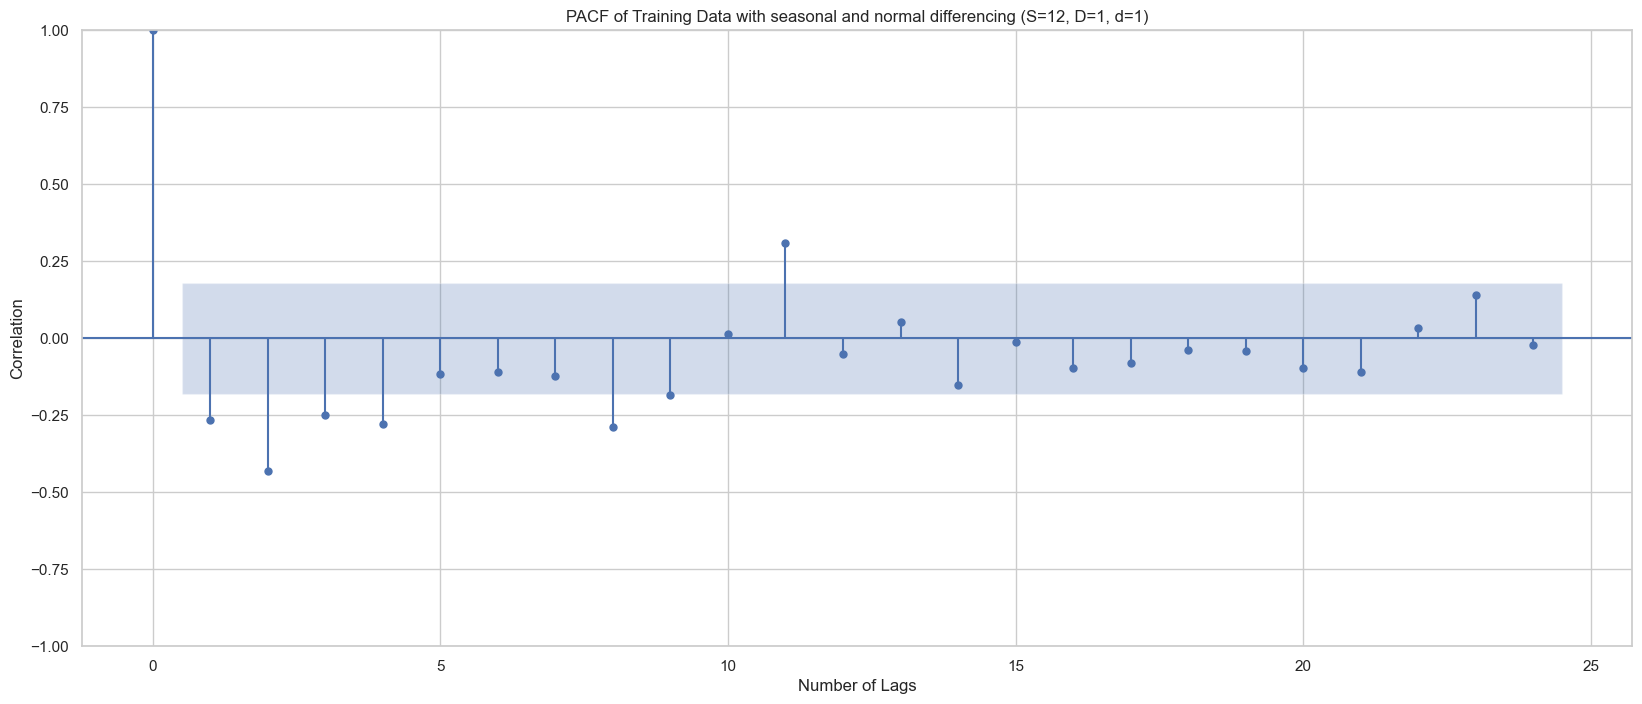

In [188]:
plot_pacf((train['Rose'].diff(12).dropna()).diff().dropna(),title='PACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=24)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

In [189]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -446.102
Date:                              Sun, 23 Feb 2025   AIC                            908.203
Time:                                      12:28:55   BIC                            929.358
Sample:                                  01-31-1980   HQIC                           916.774
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8046      0.119     -6.778      0.000      -1.037      -0.572
ar.L2          0.03

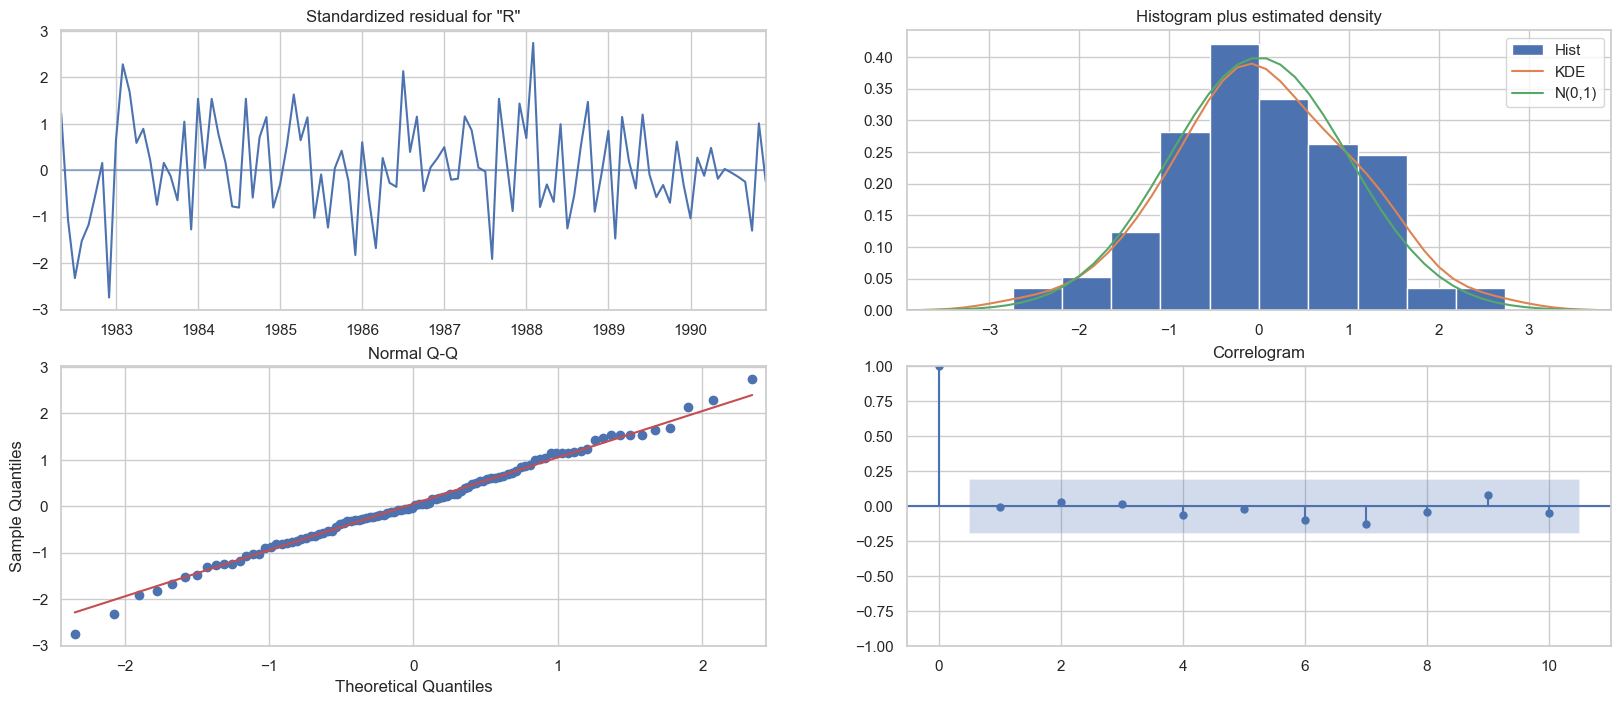

In [190]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [191]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [192]:
predicted_manual_SARIMA.predicted_mean

1991-01-31     47.471843
1991-02-28     63.350016
1991-03-31     65.513283
1991-04-30     67.317236
1991-05-31     61.756380
1991-06-30     72.816688
1991-07-31     71.513808
1991-08-31     67.808604
1991-09-30     77.918562
1991-10-31     73.748610
1991-11-30     97.305525
1991-12-31    127.634762
1992-01-31     41.226590
1992-02-29     59.413099
1992-03-31     61.742032
1992-04-30     62.374955
1992-05-31     57.582061
1992-06-30     67.508089
1992-07-31     67.387065
1992-08-31     62.729088
1992-09-30     73.769496
1992-10-31     68.753612
1992-11-30     93.025758
1992-12-31    122.710418
1993-01-31     36.869573
1993-02-28     54.567995
1993-03-31     57.326443
1993-04-30     57.584648
1993-05-31     53.116291
1993-06-30     62.758958
1993-07-31     62.884543
1993-08-31     58.012442
1993-09-30     69.239307
1993-10-31     64.061256
1993-11-30     88.474340
1993-12-31    118.036386
1994-01-31     32.302163
1994-02-28     49.907890
1994-03-31     52.746955
1994-04-30     52.935060


Text(0, 0.5, 'Wine Units Sold')

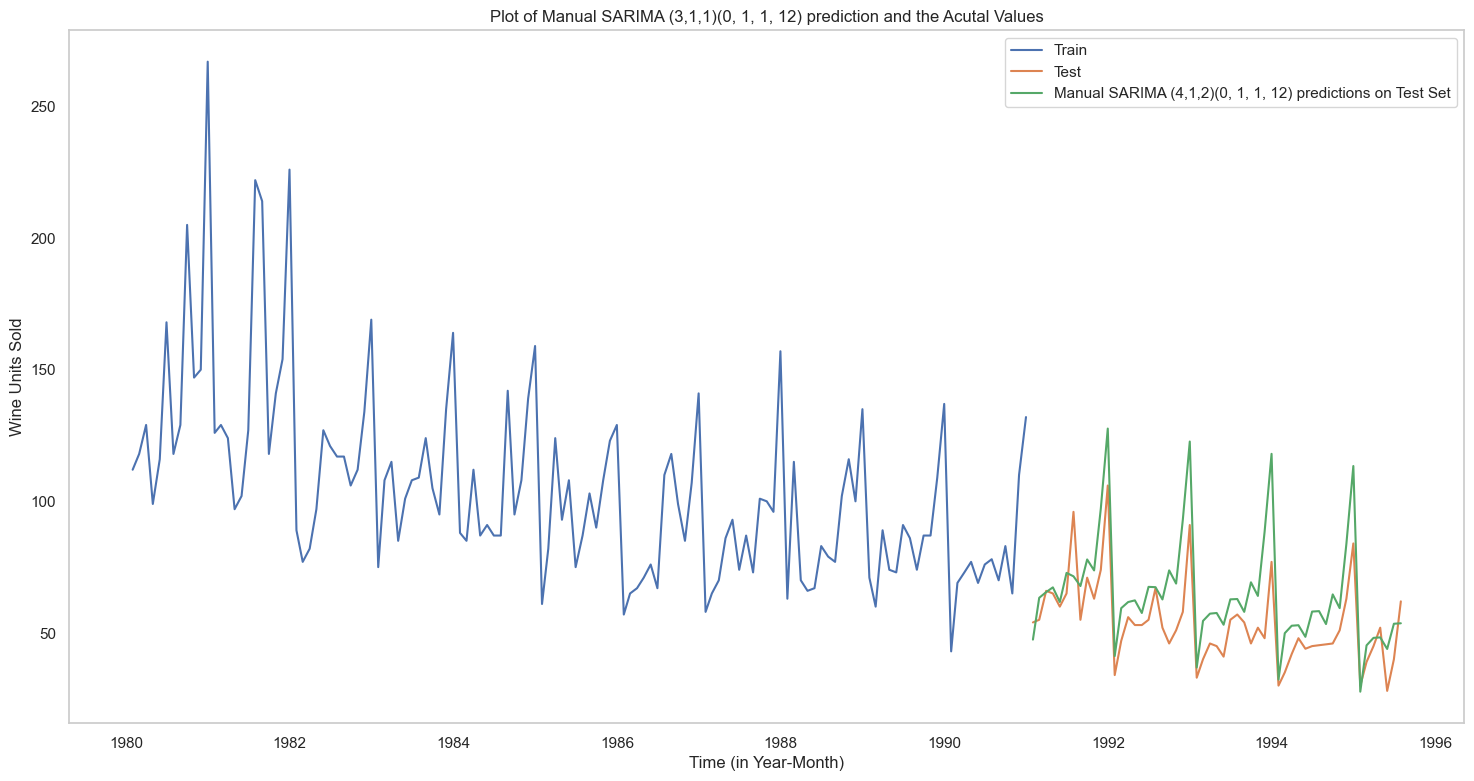

In [193]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual SARIMA (3,1,1)(0, 1, 1, 12) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [194]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.907184827552262 
MAPE: 23.71260977910766


In [195]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Manual SARIMA (4, 1, 2)(0, 1, 1, 12)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (2,1,3)                    36.810144  75.832433
Auto SARIMA (3,1,1)(3,0,2,12)         18.881822  36.375223
Manual ARIMA(2,1,2)                   36.870991  76.055446
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)  15.907185  23.712610

In [196]:
#Combining the tables which contained the exponential smoothing models and ARIMA/SARIMA into one
resultsDf_Final = pd.concat([resultsDf,resultsDf_2])

resultsDf_Final

Test RMSE       MAPE
Linear Regression                                   15.268887        NaN
Simple Average                                      53.460367        NaN
2 point TMA                                         11.529278        NaN
4 point TMA                                         14.451376        NaN
6 point TMA                                         14.566262        NaN
9 point TMA                                         14.727596        NaN
Alpha=0.0987,SimpleExponentialSmoothing             37.592006        NaN
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889        NaN
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  20.189519        NaN
Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponenti...  10.279876        NaN
Auto ARIMA (2,1,3)                                  36.810144  75.832433
Auto SARIMA (3,1,1)(3,0,2,12)                       18.881822  36.375223
Manual ARIMA(2,1,2)                                 36.870991  76.055446
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.907185  23.712610

In [197]:
resultsDf_Final.sort_values(by='MAPE',ascending=True)

Test RMSE       MAPE
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.907185  23.712610
Auto SARIMA (3,1,1)(3,0,2,12)                       18.881822  36.375223
Auto ARIMA (2,1,3)                                  36.810144  75.832433
Manual ARIMA(2,1,2)                                 36.870991  76.055446
Linear Regression                                   15.268887        NaN
Simple Average                                      53.460367        NaN
2 point TMA                                         11.529278        NaN
4 point TMA                                         14.451376        NaN
6 point TMA                                         14.566262        NaN
9 point TMA                                         14.727596        NaN
Alpha=0.0987,SimpleExponentialSmoothing             37.592006        NaN
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889        NaN
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  20.189519        NaN
Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponenti...  10.279876        NaN

In [198]:
resultsDf_Final.sort_values(by='Test RMSE',ascending=True)

Test RMSE       MAPE
Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponenti...  10.279876        NaN
2 point TMA                                         11.529278        NaN
4 point TMA                                         14.451376        NaN
6 point TMA                                         14.566262        NaN
9 point TMA                                         14.727596        NaN
Linear Regression                                   15.268887        NaN
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889        NaN
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.907185  23.712610
Auto SARIMA (3,1,1)(3,0,2,12)                       18.881822  36.375223
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  20.189519        NaN
Auto ARIMA (2,1,3)                                  36.810144  75.832433
Manual ARIMA(2,1,2)                                 36.870991  76.055446
Alpha=0.0987,SimpleExponentialSmoothing             37.592006        NaN
Simple Average                                      53.460367        NaN

Text(0, 0.5, 'Wine Units Sold')

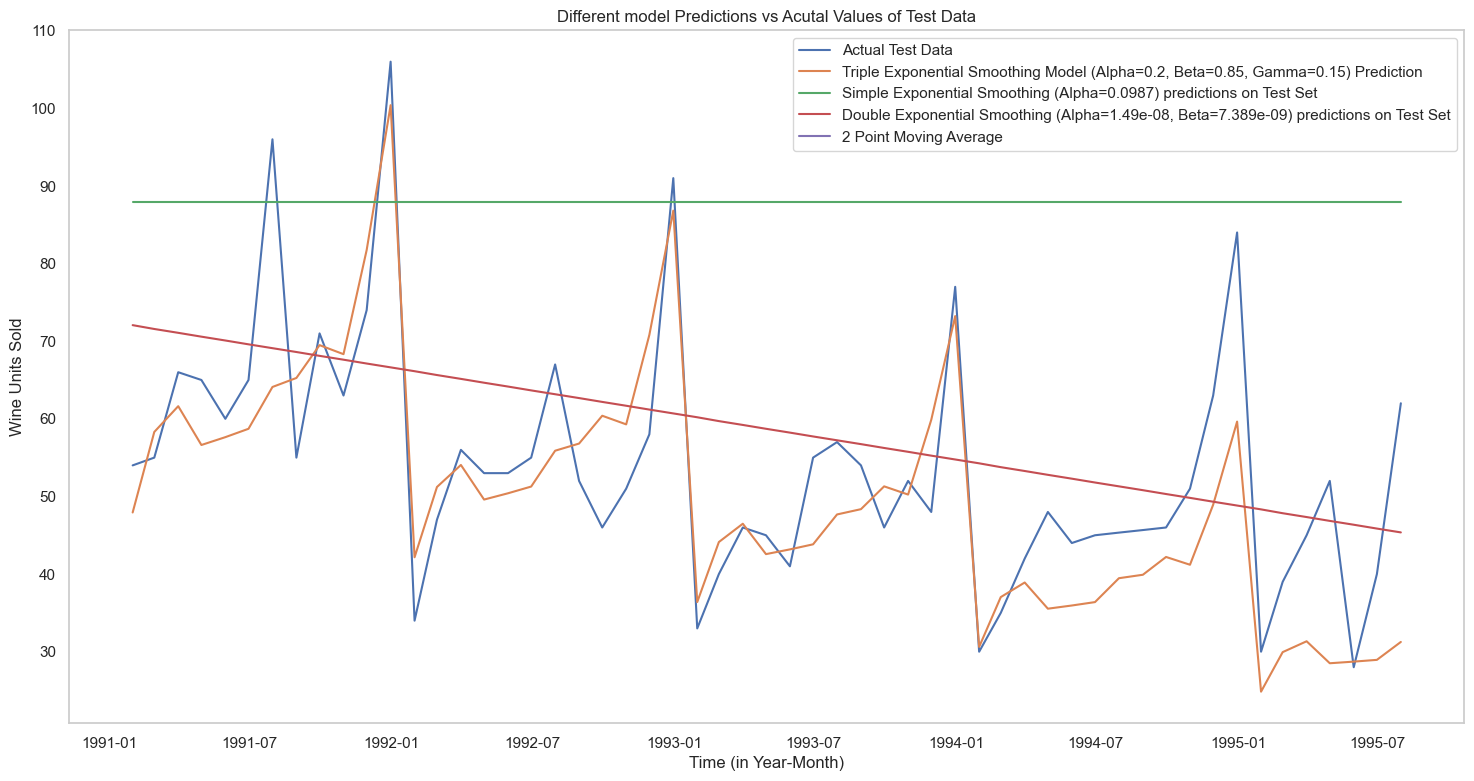

In [199]:
## Plotting on training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Triple Exponential Smoothing Model (Alpha=0.2, Beta=0.85, Gamma=0.15) Prediction')

plt.plot(SES_test['predict'], label='Simple Exponential Smoothing (Alpha=0.0987) predictions on Test Set')

plt.plot(DES_test['predict'], label='Double Exponential Smoothing (Alpha=1.49e-08, Beta=7.389e-09) predictions on Test Set')

plt.plot(MovingAverage['Trailing_2'][-1:len(test)], label='2 Point Moving Average')

plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

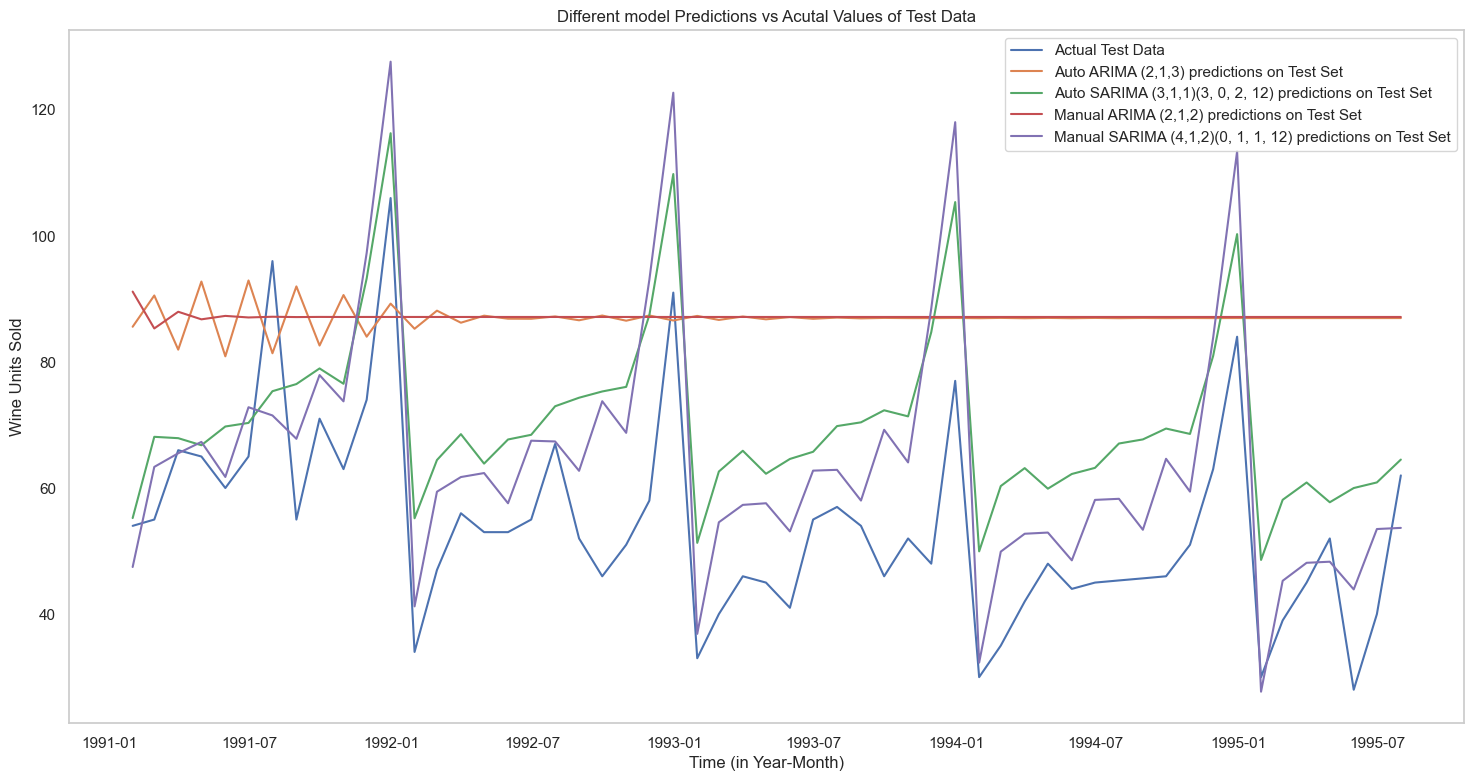

In [201]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose'], label='Actual Test Data')

plt.plot(predicted_auto_ARIMA, label='Auto ARIMA (2,1,3) predictions on Test Set')

plt.plot(predicted_auto_SARIMA.predicted_mean, label='Auto SARIMA (3,1,1)(3, 0, 2, 12) predictions on Test Set')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,2) predictions on Test Set')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

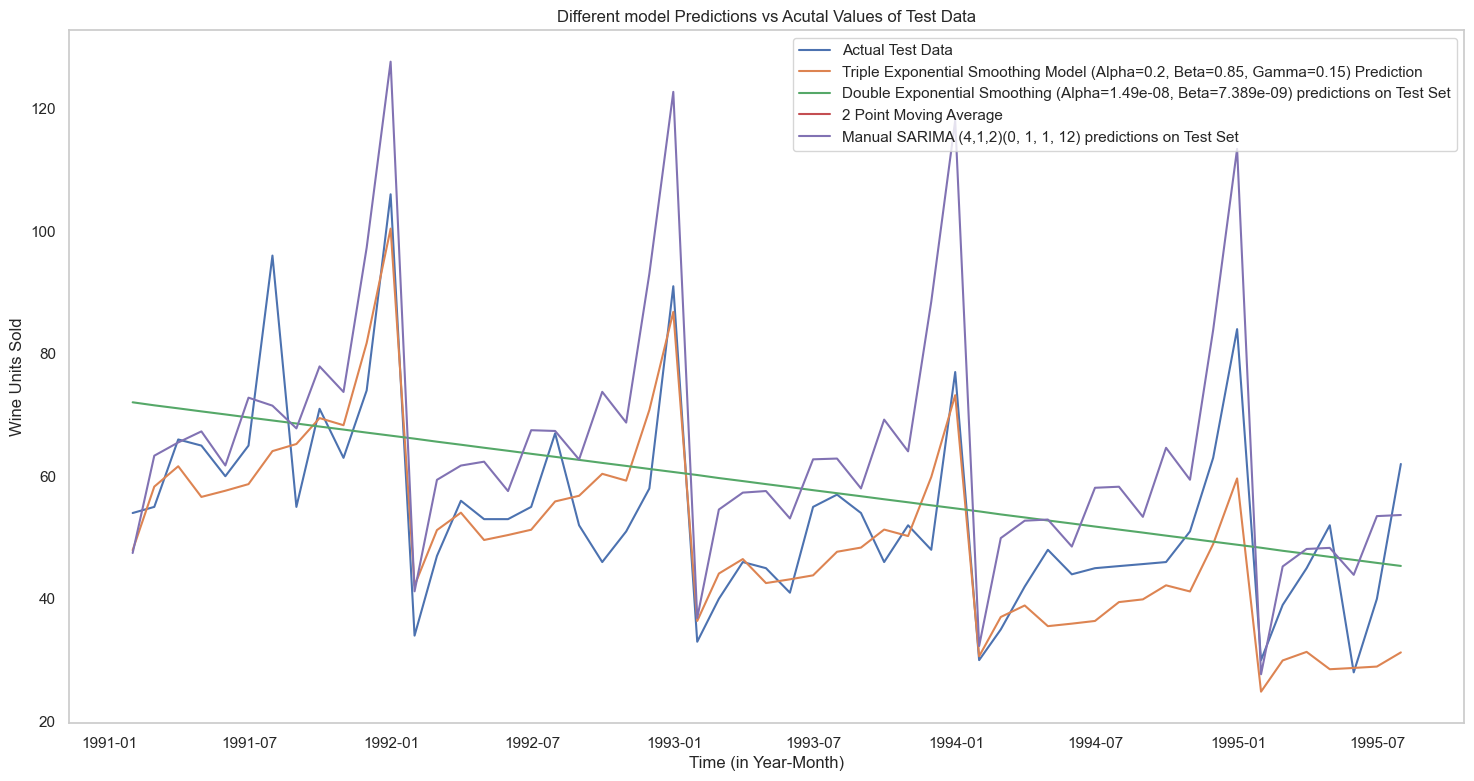

In [202]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Triple Exponential Smoothing Model (Alpha=0.2, Beta=0.85, Gamma=0.15) Prediction')

plt.plot(DES_test['predict'], label='Double Exponential Smoothing (Alpha=1.49e-08, Beta=7.389e-09) predictions on Test Set')

plt.plot(MovingAverage['Trailing_2'][-1:len(test)], label='2 Point Moving Average')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

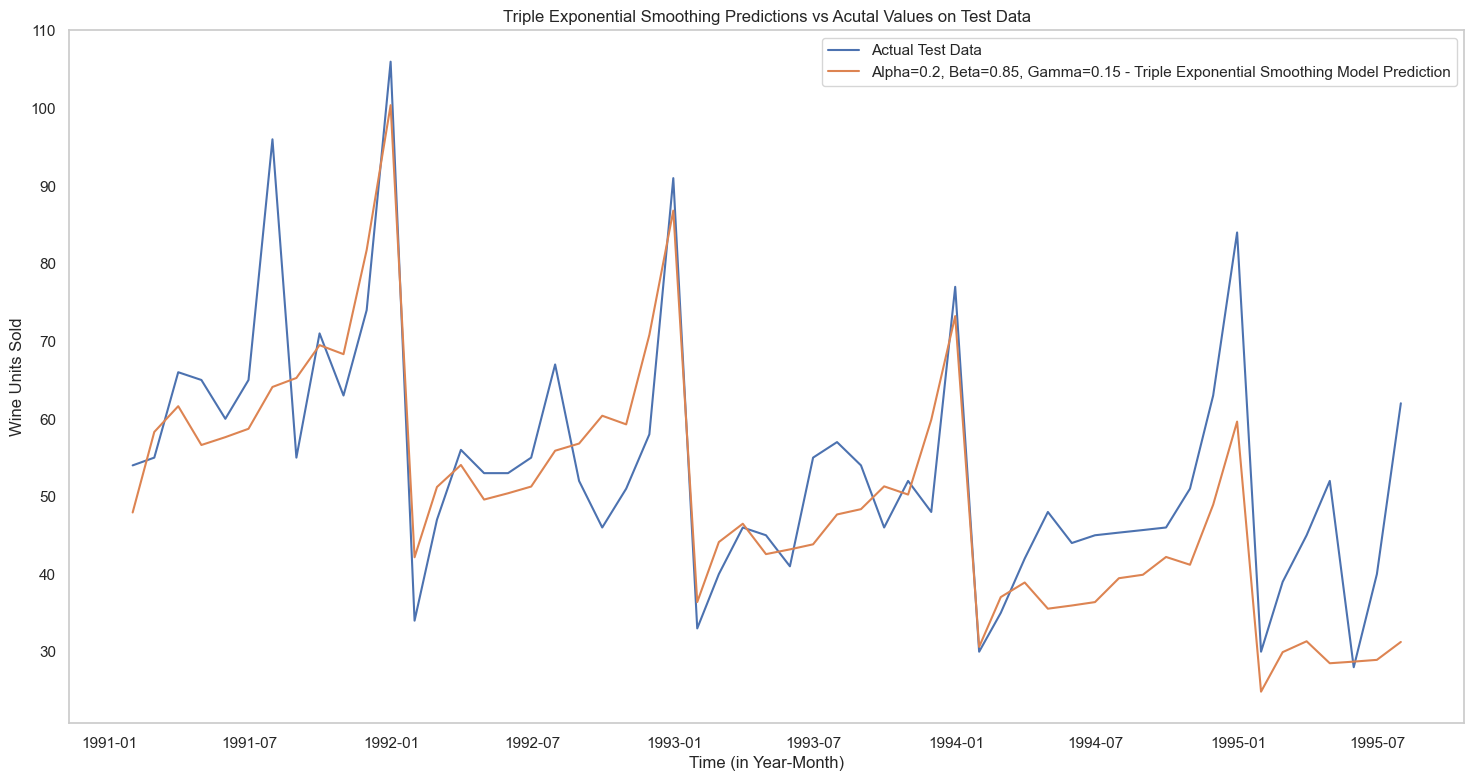

In [203]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Alpha=0.2, Beta=0.85, Gamma=0.15 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

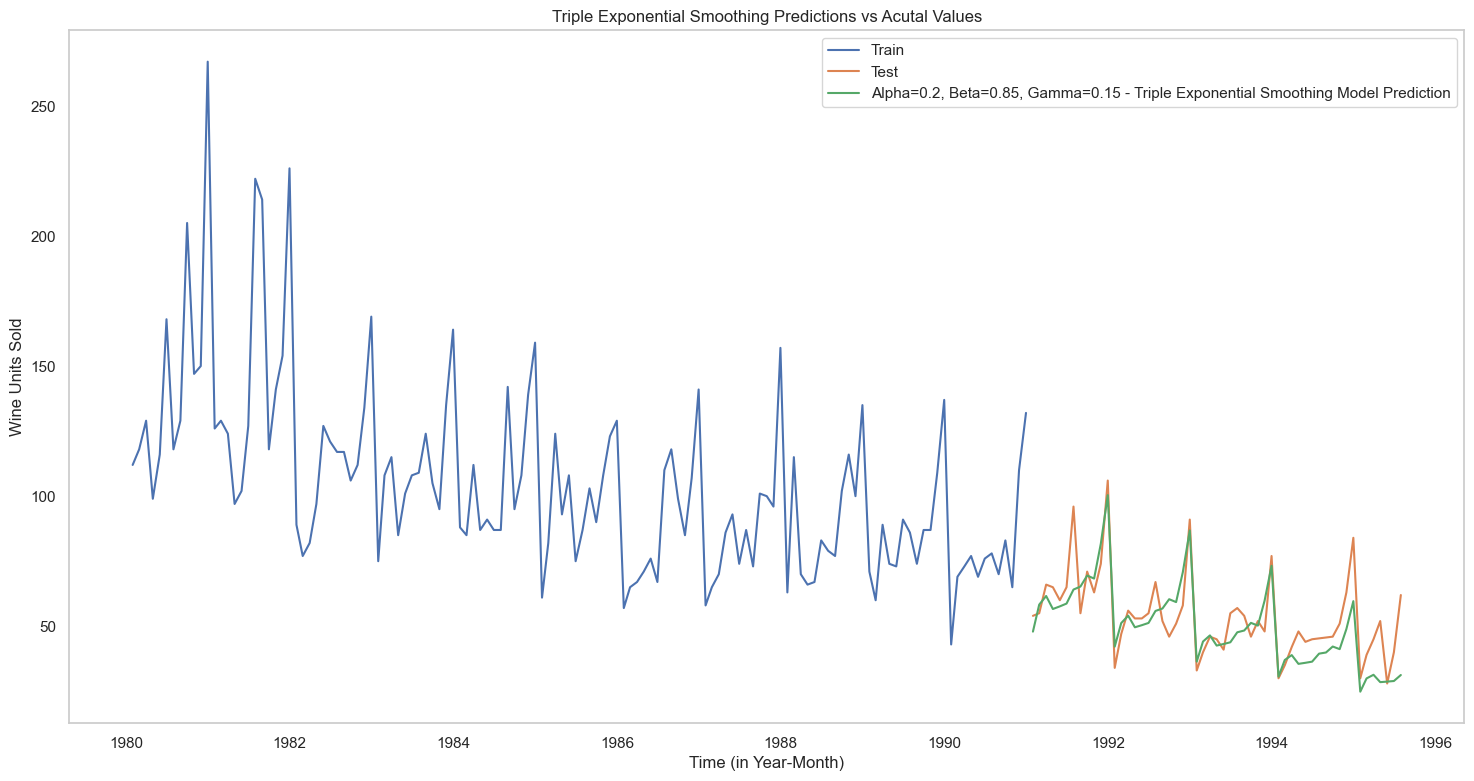

In [204]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Alpha=0.2, Beta=0.85, Gamma=0.15 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [205]:
TES_Fullmodel = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='multiplicative',freq='M').fit(smoothing_level=0.2, smoothing_trend=0.85, smoothing_seasonal=0.15)

In [206]:
TES_Fullmodel.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.85,
 'smoothing_seasonal': 0.15,
 'damping_trend': nan,
 'initial_level': 130.9850916537303,
 'initial_trend': -1.6445206903693255,
 'initial_seasons': array([0.87544306, 0.94117233, 1.01713447, 0.77980998, 0.93330182,
        1.09441693, 1.23407045, 1.35952097, 1.18258394, 1.18154086,
        1.30126409, 1.9174319 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [207]:
RMSE_fullmodel = metrics.mean_squared_error(df['Rose'],TES_Fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 20.704457426088823


In [208]:
# Getting the predictions for the 12 months into the future
prediction = TES_Fullmodel.forecast(steps=12)
print('Forecast of next 12 months')
prediction.tail(12)

Forecast of next 12 months


1995-08-31    38.192835
1995-09-30    39.507937
1995-10-31    41.376232
1995-11-30    49.568181
1995-12-31    70.756169
1996-01-31    28.650611
1996-02-29    36.970786
1996-03-31    44.051734
1996-04-30    45.545574
1996-05-31    40.265776
1996-06-30    45.364849
1996-07-31    48.647164
Freq: ME, dtype: float64

Text(0, 0.5, 'Wine Units Sold')

<Figure size 1800x900 with 0 Axes>

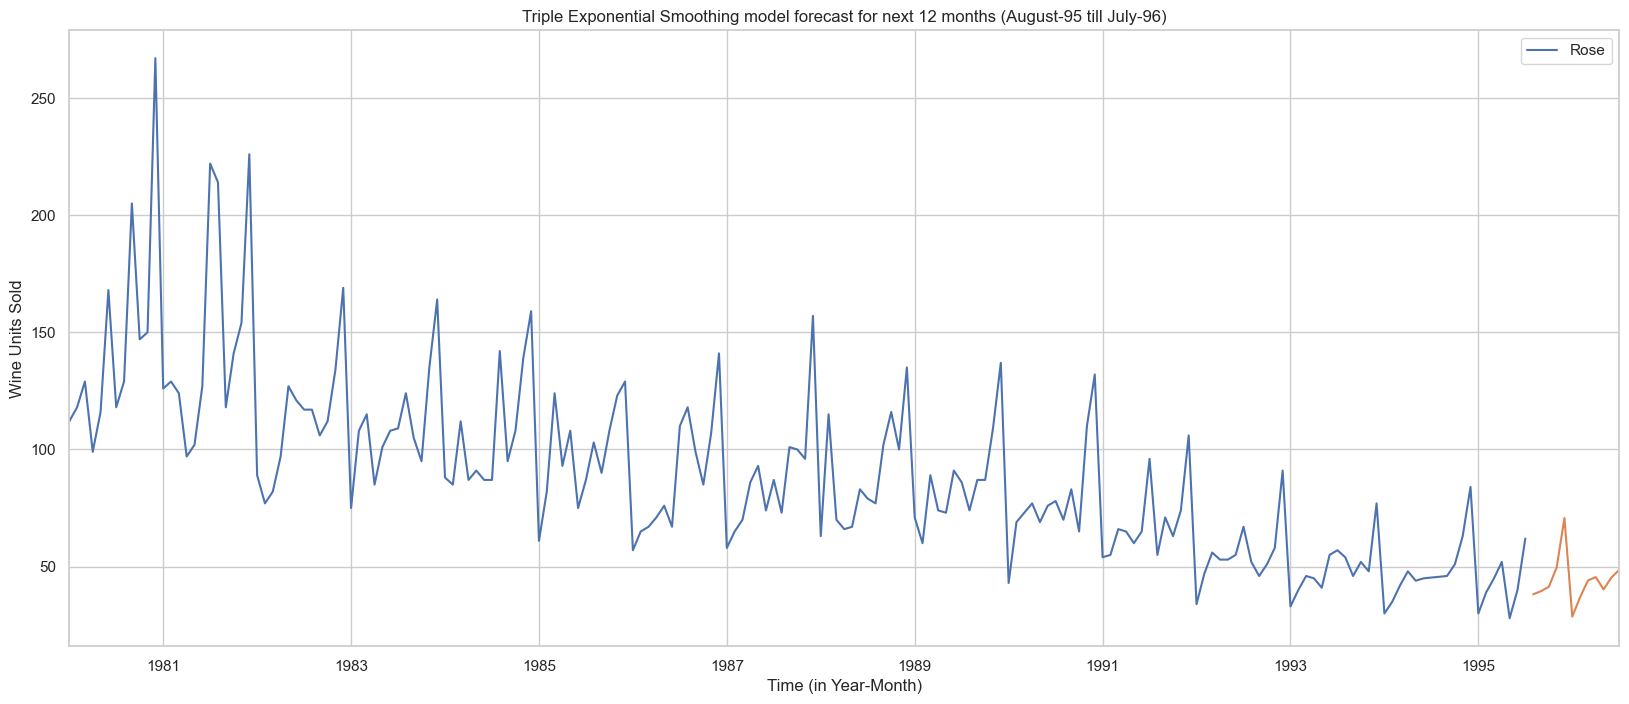

In [209]:
plt.figure(figsize=(18,9))
df.plot()
prediction.plot();
plt.title('Triple Exponential Smoothing model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [210]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
predicted_df = pd.DataFrame({'lower_ci':prediction - (1.96*np.std(TES_Fullmodel.resid,ddof=1)),
                          'prediction':prediction,
                          'upper_ci': prediction + (1.96*np.std(TES_Fullmodel.resid,ddof=1))})
predicted_df.head(12)

lower_ci  prediction    upper_ci
1995-08-31  -2.489649   38.192835   78.875320
1995-09-30  -1.174547   39.507937   80.190421
1995-10-31   0.693748   41.376232   82.058716
1995-11-30   8.885697   49.568181   90.250665
1995-12-31  30.073685   70.756169  111.438653
1996-01-31 -12.031873   28.650611   69.333095
1996-02-29  -3.711698   36.970786   77.653270
1996-03-31   3.369250   44.051734   84.734218
1996-04-30   4.863089   45.545574   86.228058
1996-05-31  -0.416708   40.265776   80.948260
1996-06-30   4.682365   45.364849   86.047333
1996-07-31   7.964680   48.647164   89.329648

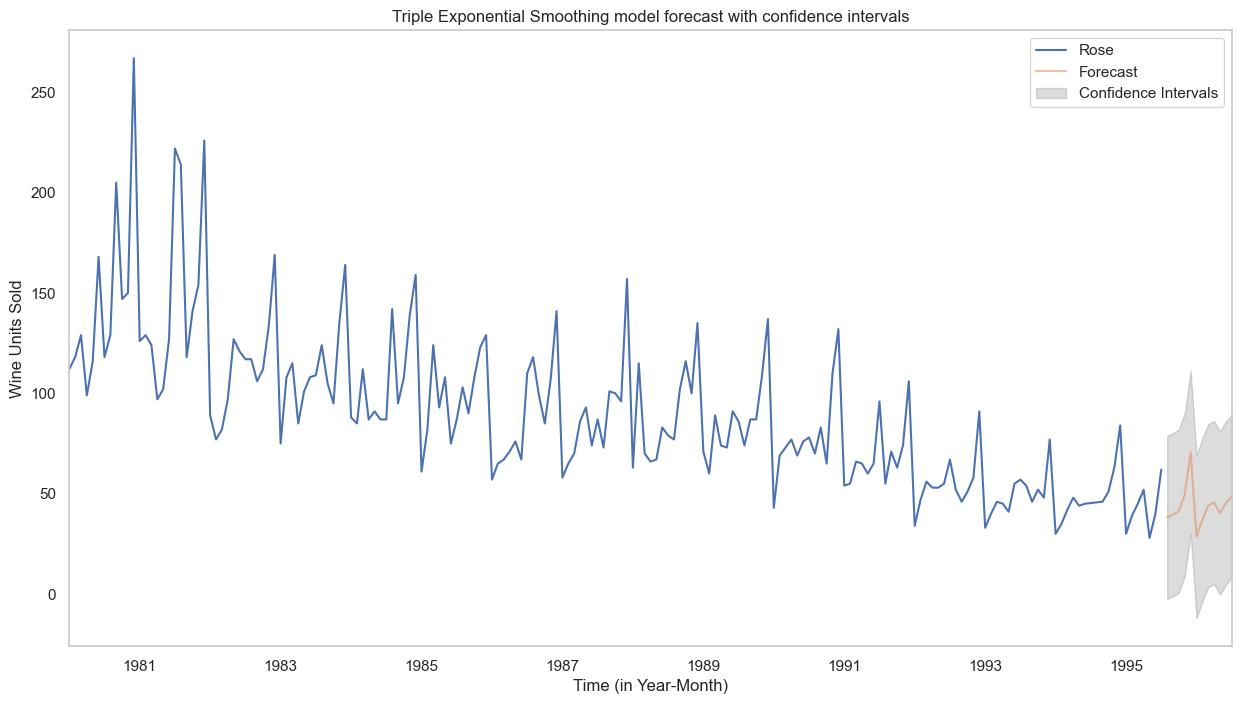

In [211]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='k', alpha=.15,label='Confidence Intervals')
plt.title('Triple Exponential Smoothing model forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

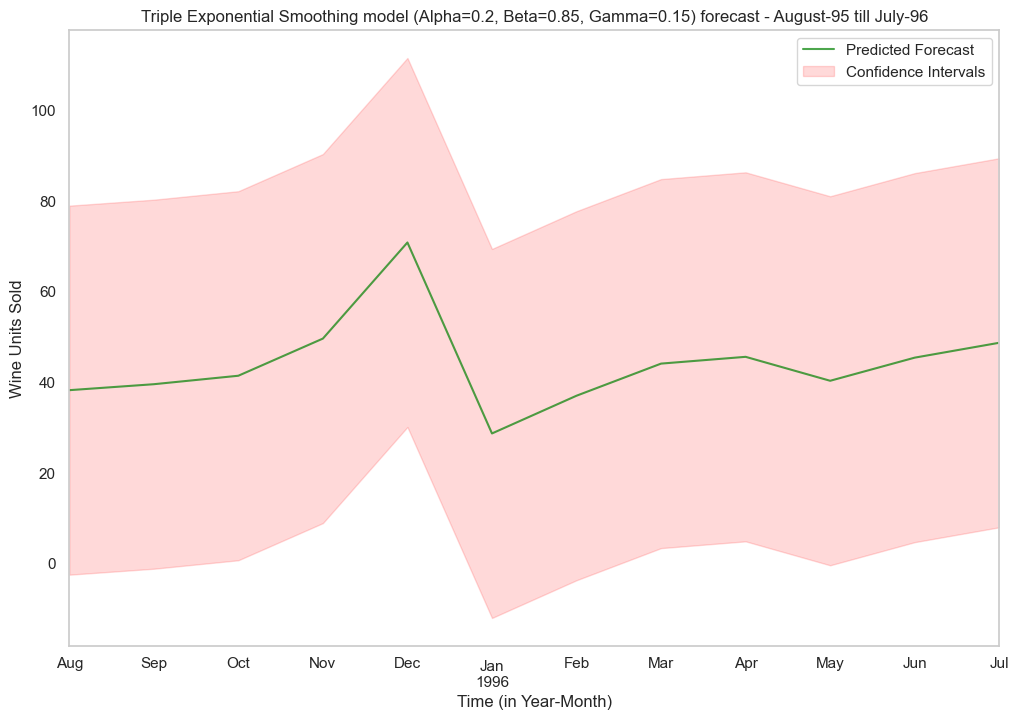

In [212]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = prediction.plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Triple Exponential Smoothing model (Alpha=0.2, Beta=0.85, Gamma=0.15) forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

Text(0, 0.5, 'Wine Units Sold')

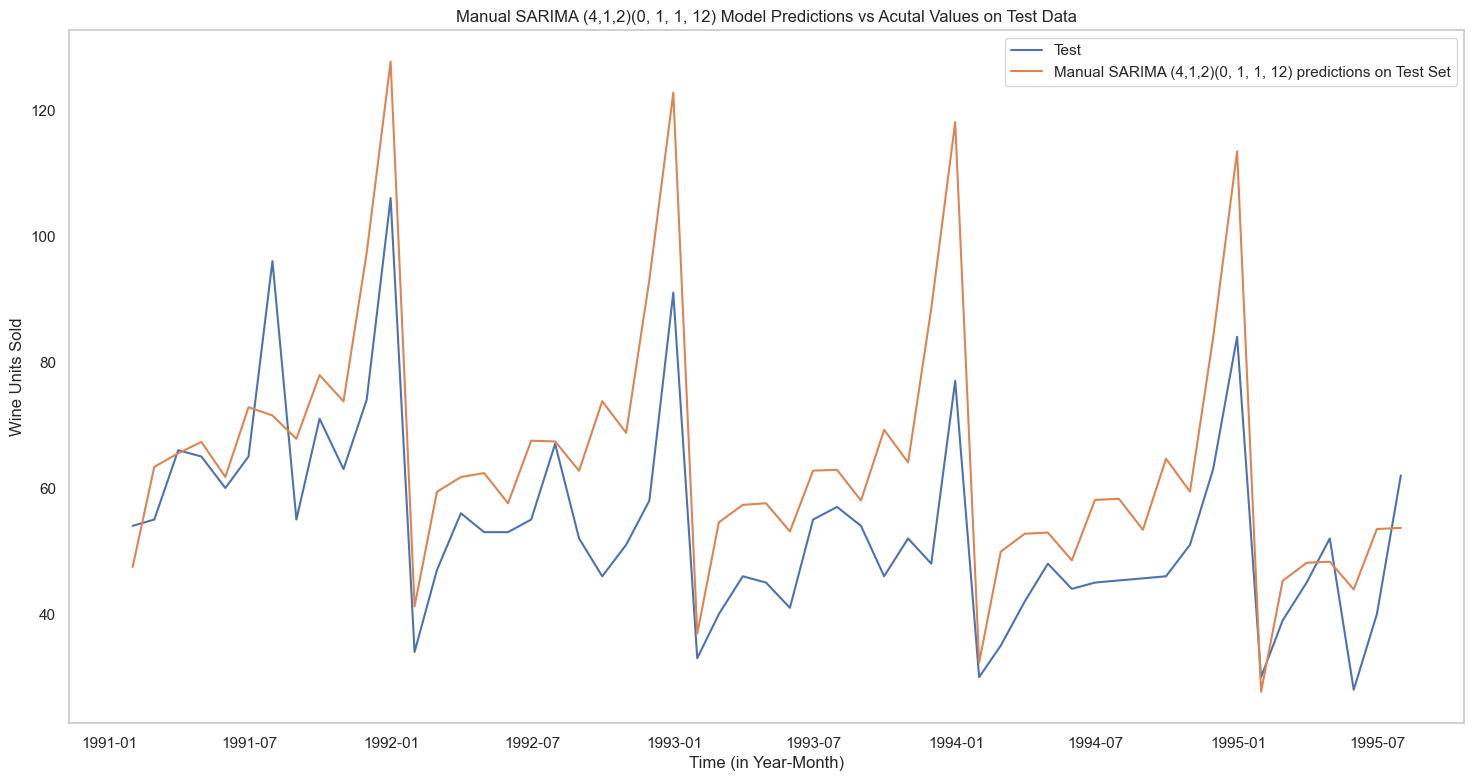

In [214]:
## Plotting on Test data

plt.figure(figsize=(18,9))
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) Model Predictions vs Acutal Values on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

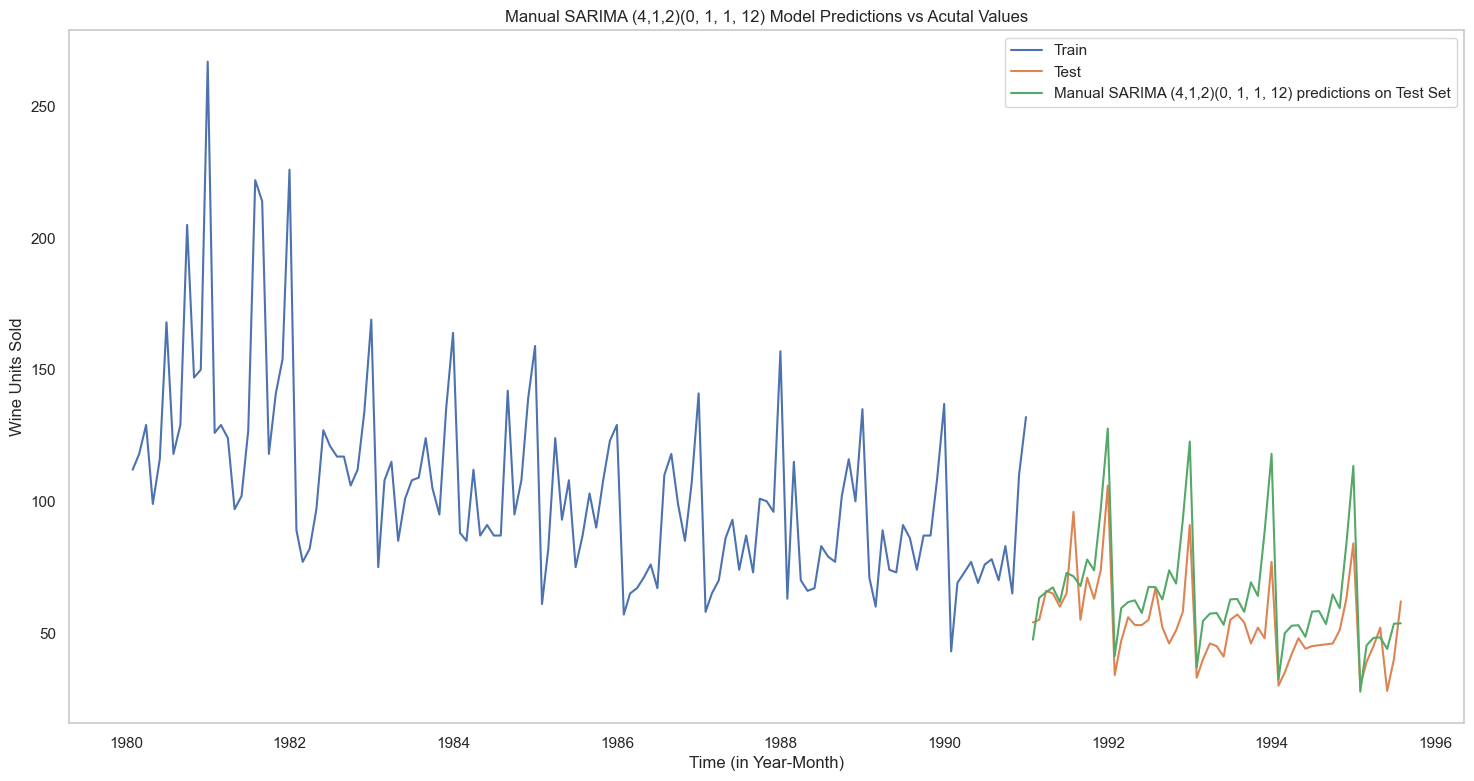

In [215]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) Model Predictions vs Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [216]:
Manual_Sarima_FullModel = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order= (4, 1, 2), 
                                seasonal_order= (0, 1, 1, 12), 
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_fullmodel_manual_sarima = Manual_Sarima_FullModel.fit(maxiter=1000)
print(results_fullmodel_manual_sarima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -658.935
Date:                              Sun, 23 Feb 2025   AIC                           1333.870
Time:                                      12:47:29   BIC                           1358.421
Sample:                                  01-31-1980   HQIC                          1343.840
                                       - 07-31-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8240      0.083     -9.940      0.000      -0.986      -0.661
ar.L2          0.04

In [217]:
predicted_manual_sarima_full_data = results_fullmodel_manual_sarima.get_forecast(steps=12)
predicted_manual_sarima_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  48.272824  15.053377      18.768748      77.776900
1995-09-30  44.985458  15.830777      13.957704      76.013211
1995-10-31  45.475325  15.889168      14.333127      76.617522
1995-11-30  54.808069  15.899180      23.646249      85.969888
1995-12-31  81.905331  15.913921      50.714619     113.096044

In [218]:
predicted_manual_sarima_df = predicted_manual_sarima_full_data.summary_frame(alpha=0.05)
predicted_manual_sarima_df

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  48.272824  15.053377      18.768748      77.776900
1995-09-30  44.985458  15.830777      13.957704      76.013211
1995-10-31  45.475325  15.889168      14.333127      76.617522
1995-11-30  54.808069  15.899180      23.646249      85.969888
1995-12-31  81.905331  15.913921      50.714619     113.096044
1996-01-31  25.672087  16.199858      -6.079051      57.423225
1996-02-29  33.895483  16.308015       1.932361      65.858606
1996-03-31  40.048606  16.589994       7.532814      72.564397
1996-04-30  44.384191  16.658021      11.735070      77.033311
1996-05-31  31.339470  16.872390      -1.729807      64.408748
1996-06-30  39.916039  16.946503       6.701503      73.130574
1996-07-31  52.376285  17.156500      18.750164      86.002407

In [219]:
rmse_manual_sarima_full = metrics.mean_squared_error(df['Rose'],results_fullmodel_manual_sarima.fittedvalues,squared=False)

rmse_manual_sarima_full

32.218308637617795

In [220]:
# Getting the predictions for the 12 months into the future
prediction_manual_sarima_full = results_fullmodel_manual_sarima.forecast(steps=12)
prediction_manual_sarima_full.tail(12)

1995-08-31    48.272824
1995-09-30    44.985458
1995-10-31    45.475325
1995-11-30    54.808069
1995-12-31    81.905331
1996-01-31    25.672087
1996-02-29    33.895483
1996-03-31    40.048606
1996-04-30    44.384191
1996-05-31    31.339470
1996-06-30    39.916039
1996-07-31    52.376285
Freq: ME, Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Wine Units Sold')

<Figure size 1800x900 with 0 Axes>

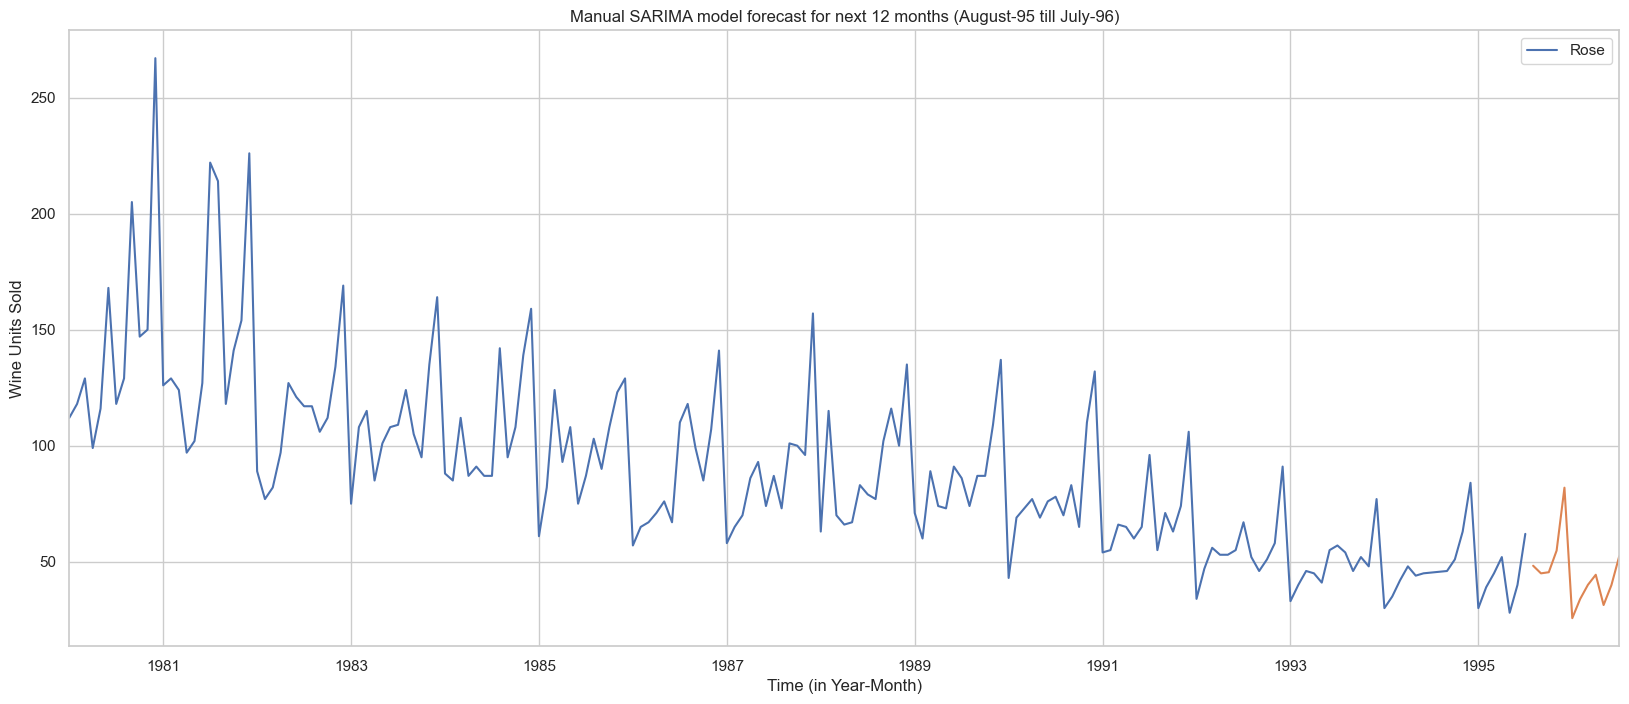

In [221]:
plt.figure(figsize=(18,9))
df.plot()
prediction_manual_sarima_full.plot();
plt.title('Manual SARIMA model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

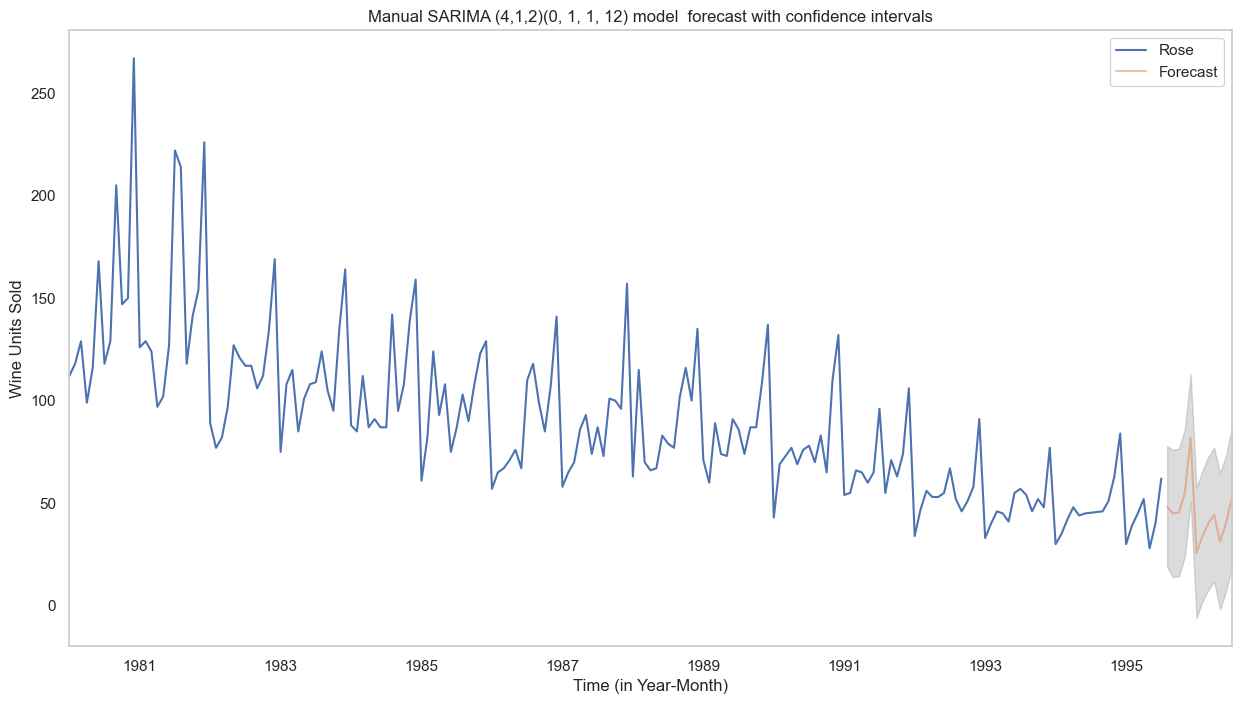

In [222]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_manual_sarima_df['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_manual_sarima_df.index, predicted_manual_sarima_df['mean_ci_lower'], predicted_manual_sarima_df['mean_ci_upper'], color='k', alpha=.15)
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) model  forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

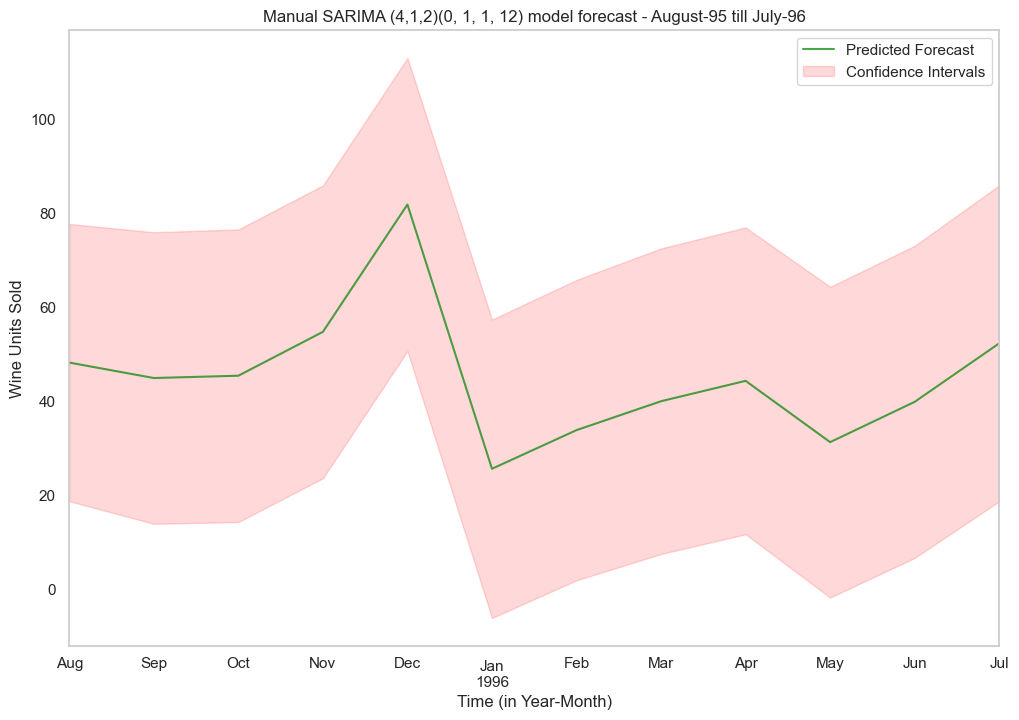

In [223]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = predicted_manual_sarima_df['mean'].plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_manual_sarima_df.index, predicted_manual_sarima_df['mean_ci_lower'], predicted_manual_sarima_df['mean_ci_upper'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Manual SARIMA (4,1,2)(0, 1, 1, 12) model forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()